# HAVEN'T BEEN EDITED YET

In [2]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

In [3]:
# this are periods when 1,2,3,4 HEs were under operation
time_periods = [
    ("2022-09-12","2022-09-13"),
    ("2022-10-17","2022-10-21"), ("2022-11-08","2022-11-11"), ("2022-11-15","2022-11-18"),
    ("2022-11-22","2022-11-25"), ("2022-11-29","2022-12-02"), ("2022-12-05","2022-12-09"), 
    ("2022-12-12","2022-12-16"), ("2022-12-19","2022-12-23"), ("2023-01-10","2023-01-13"), 
    ("2023-01-16","2023-01-19"), ("2023-01-24","2023-01-27"), ("2023-01-31","2023-02-03"), 
    ("2023-02-07","2023-02-09"), ("2023-02-13","2023-02-17"), ("2023-02-28","2023-03-03"), 
    ("2023-03-06","2023-03-07"), ("2023-03-09","2023-03-10"), ("2023-03-14","2023-03-17"),
    ("2023-03-27","2023-03-31"), ("2023-04-03","2023-04-07"), ("2023-04-10","2023-04-14"),
]

time_periods2 = [
    ("2021-09-06","2021-09-10"), ("2021-09-13","2021-09-17"), ("2021-09-20","2021-10-01"),
    ("2021-10-04","2021-10-08"), ("2021-10-11","2021-10-15"), ("2021-11-08","2021-11-12"),
    ("2021-11-15","2021-11-19"), ("2021-11-22","2021-11-26"), ("2021-11-29","2021-12-03"),
    ("2021-12-07","2021-12-03"), ("2021-12-13","2021-12-17"), ("2021-12-20","2021-12-24"),
    ("2022-01-18","2022-01-21"), ("2022-01-24","2022-01-26"), ("2022-02-01","2022-02-04"),
    ("2022-02-08","2022-02-11"), ("2022-02-14","2022-02-18"), ("2022-02-24","2022-02-25"),
    ("2022-03-01","2022-03-04"), ("2022-03-15","2022-03-18"), ("2022-03-21","2022-03-25"),
    ("2022-03-29","2022-04-01"), ("2022-04-12","2022-04-15"), ("2022-04-18","2022-04-22"),
    ("2022-05-02","2022-05-06"), ("2022-05-09","2022-05-13"), ("2022-05-16","2022-05-20"),
    ("2022-05-23","2022-05-27"), ("2022-06-07","2022-06-10"), ("2022-06-20","2022-06-24"),
    ("2022-06-28","2022-07-01"),
    
]

time_periods3 = [
    ("2020-10-12","2020-10-16"), ("2020-10-21","2020-10-23"), ("2020-10-28","2020-10-30"),
    ("2020-11-11","2020-11-13"), ("2020-11-16","2020-11-20"), ("2020-11-24","2020-11-27"),
    ("2020-12-03","2020-12-04"), ("2020-12-07","2020-12-11"), ("2020-12-16","2020-12-18"), 
    ("2020-12-24","2020-12-25"), ("2020-12-29","2020-12-30"), ("2021-01-12","2021-01-15"),
    ("2021-01-18","2021-01-22"), ("2021-02-01","2021-02-05"), ("2021-02-08","2021-02-12"),
    ("2021-02-15","2021-02-19"), ("2021-03-01","2021-03-05"), ("2021-03-09","2021-03-12"),
    ("2021-03-15","2021-03-19"), ("2021-03-22","2021-03-26"), ("2021-04-01","2021-04-02"),
    ("2021-04-05","2021-04-09"), ("2021-04-05","2021-04-09"), ("2021-04-12","2021-04-16"),
    ("2021-04-20","2021-04-24"), ("2021-04-26","2021-04-30"), ("2021-05-03","2021-05-07"),
    ("2021-05-11","2021-05-15"), ("2021-05-17","2021-05-21"), ("2021-05-24","2021-05-28"),
    ("2021-06-15","2021-06-18"), ("2021-06-21","2021-06-25"), ("2021-06-28","2021-07-02"),
]

In [4]:
time_periods_all = [*time_periods3, *time_periods2, *time_periods]

### All IDs used
* 299 Т1к после ТО
* 309 Р2контура
* 315 T1k before HE
* 317 Т2к перед ТО
* 319 Т2к после ТО
* 321 T reactor
* 325 Т2к выхТО1
* 327 Твозвуха
* 381 Iвг1
* 395 Iвг2
* 396 Iвг3
* 460 Т2к выхТО2
* 461 Т2к выхТО3
* 462 Т2к выхТО4
* 463 Т2к выхТО5
* 480 Q1k
* 481 Q2контура
#### Second loop I pumps id
* 406 2-1
* 407 2-2
* 408 2-3
* 409 2-4

In [5]:
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [6]:
from preprocessing import CsvRefactorer
from analytics import WaterFlowRates
from data_engineering import PeriodicDataPreprocess, FeatureEngineering

In [6]:
# key ids 317, 319, 325, 460, 461, 462, 463, 327
df_refacP1 = CsvRefactorer.read_csv("P1_second_circuit_data_050922_to_210423.csv")
df_refacP2 = CsvRefactorer.read_csv("P2_second_circuit_data_050922_to_210423.csv")

In [7]:
initial_view = df_refacP1.df.loc["2022-10-18", ][df_refacP1.df.loc["2022-10-18", "ID"] == 481]

In [8]:
df_refacP11 = CsvRefactorer.read_csv("P1_second_circuit_data_060921_to_010722.csv")
df_refacP21 = CsvRefactorer.read_csv("P2_second_circuit_data_060921_to_010722.csv")

In [9]:
df_refacP12 = CsvRefactorer.read_csv("P1_second_circuit_data_121020_to_020721.csv")
df_refacP22 = CsvRefactorer.read_csv("P2_second_circuit_data_121020_to_020721.csv")

In [10]:
ids1 = df_refacP1.df["ID"].unique()
ids2 = df_refacP2.df["ID"].unique()

ids11 = df_refacP11.df["ID"].unique()
ids21 = df_refacP21.df["ID"].unique()

ids12 = df_refacP12.df["ID"].unique()
ids22 = df_refacP22.df["ID"].unique()

In [11]:
ids1_array = df_refacP1.select_by_ids(ids1)
ids2_array = df_refacP2.select_by_ids(ids2)

ids11_array = df_refacP11.select_by_ids(ids11)
ids21_array = df_refacP21.select_by_ids(ids21)

ids12_array = df_refacP12.select_by_ids(ids12)
ids22_array = df_refacP22.select_by_ids(ids22)

In [12]:
group1 = df_refacP1.min_frac_groupby(10, *ids1_array)
group2 = df_refacP2.min_frac_groupby(10, *ids2_array)

group11 = df_refacP11.min_frac_groupby(10, *ids11_array)
group21 = df_refacP21.min_frac_groupby(10, *ids21_array)

group12 = df_refacP12.min_frac_groupby(10, *ids12_array)
group22 = df_refacP22.min_frac_groupby(10, *ids22_array)

In [13]:
df1 = df_refacP1.concat_dfs(group1)
df2 = df_refacP2.concat_dfs(group2)

df11 = df_refacP11.concat_dfs(group11)
df21 = df_refacP21.concat_dfs(group21)

df12 = df_refacP12.concat_dfs(group12)
df22 = df_refacP22.concat_dfs(group22)

In [14]:
df = pd.concat([df1, df2], axis=1)
df11 = pd.concat([df11, df21], axis=1)
df12 = pd.concat([df12, df22], axis=1)

In [15]:
df = pd.concat([df12, df11, df], axis=0)

In [16]:
df

299   309        315        317        319  \
Timestamp                                                               
2020-10-12 13:30:00  16.400000   NaN  15.900000  13.700000  18.736000   
2020-10-12 13:40:00  16.400000   NaN  15.900000  13.700000  18.700001   
2020-10-12 13:50:00  16.400000   NaN  15.900000  13.700000  18.703227   
2020-10-12 14:00:00  16.400000   NaN  15.900000  13.700000  18.703227   
2020-10-12 14:10:00  16.400000   NaN  15.900000  13.700000  18.706251   
...                        ...   ...        ...        ...        ...   
2023-04-14 10:00:00  40.234375  0.48  46.564515  22.900000  28.816128   
2023-04-14 10:10:00  40.174194  0.48  46.500000  22.800000  28.718750   
2023-04-14 10:20:00  40.099998  0.48  46.441936  22.750000  28.650001   
2023-04-14 10:30:00  40.074999  0.48  46.400002  22.696775  28.600000   
2023-04-14 10:40:00  40.029032  0.48  46.400002  22.732143  28.616667   

                           321        325       327       381        395  \
Timestamp                                                                  
2020-10-12 13:30:00  18.156522  15.700000  4.800000  1.582728        NaN   
2020-10-12 13:40:00  18.005882  15.700000  4.867647  3.565465   4.483624   
2020-10-12 13:50:00  17.903225  15.700000  4.909375  1.487182   2.046171   
2020-10-12 14:00:00  17.900000  15.700000  5.000000  3.518598   3.627772   
2020-10-12 14:10:00  17.900000  15.700000  5.116129       NaN   3.837551   
...                        ...        ...       ...       ...        ...   
2023-04-14 10:00:00  41.400001  28.706452 -5.643590  0.586763  78.280181   
2023-04-14 10:10:00  41.382858  28.618750 -5.497368  2.564714  78.238541   
2023-04-14 10:20:00  41.376924  28.560606 -5.145946  1.891432  78.290165   
2023-04-14 10:30:00  41.297297  28.506250 -5.035897       NaN  78.236536   
2023-04-14 10:40:00  41.305714  28.550000 -4.431429  1.254645  78.312069   

                          396         481         406         407         408  \
Timestamp                                                                       
2020-10-12 13:30:00  4.349432    1.000000    0.013053    2.917608         NaN   
2020-10-12 13:40:00       NaN    1.000000    1.509460    3.154499         NaN   
2020-10-12 13:50:00  3.554422    1.000000    0.093234    1.846812         NaN   
2020-10-12 14:00:00  0.350142    1.000000    3.100946    1.394977         NaN   
2020-10-12 14:10:00  1.425953    1.000000    2.093960    1.773088    0.268806   
...                       ...         ...         ...         ...         ...   
2023-04-14 10:00:00  1.522802  652.850000  143.647632  138.279070  139.954891   
2023-04-14 10:10:00  0.001652  652.325000  143.849860  138.534282  139.858319   
2023-04-14 10:20:00  1.573210  652.975000  143.924337  138.490940  139.986187   
2023-04-14 10:30:00       NaN  652.925000  143.889617  138.494234  139.904388   
2023-04-14 10:40:00       NaN  652.444444  143.771169  138.324230  139.935183   

                          409        460        461        462        463  
Timestamp                                                                  
2020-10-12 13:30:00  3.635493        NaN  16.134660  16.170436  15.740863  
2020-10-12 13:40:00       NaN  15.955564        NaN  16.167307  15.738864  
2020-10-12 13:50:00  0.454195  15.954684  16.138301  16.165568  15.736032  
2020-10-12 14:00:00       NaN  15.954317  16.139112  16.164325  15.736572  
2020-10-12 14:10:00  2.200897  15.954933        NaN  16.164325  15.735734  
...                       ...        ...        ...        ...        ...  
2023-04-14 10:00:00  3.353456  28.579280  30.319528  28.582068  32.818967  
2023-04-14 10:10:00  3.329947  28.504307  30.240738  28.501847  32.814774  
2023-04-14 10:20:00  1.197224  28.434634  30.164767  28.435971  32.810636  
2023-04-14 10:30:00  1.297358  28.398138  30.133169  28.398513  32.806225  
2023-04-14 10:40:00       NaN  28.407062  30.136069  28.409568  32.802895  

[121645 rows x 20 columns]

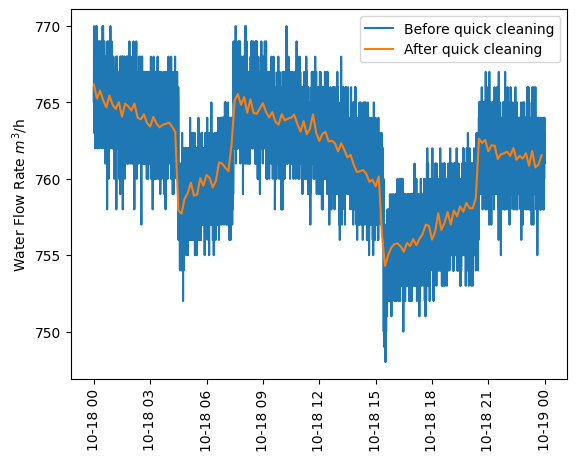

In [17]:

plt.plot(initial_view["Value"], label="Before quick cleaning")
plt.plot(df.loc["2022-10-18", 481], label="After quick cleaning")
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()

In [18]:
df = df.rename(columns=df_refacP1.IDS_MAP)
# df11 = df11.rename(columns=df_refacP11.IDS_MAP)
# df12 = df12.rename(columns=df_refacP11.IDS_MAP)

In [19]:
df.loc["2020-10-22"]

T1aHE   P2      T1bHE      T2bHE      T2aHE  \
Timestamp                                                              
2020-10-22 00:00:00  40.018750  0.4  45.746875  25.900000  31.800000   
2020-10-22 00:10:00  40.209375  0.4  45.909376  26.118750  32.018749   
2020-10-22 00:20:00  40.390626  0.4  46.090625  26.318749  32.209375   
2020-10-22 00:30:00  40.545161  0.4  46.206452  26.496970  32.374194   
2020-10-22 00:40:00  40.659375  0.4  46.309374  26.625807  32.500000   
...                        ...  ...        ...        ...        ...   
2020-10-22 23:10:00  38.583870  0.4  44.918182  22.642858  29.229412   
2020-10-22 23:20:00  38.493548  0.4  44.799999  22.564516  29.121213   
2020-10-22 23:30:00  38.390626  0.4  44.681250  22.425714  29.006452   
2020-10-22 23:40:00  38.293548  0.4  44.587499  22.374285  28.954839   
2020-10-22 23:50:00  38.212122  0.4  44.518750  22.322856  28.887500   

                      Treactor     T2aHE1       Tair      CTF1       CTF2  \
Timestamp                                                                   
2020-10-22 00:00:00  43.290000  32.309375  11.582353       NaN  74.769416   
2020-10-22 00:10:00  43.384616  32.518750  11.276470  1.498003  74.572840   
2020-10-22 00:20:00  43.571794  32.709375  11.151429  1.260054  74.746200   
2020-10-22 00:30:00  43.686487  32.874194  11.194445       NaN  74.690781   
2020-10-22 00:40:00  43.766667  33.000000  11.094118  0.164041  74.626696   
...                        ...        ...        ...       ...        ...   
2020-10-22 23:10:00  42.732500  29.890625   4.987500  3.599714  75.271479   
2020-10-22 23:20:00  42.639473  29.799999   4.987500  0.575017  75.303903   
2020-10-22 23:30:00  42.576922  29.700001   5.000000  0.009013  74.921119   
2020-10-22 23:40:00  42.492105  29.606061   5.000000       NaN  74.870067   
2020-10-22 23:50:00  42.415001  29.536364   4.903125       NaN  74.875051   

                          CTF3       Q2       p21         p22        p23  \
Timestamp                                                                  
2020-10-22 00:00:00   0.081483  662.200       NaN  145.874617  87.871665   
2020-10-22 00:10:00        NaN  660.750  3.703270  145.570840  88.020234   
2020-10-22 00:20:00   0.805248  662.725  0.492278  145.468490  87.754223   
2020-10-22 00:30:00   1.711791  662.450       NaN  145.331498  87.678419   
2020-10-22 00:40:00   2.205857  662.450  0.962146  145.259597  87.738239   
...                        ...      ...       ...         ...        ...   
2020-10-22 23:10:00  92.863924  655.750       NaN  146.008919  87.524849   
2020-10-22 23:20:00  92.991029  656.150  2.185304  146.301485  87.683229   
2020-10-22 23:30:00  92.869437  656.050       NaN  146.152678  87.998067   
2020-10-22 23:40:00  92.741931  655.425  2.647857  145.932309  87.988342   
2020-10-22 23:50:00  92.888765  655.350       NaN  146.095743  87.745661   

                           p24     T2aHE2     T2aHE3     T2aHE4     T2aHE5  
Timestamp                                                                   
2020-10-22 00:00:00  98.031777  32.039194  32.671015  30.874725  31.111532  
2020-10-22 00:10:00  98.353900  32.252745  32.890938  31.093978  31.330786  
2020-10-22 00:20:00  97.997201  32.443253  33.088755  31.286624  31.523897  
2020-10-22 00:30:00  97.941538  32.600240  33.254347  31.444370  31.680223  
2020-10-22 00:40:00  97.950015  32.718955  33.373997  31.563981  31.795506  
...                        ...        ...        ...        ...        ...  
2020-10-22 23:10:00  96.852889  29.556386  30.196115  28.187985  28.451869  
2020-10-22 23:20:00  96.993670  29.466167  30.094397  28.099341  28.362748  
2020-10-22 23:30:00  97.451919  29.351963  29.983819  27.984593  28.251176  
2020-10-22 23:40:00  97.481737  29.277080  29.904328  27.909828  28.175036  
2020-10-22 23:50:00  97.281163  29.214430  29.838380  27.848895  28.120645  

[144 rows x 20 columns]

In [20]:
df = df.reindex(sorted(df.columns), axis=1)
# df11 = df11.reindex(sorted(df11.columns), axis=1)
# df12 = df12.reindex(sorted(df12.columns), axis=1)

In [21]:
# # quick TCF categorizing ( set 0 or 1)

# df["CTF1"] = np.where(df["CTF1"] > 20, 1, 0)
# df["CTF2"] = np.where(df["CTF2"] > 20, 1, 0)
# df["CTF3"] = np.where(df["CTF3"] > 20, 1, 0)

# # quick I of pumps filter
# df["p21"] = np.where(df["p21"] < 10, 1, df["p21"])
# df["p22"] = np.where(df["p22"] < 10, 1, df["p22"])
# df["p23"] = np.where(df["p23"] < 10, 1, df["p23"])
# df["p24"] = np.where(df["p24"] < 10, 1, df["p24"])

In [22]:
# # quick TCF categorizing ( set 0 or 1)

# df11["CTF1"] = np.where(df11["CTF1"] > 20, 1, 0)
# df11["CTF2"] = np.where(df11["CTF2"] > 20, 1, 0)
# df11["CTF3"] = np.where(df11["CTF3"] > 20, 1, 0)

# # quick I of pumps filter
# df11["p21"] = np.where(df11["p21"] < 10, 1, df11["p21"])
# df11["p22"] = np.where(df11["p22"] < 10, 1, df11["p22"])
# df11["p23"] = np.where(df11["p23"] < 10, 1, df11["p23"])
# df11["p24"] = np.where(df11["p24"] < 10, 1, df11["p24"])

In [23]:
# # quick TCF categorizing ( set 0 or 1)

# df12["CTF1"] = np.where(df12["CTF1"] > 20, 1, 0)
# df12["CTF2"] = np.where(df12["CTF2"] > 20, 1, 0)
# df12["CTF3"] = np.where(df12["CTF3"] > 20, 1, 0)

# # quick I of pumps filter
# df12["p21"] = np.where(df12["p21"] < 10, 1, df12["p21"])
# df12["p22"] = np.where(df12["p22"] < 10, 1, df12["p22"])
# df12["p23"] = np.where(df12["p23"] < 10, 1, df12["p23"])
# df12["p24"] = np.where(df12["p24"] < 10, 1, df12["p24"])

In [24]:
periods_all = df_refacP1.select_time_period(df, time_periods_all)
periods_all

{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2          Q2  \
 Timestamp                                                                   
 2020-10-12 13:30:00   1.582728   0.000000  4.349432  0.000000    1.000000   
 2020-10-12 13:40:00   3.565465   4.483624  0.000000  0.000000    1.000000   
 2020-10-12 13:50:00   1.487182   2.046171  3.554422  0.000000    1.000000   
 2020-10-12 14:00:00   3.518598   3.627772  0.350142  0.000000    1.000000   
 2020-10-12 14:10:00   0.000000   3.837551  1.425953  0.000000    1.000000   
 ...                        ...        ...       ...       ...         ...   
 2020-10-16 23:10:00  94.188807  76.124606  4.408670  0.400000  645.500000   
 2020-10-16 23:20:00  93.879466  76.267013  3.565428  0.400000  644.600000   
 2020-10-16 23:30:00  80.447662  58.229297  3.430923  0.364242  697.275000   
 2020-10-16 23:40:00   0.000000   3.978002  1.686834  0.125556  155.352941   
 2020-10-16 23:50:00   0.000000   0.000

In [25]:
pdp = PeriodicDataPreprocess(periods_all.copy())
# pdp11 = PeriodicDataPreprocess(periods2)
# pdp12 = PeriodicDataPreprocess(periods3)

In [26]:
pdp.conditional_rows_drop(["p21", "p22", "p23", "p24"], "eq", 0.0)
# pdp11.conditional_rows_drop(["p21", "p22", "p23", "p24"], "eq", 0.0)
# pdp12.conditional_rows_drop(["p21", "p22", "p23", "p24"], "eq", 0.0)

{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2          Q2  \
 Timestamp                                                                   
 2020-10-12 13:30:00   1.582728   0.000000  4.349432  0.000000    1.000000   
 2020-10-12 13:40:00   3.565465   4.483624  0.000000  0.000000    1.000000   
 2020-10-12 13:50:00   1.487182   2.046171  3.554422  0.000000    1.000000   
 2020-10-12 14:00:00   3.518598   3.627772  0.350142  0.000000    1.000000   
 2020-10-12 14:10:00   0.000000   3.837551  1.425953  0.000000    1.000000   
 ...                        ...        ...       ...       ...         ...   
 2020-10-16 23:00:00  94.114711  75.965522  2.016155  0.400000  645.625000   
 2020-10-16 23:10:00  94.188807  76.124606  4.408670  0.400000  645.500000   
 2020-10-16 23:20:00  93.879466  76.267013  3.565428  0.400000  644.600000   
 2020-10-16 23:30:00  80.447662  58.229297  3.430923  0.364242  697.275000   
 2020-10-16 23:40:00   0.000000   3.978

In [27]:
pdp.filter_by_zscore(column="Q2")

# pdp.filter_by_deviation(column="Q2", bysigma=2)

# pdp11.filter_by_deviation(column="Q2", value=0.05)
# pdp12.filter_by_deviation(column="Q2", value=0.05)

{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2       Q2  \
 Timestamp                                                                
 2020-10-12 21:30:00   1.258187   1.782561  4.501372  0.410000  641.600   
 2020-10-12 21:40:00   2.784956   2.490294  4.087159  0.410000  640.775   
 2020-10-12 21:50:00   3.554829   2.210476  3.294444  0.410000  640.975   
 2020-10-12 22:00:00   0.000000   0.006482  1.614919  0.410000  642.125   
 2020-10-12 22:10:00   0.643516   1.256436  1.904941  0.409677  642.275   
 ...                        ...        ...       ...       ...      ...   
 2020-10-16 22:40:00  94.618335  75.863629  2.042560  0.400000  647.275   
 2020-10-16 22:50:00  94.425358  76.041941  1.500459  0.400000  647.050   
 2020-10-16 23:00:00  94.114711  75.965522  2.016155  0.400000  645.625   
 2020-10-16 23:10:00  94.188807  76.124606  4.408670  0.400000  645.500   
 2020-10-16 23:20:00  93.879466  76.267013  3.565428  0.400000  644.600   


In [28]:
pdp.sma_smoothing(num_points=10)

{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2        Q2  \
 Timestamp                                                                 
 2020-10-12 21:30:00   1.570343   1.237553  2.488838  0.409288  642.3575   
 2020-10-12 21:40:00   1.446688   1.184904  2.099260  0.408888  642.6450   
 2020-10-12 21:50:00   1.173059   1.238698  1.798453  0.408463  643.1375   
 2020-10-12 22:00:00   0.817576   1.370074  1.755406  0.407938  643.5325   
 2020-10-12 22:10:00   1.061115   1.739339  2.049558  0.407463  643.9125   
 ...                        ...        ...       ...       ...       ...   
 2020-10-16 21:00:00  39.128373  75.887775  2.312819  0.400000  648.3925   
 2020-10-16 21:10:00  48.324137  75.938873  2.290916  0.400000  648.0350   
 2020-10-16 21:20:00  57.766673  75.983098  2.430062  0.400000  647.7800   
 2020-10-16 21:30:00  66.850783  75.985316  2.492862  0.400000  647.5625   
 2020-10-16 21:40:00  76.269663  75.995804  2.651856  0.400000 

In [29]:
pdp.pumps_mapping(columns=["p21", "p22", "p23", "p24"], drop_pumps=False)
# pdp11.pumps_mapping(columns=["p21", "p22", "p23", "p24"], drop_pumps=False)
# pdp12.pumps_mapping(columns=["p21", "p22", "p23", "p24"], drop_pumps=False)

['p21', 'p22', 'p23', 'p24']


{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2        Q2  \
 Timestamp                                                                 
 2020-10-12 21:30:00   1.570343   1.237553  2.488838  0.409288  642.3575   
 2020-10-12 21:40:00   1.446688   1.184904  2.099260  0.408888  642.6450   
 2020-10-12 21:50:00   1.173059   1.238698  1.798453  0.408463  643.1375   
 2020-10-12 22:00:00   0.817576   1.370074  1.755406  0.407938  643.5325   
 2020-10-12 22:10:00   1.061115   1.739339  2.049558  0.407463  643.9125   
 ...                        ...        ...       ...       ...       ...   
 2020-10-16 21:00:00  39.128373  75.887775  2.312819  0.400000  648.3925   
 2020-10-16 21:10:00  48.324137  75.938873  2.290916  0.400000  648.0350   
 2020-10-16 21:20:00  57.766673  75.983098  2.430062  0.400000  647.7800   
 2020-10-16 21:30:00  66.850783  75.985316  2.492862  0.400000  647.5625   
 2020-10-16 21:40:00  76.269663  75.995804  2.651856  0.400000 

(640.0, 740.0)

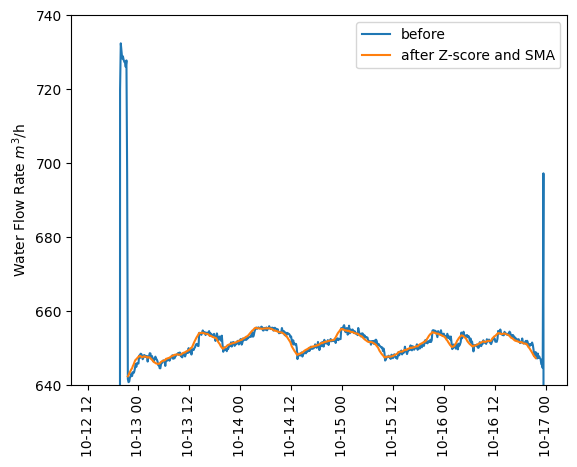

In [30]:
# quick view on sma results
plt.plot(periods_all["2020-10-12 2020-10-16"].loc[:, "Q2"], label="before")
plt.plot(pdp.period["2020-10-12 2020-10-16"].loc[:, "Q2"], label="after Z-score and SMA")
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()
plt.ylim(640, 740)

In [31]:
pa_ftrd = pdp.period["2020-10-12 2020-10-16"].copy()

In [32]:
# quick binning to plot data distribution bar
periods_all["2020-10-12 2020-10-16"]["Q2_binned"], pa_bins = pd.cut(
    periods_all["2020-10-12 2020-10-16"]["Q2"][periods_all["2020-10-12 2020-10-16"]["Q2"] > 200],
    bins=100,
    labels=False,
    retbins=True
)
pa_bins = np.array(
    list(
        map(
            lambda x: "{:.1f}".format(x),
            pa_bins
        )
    )
)


pa_ftrd["Q2_binned"], pa_ftrd_bins = pd.cut(
    pa_ftrd["Q2"],
    bins=19,
    labels=False,
    retbins=True
)

In [33]:
pa_q2_gr = periods_all["2020-10-12 2020-10-16"].groupby("Q2_binned").count()
pa_q2_gr_ftrd = pa_ftrd.groupby("Q2_binned").count()

In [34]:
pa_q2_gr = pa_q2_gr[pa_q2_gr > 1].dropna()
pa_q2_gr

CTF1  CTF2  CTF3    P2    Q2  T1aHE  T1bHE  T2aHE  T2aHE1  T2aHE2  \
Q2_binned                                                                      
0.0         3.0   3.0   3.0   3.0   3.0    3.0    3.0    3.0     3.0     3.0   
1.0         3.0   3.0   3.0   3.0   3.0    3.0    3.0    3.0     3.0     3.0   
2.0         3.0   3.0   3.0   3.0   3.0    3.0    3.0    3.0     3.0     3.0   
4.0         7.0   7.0   7.0   7.0   7.0    7.0    7.0    7.0     7.0     7.0   
5.0        10.0  10.0  10.0  10.0  10.0   10.0   10.0   10.0    10.0    10.0   
6.0        25.0  25.0  25.0  25.0  25.0   25.0   25.0   25.0    25.0    25.0   
7.0        50.0  50.0  50.0  50.0  50.0   50.0   50.0   50.0    50.0    50.0   
8.0        44.0  44.0  44.0  44.0  44.0   44.0   44.0   44.0    44.0    44.0   
9.0        39.0  39.0  39.0  39.0  39.0   39.0   39.0   39.0    39.0    39.0   
10.0       62.0  62.0  62.0  62.0  62.0   62.0   62.0   62.0    62.0    62.0   
11.0       78.0  78.0  78.0  78.0  78.0   78.0   78.0   78.0    78.0    78.0   
12.0       73.0  73.0  73.0  73.0  73.0   73.0   73.0   73.0    73.0    73.0   
13.0       59.0  59.0  59.0  59.0  59.0   59.0   59.0   59.0    59.0    59.0   
14.0       69.0  69.0  69.0  69.0  69.0   69.0   69.0   69.0    69.0    69.0   
15.0       47.0  47.0  47.0  47.0  47.0   47.0   47.0   47.0    47.0    47.0   
16.0       15.0  15.0  15.0  15.0  15.0   15.0   15.0   15.0    15.0    15.0   
61.0        2.0   2.0   2.0   2.0   2.0    2.0    2.0    2.0     2.0     2.0   
94.0        3.0   3.0   3.0   3.0   3.0    3.0    3.0    3.0     3.0     3.0   
95.0        2.0   2.0   2.0   2.0   2.0    2.0    2.0    2.0     2.0     2.0   

           T2aHE3  T2aHE4  T2aHE5  T2bHE  Tair  Treactor   p21   p22   p23  \
Q2_binned                                                                    
0.0           3.0     3.0     3.0    3.0   3.0       3.0   3.0   3.0   3.0   
1.0           3.0     3.0     3.0    3.0   3.0       3.0   3.0   3.0   3.0   
2.0           3.0     3.0     3.0    3.0   3.0       3.0   3.0   3.0   3.0   
4.0           7.0     7.0     7.0    7.0   7.0       7.0   7.0   7.0   7.0   
5.0          10.0    10.0    10.0   10.0  10.0      10.0  10.0  10.0  10.0   
6.0          25.0    25.0    25.0   25.0  25.0      25.0  25.0  25.0  25.0   
7.0          50.0    50.0    50.0   50.0  50.0      50.0  50.0  50.0  50.0   
8.0          44.0    44.0    44.0   44.0  44.0      44.0  44.0  44.0  44.0   
9.0          39.0    39.0    39.0   39.0  39.0      39.0  39.0  39.0  39.0   
10.0         62.0    62.0    62.0   62.0  62.0      62.0  62.0  62.0  62.0   
11.0         78.0    78.0    78.0   78.0  78.0      78.0  78.0  78.0  78.0   
12.0         73.0    73.0    73.0   73.0  73.0      73.0  73.0  73.0  73.0   
13.0         59.0    59.0    59.0   59.0  59.0      59.0  59.0  59.0  59.0   
14.0         69.0    69.0    69.0   69.0  69.0      69.0  69.0  69.0  69.0   
15.0         47.0    47.0    47.0   47.0  47.0      47.0  47.0  47.0  47.0   
16.0         15.0    15.0    15.0   15.0  15.0      15.0  15.0  15.0  15.0   
61.0          2.0     2.0     2.0    2.0   2.0       2.0   2.0   2.0   2.0   
94.0          3.0     3.0     3.0    3.0   3.0       3.0   3.0   3.0   3.0   
95.0          2.0     2.0     2.0    2.0   2.0       2.0   2.0   2.0   2.0   

            p24  
Q2_binned        
0.0         3.0  
1.0         3.0  
2.0         3.0  
4.0         7.0  
5.0        10.0  
6.0        25.0  
7.0        50.0  
8.0        44.0  
9.0        39.0  
10.0       62.0  
11.0       78.0  
12.0       73.0  
13.0       59.0  
14.0       69.0  
15.0       47.0  
16.0       15.0  
61.0        2.0  
94.0        3.0  
95.0        2.0

19


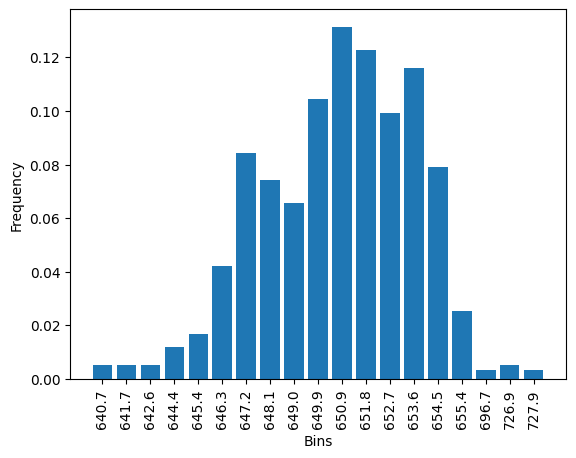

In [35]:
pa_q2_gr_ni = pa_q2_gr.reset_index()
plt.bar(pa_q2_gr_ni.index, pa_q2_gr_ni["Q2"]/pa_q2_gr_ni["Q2"].sum())
plt.ylabel("Frequency")
plt.xlabel("Bins")
plt.xticks(
    pa_q2_gr_ni.index,
#     pa_bins[pa_q2_gr.index.astype(int)],
    pa_bins[pa_q2_gr_ni["Q2_binned"].astype(int)],
    rotation=90
)
print(len(pa_bins[pa_q2_gr_ni["Q2_binned"].astype(int)]))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e4edb8b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e4ed99210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e4edb88b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e4edb9450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e4edb96f0>],
 'means': []}

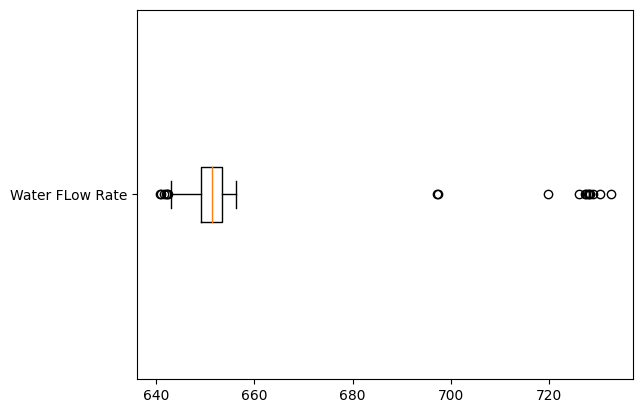

In [36]:
# before filtering
plt.boxplot(
    periods_all["2020-10-12 2020-10-16"]["Q2"][periods_all["2020-10-12 2020-10-16"]["Q2"] > 200], 
    vert=False,
    labels=["Water FLow Rate"]
)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e4ee0efb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e4ee0f3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e4ee0ed10>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2e4ee0f910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e4ee0fbb0>,
 'means': []}

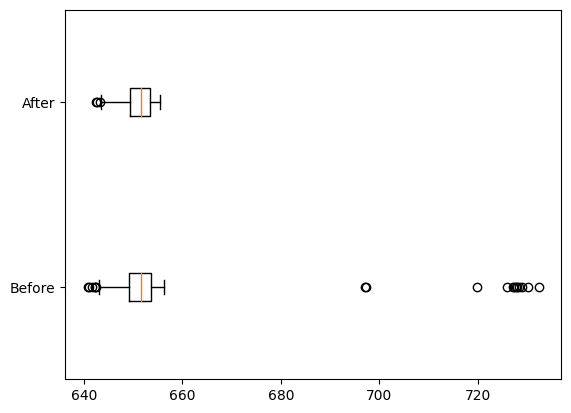

In [37]:
plt.boxplot(
    [
        periods_all["2020-10-12 2020-10-16"]["Q2"][periods_all["2020-10-12 2020-10-16"]["Q2"] > 200],
        pa_ftrd["Q2"]
    ], 
    vert=False,
    labels=[
        "Before",
        "After"
    ]
)

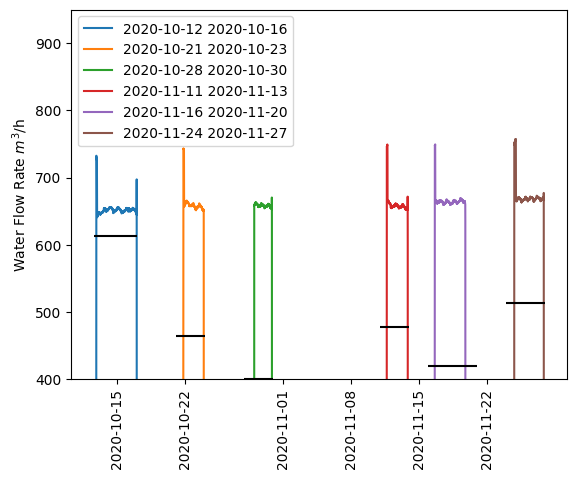

In [38]:
# plot Q2 for some weeks before zscore filtering
weeks = list(pdp.period_keys)[:6]
for i in weeks:
    plt.plot(periods_all[i]["Q2"], label=i)
    plt.hlines(
        periods_all[i]["Q2"].mean(),
        periods_all[i]["Q2"].index[0],
        periods_all[i]["Q2"].index[-1],
        color="black",
        
)
plt.ylim(400, 950)
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()

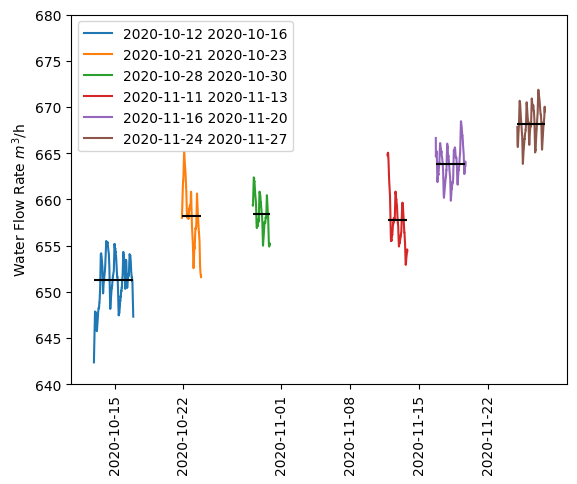

In [39]:
# plot Q2 for some weeks
weeks = list(pdp.period_keys)[:6]
for i in weeks:
    plt.plot(pdp.period[i]["Q2"], label=i)
    plt.hlines(
        pdp.period[i]["Q2"].mean(),
        pdp.period[i]["Q2"].index[0],
        pdp.period[i]["Q2"].index[-1],
        color="black"
        
)
plt.ylim(640,680)
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()

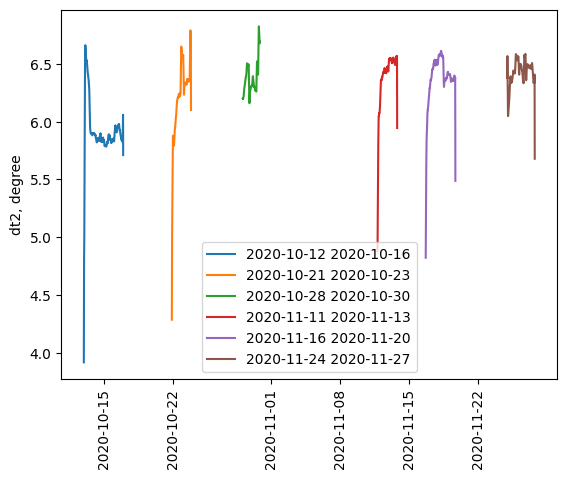

In [55]:
## dt2 has high bias so lets check how Q2 filtering fixed it
# plot dt for some weeks
# is there an urge to filter data one more time but now by dt?
weeks = list(pdp.period_keys)[:6]
for i in weeks:
    plt.plot(
        pdp.period[i]["T2aHE"] - pdp.period[i]["T2bHE"], 
        label=i)

plt.ylabel("dt2, degree")
plt.xticks(rotation=90)
plt.legend()

In [40]:
pdp.period["2020-10-12 2020-10-16"]

CTF1       CTF2      CTF3        P2        Q2  \
Timestamp                                                                 
2020-10-12 21:30:00   1.570343   1.237553  2.488838  0.409288  642.3575   
2020-10-12 21:40:00   1.446688   1.184904  2.099260  0.408888  642.6450   
2020-10-12 21:50:00   1.173059   1.238698  1.798453  0.408463  643.1375   
2020-10-12 22:00:00   0.817576   1.370074  1.755406  0.407938  643.5325   
2020-10-12 22:10:00   1.061115   1.739339  2.049558  0.407463  643.9125   
...                        ...        ...       ...       ...       ...   
2020-10-16 21:00:00  39.128373  75.887775  2.312819  0.400000  648.3925   
2020-10-16 21:10:00  48.324137  75.938873  2.290916  0.400000  648.0350   
2020-10-16 21:20:00  57.766673  75.983098  2.430062  0.400000  647.7800   
2020-10-16 21:30:00  66.850783  75.985316  2.492862  0.400000  647.5625   
2020-10-16 21:40:00  76.269663  75.995804  2.651856  0.400000  647.3025   

                         T1aHE      T1bHE      T2aHE     T2aHE1     T2aHE2  \
Timestamp                                                                    
2020-10-12 21:30:00  23.850000  28.162000  17.778855  18.300750  18.159696   
2020-10-12 21:40:00  25.714500  30.296115  19.121355  19.679500  19.516629   
2020-10-12 21:50:00  27.441250  32.243615  20.491750  21.070013  20.889428   
2020-10-12 22:00:00  29.113500  34.100115  21.892250  22.480013  22.288110   
2020-10-12 22:10:00  30.598750  35.611115  23.247750  23.829013  23.627132   
...                        ...        ...        ...        ...        ...   
2020-10-16 21:00:00  40.934098  46.483267  32.799337  33.402238  32.999228   
2020-10-16 21:10:00  40.784744  46.365718  32.571003  33.187164  32.777891   
2020-10-16 21:20:00  40.575577  46.187385  32.276409  32.908625  32.492148   
2020-10-16 21:30:00  40.065077  45.380135  31.785574  32.419138  32.000055   
2020-10-16 21:40:00  38.995077  43.880135  31.022165  31.638751  31.223183   

                     ...     T2aHE4     T2aHE5      T2bHE      Tair  \
Timestamp            ...                                              
2020-10-12 21:30:00  ...  17.463094  17.545674  13.860172  5.746905   
2020-10-12 21:40:00  ...  18.751445  18.860591  14.875110  5.735292   
2020-10-12 21:50:00  ...  20.074556  20.205941  15.993610  5.725292   
2020-10-12 22:00:00  ...  21.432932  21.583928  17.185776  5.715291   
2020-10-12 22:10:00  ...  22.754065  22.914307  18.428750  5.707110   
...                  ...        ...        ...        ...       ...   
2020-10-16 21:00:00  ...  31.806974  31.996085  26.842116  2.886905   
2020-10-16 21:10:00  ...  31.574366  31.763104  26.562066  2.737446   
2020-10-16 21:20:00  ...  31.276353  31.465097  26.216365  2.593677   
2020-10-16 21:30:00  ...  30.796180  30.965250  25.803326  2.468344   
2020-10-16 21:40:00  ...  30.071552  30.209169  25.311176  2.368532   

                      Treactor       p21         p22        p23        p24  \
Timestamp                                                                    
2020-10-12 21:30:00  27.868372  1.377592  146.780959  87.428737  95.328873   
2020-10-12 21:40:00  29.822122  1.411156  146.777368  87.382745  95.242299   
2020-10-12 21:50:00  31.635372  1.754055  146.776926  87.339097  95.154109   
2020-10-12 22:00:00  33.313622  1.390255  146.797425  87.295698  95.036686   
2020-10-12 22:10:00  34.692872  1.217222  146.816160  87.286715  94.946545   
...                        ...       ...         ...        ...        ...   
2020-10-16 21:00:00  46.521643  0.860823  145.645556  87.110241  94.421326   
2020-10-16 21:10:00  46.399079  0.860823  145.651501  87.070091  94.347900   
2020-10-16 21:20:00  46.184220  0.829498  145.666442  87.012338  94.255958   
2020-10-16 21:30:00  45.178265  1.191229  145.629141  86.987174  94.252848   
2020-10-16 21:40:00  43.628427  1.022289  145.585455  86.946839  94.230588   

                     pumps2  
Timestamp                    
2020-10-12 21:30:00     234  
2020-1

In [41]:
df = pdp.to_dataframe()
# df11 = pdp11.to_dataframe()
# df12 = pdp12.to_dataframe()
df

CTF1       CTF2      CTF3        P2        Q2  \
Timestamp                                                                
2020-10-12 21:30:00  1.570343   1.237553  2.488838  0.409288  642.3575   
2020-10-12 21:40:00  1.446688   1.184904  2.099260  0.408888  642.6450   
2020-10-12 21:50:00  1.173059   1.238698  1.798453  0.408463  643.1375   
2020-10-12 22:00:00  0.817576   1.370074  1.755406  0.407938  643.5325   
2020-10-12 22:10:00  1.061115   1.739339  2.049558  0.407463  643.9125   
...                       ...        ...       ...       ...       ...   
2023-04-14 08:20:00  0.275390  78.496618  1.142607  0.480000  653.3625   
2023-04-14 08:30:00  0.334066  78.454029  1.294887  0.480000  653.3200   
2023-04-14 08:40:00  0.590537  78.416048  1.273086  0.480000  653.2500   
2023-04-14 08:50:00  0.779275  78.386228  1.161926  0.480000  653.1425   
2023-04-14 09:00:00  0.779275  78.367643  0.887099  0.480000  653.1050   

                         T1aHE      T1bHE      T2aHE     T2aHE1     T2aHE2  \
Timestamp                                                                    
2020-10-12 21:30:00  23.850000  28.162000  17.778855  18.300750  18.159696   
2020-10-12 21:40:00  25.714500  30.296115  19.121355  19.679500  19.516629   
2020-10-12 21:50:00  27.441250  32.243615  20.491750  21.070013  20.889428   
2020-10-12 22:00:00  29.113500  34.100115  21.892250  22.480013  22.288110   
2020-10-12 22:10:00  30.598750  35.611115  23.247750  23.829013  23.627132   
...                        ...        ...        ...        ...        ...   
2023-04-14 08:20:00  40.693871  47.013086  29.354231  29.247863  29.126280   
2023-04-14 08:30:00  40.617309  46.939538  29.261005  29.153992  29.032107   
2023-04-14 08:40:00  40.539244  46.865021  29.162880  29.055867  28.935057   
2023-04-14 08:50:00  40.459244  46.791796  29.063364  28.958379  28.837507   
2023-04-14 09:00:00  40.386098  46.721796  28.968848  28.865456  28.746176   

                     ...     T2aHE4     T2aHE5      T2bHE      Tair  \
Timestamp            ...                                              
2020-10-12 21:30:00  ...  17.463094  17.545674  13.860172  5.746905   
2020-10-12 21:40:00  ...  18.751445  18.860591  14.875110  5.735292   
2020-10-12 21:50:00  ...  20.074556  20.205941  15.993610  5.725292   
2020-10-12 22:00:00  ...  21.432932  21.583928  17.185776  5.715291   
2020-10-12 22:10:00  ...  22.754065  22.914307  18.428750  5.707110   
...                  ...        ...        ...        ...       ...   
2023-04-14 08:20:00  ...  29.132247  26.263673  23.447375 -5.423174   
2023-04-14 08:30:00  ...  29.037117  29.545569  23.351246 -5.526390   
2023-04-14 08:40:00  ...  28.938854  32.827047  23.250601 -5.616127   
2023-04-14 08:50:00  ...  28.840100  32.824711  23.148328 -5.648090   
2023-04-14 09:00:00  ...  28.748384  32.821934  23.053490 -5.631966   

                      Treactor         p21         p22         p23        p24  \
Timestamp                                                                       
2020-10-12 21:30:00  27.868372    1.377592  146.780959   87.428737  95.328873   
2020-10-12 21:40:00  29.822122    1.411156  146.777368   87.382745  95.242299   
2020-10-12 21:50:00  31.635372    1.754055  146.776926   87.339097  95.154109   
2020-10-12 22:00:00  33.313622    1.390255  146.797425   87.295698  95.036686   
2020-10-12 22:10:00  34.692872    1.217222  146.816160   87.286715  94.946545   
...                        ...         ...         ...         ...        ...   
2023-04-14 08:20:00  42.181408  143.836907  138.485194  139.700230   1.688534   
2023-04-14 08:30:00  42.109357  143.749941  138.392543  139.714897   1.902118   
2023-04-14 08:40:00  42.042921  143.704441  138.346457  139.719659   1.841627   
2023-04-14 08:50:00  41.984203  143.688264  138.327720  139.728124   1.961349   
2023-04-14 09:00:00  41.918406  143.691856  138.325682  139.734595   2.034873   

                     pumps2  
Timestamp                    
2020-10-1

In [42]:
df.to_excel("rdy_for_fe_121020_to_210423.xlsx")
# df.to_excel("rdy_for_fe_050922_to_210423.xlsx")
# df11.to_excel("rdy_for_fe_060921_to_010722.xlsx")
# df12.to_excel("rdy_for_fe_121020_to_060921.xlsx")

In [7]:
df = pd.read_excel("rdy_for_fe_121020_to_210423.xlsx", index_col="Timestamp")
# df = pd.read_excel("rdy_for_fe_121020_to_210423.xlsx", index_col=0)


In [28]:
fe = FeatureEngineering(df)
# fe11 = FeatureEngineering(df11)
# fe12 = FeatureEngineering(df12)

In [29]:
fe.df

CTF1       CTF2      CTF3        P2        Q2  \
Timestamp                                                                
2020-10-12 21:30:00  1.570343   1.237553  2.488838  0.409288  642.3575   
2020-10-12 21:40:00  1.446688   1.184904  2.099260  0.408888  642.6450   
2020-10-12 21:50:00  1.173059   1.238698  1.798453  0.408463  643.1375   
2020-10-12 22:00:00  0.817576   1.370074  1.755406  0.407938  643.5325   
2020-10-12 22:10:00  1.061115   1.739339  2.049558  0.407463  643.9125   
...                       ...        ...       ...       ...       ...   
2023-04-14 08:20:00  0.275390  78.496618  1.142607  0.480000  653.3625   
2023-04-14 08:30:00  0.334066  78.454029  1.294887  0.480000  653.3200   
2023-04-14 08:40:00  0.590537  78.416048  1.273086  0.480000  653.2500   
2023-04-14 08:50:00  0.779275  78.386228  1.161926  0.480000  653.1425   
2023-04-14 09:00:00  0.779275  78.367643  0.887099  0.480000  653.1050   

                         T1aHE      T1bHE      T2aHE     T2aHE1     T2aHE2  \
Timestamp                                                                    
2020-10-12 21:30:00  23.850000  28.162000  17.778855  18.300750  18.159696   
2020-10-12 21:40:00  25.714500  30.296115  19.121355  19.679500  19.516629   
2020-10-12 21:50:00  27.441250  32.243615  20.491750  21.070013  20.889428   
2020-10-12 22:00:00  29.113500  34.100115  21.892250  22.480013  22.288110   
2020-10-12 22:10:00  30.598750  35.611115  23.247750  23.829013  23.627132   
...                        ...        ...        ...        ...        ...   
2023-04-14 08:20:00  40.693871  47.013086  29.354231  29.247863  29.126280   
2023-04-14 08:30:00  40.617309  46.939538  29.261005  29.153992  29.032107   
2023-04-14 08:40:00  40.539244  46.865021  29.162880  29.055867  28.935057   
2023-04-14 08:50:00  40.459244  46.791796  29.063364  28.958379  28.837507   
2023-04-14 09:00:00  40.386098  46.721796  28.968848  28.865456  28.746176   

                     ...   Treactor         p21         p22         p23  \
Timestamp            ...                                                  
2020-10-12 21:30:00  ...  27.868372    1.377592  146.780959   87.428737   
2020-10-12 21:40:00  ...  29.822122    1.411156  146.777368   87.382745   
2020-10-12 21:50:00  ...  31.635372    1.754055  146.776926   87.339097   
2020-10-12 22:00:00  ...  33.313622    1.390255  146.797425   87.295698   
2020-10-12 22:10:00  ...  34.692872    1.217222  146.816160   87.286715   
...                  ...        ...         ...         ...         ...   
2023-04-14 08:20:00  ...  42.181408  143.836907  138.485194  139.700230   
2023-04-14 08:30:00  ...  42.109357  143.749941  138.392543  139.714897   
2023-04-14 08:40:00  ...  42.042921  143.704441  138.346457  139.719659   
2023-04-14 08:50:00  ...  41.984203  143.688264  138.327720  139.728124   
2023-04-14 09:00:00  ...  41.918406  143.691856  138.325682  139.734595   

                           p24  pumps2       dt1       dt2  dt_circuits_coef  \
Timestamp                                                                      
2020-10-12 21:30:00  95.328873     234  4.312000  3.918683          2.031865   
2020-10-12 21:40:00  95.242299     234  4.581615  4.246246          2.036699   
2020-10-12 21:50:00  95.154109     234  4.802365  4.498140          2.016031   
2020-10-12 22:00:00  95.036686     234  4.986615  4.706474          1.984206   
2020-10-12 22:10:00  94.946545     234  5.012365  4.819000          1.932367   
...                        ...     ...       ...       ...               ...   
2023-04-14 08:20:00   1.688534     123  6.319215  5.906856          2.005047   
2023-04-14 08:30:00   1.902118     123  6.322229  5.909759          2.010151   
2023-04-14 08:40:00   1.841627     123  6.325777  5.912279          2.015648   
2023-04-14 08:50:00   1.961349     123  6.332552  5.915036          2.021390   
2023-04-14 09:00:00   2.034873     123  6.335697  5.915358          2.026669   

                     dt_circui

In [30]:
fe.df["dt1"].describe()

count    39975.000000
mean         6.396775
std          0.850758
min         -8.200000
25%          6.126024
50%          6.411852
75%          6.621128
max         38.400000
Name: dt1, dtype: float64

In [31]:
fe.filter_by_zscore("dt2")
fe.filter_by_zscore("dt1")

CTF1       CTF2      CTF3        P2        Q2  \
Timestamp                                                                 
2020-10-12 23:00:00   1.026519  33.796766  2.560670  0.403619  646.0100   
2020-10-12 23:10:00   8.695583  41.649093  2.540896  0.402855  646.4900   
2020-10-12 23:20:00  18.242827  49.384503  2.656508  0.402255  646.8425   
2020-10-12 23:30:00  27.729284  56.906123  2.742166  0.401680  646.9700   
2020-10-12 23:40:00  37.195298  64.345757  2.662660  0.401205  647.2200   
...                        ...        ...       ...       ...       ...   
2023-04-14 08:20:00   0.275390  78.496618  1.142607  0.480000  653.3625   
2023-04-14 08:30:00   0.334066  78.454029  1.294887  0.480000  653.3200   
2023-04-14 08:40:00   0.590537  78.416048  1.273086  0.480000  653.2500   
2023-04-14 08:50:00   0.779275  78.386228  1.161926  0.480000  653.1425   
2023-04-14 09:00:00   0.779275  78.367643  0.887099  0.480000  653.1050   

                         T1aHE      T1bHE      T2aHE     T2aHE1     T2aHE2  \
Timestamp                                                                    
2020-10-12 23:00:00  36.846820  42.165683  29.242241  29.770974  29.537056   
2020-10-12 23:10:00  37.900775  43.313046  30.164779  30.697474  30.451111   
2020-10-12 23:20:00  38.859150  44.372977  30.984493  31.524661  31.262837   
2020-10-12 23:30:00  39.721037  45.351364  31.676084  32.227899  31.947664   
2020-10-12 23:40:00  40.456226  46.209394  32.204798  32.776016  32.474811   
...                        ...        ...        ...        ...        ...   
2023-04-14 08:20:00  40.693871  47.013086  29.354231  29.247863  29.126280   
2023-04-14 08:30:00  40.617309  46.939538  29.261005  29.153992  29.032107   
2023-04-14 08:40:00  40.539244  46.865021  29.162880  29.055867  28.935057   
2023-04-14 08:50:00  40.459244  46.791796  29.063364  28.958379  28.837507   
2023-04-14 09:00:00  40.386098  46.721796  28.968848  28.865456  28.746176   

                     ...   Treactor         p21         p22         p23  \
Timestamp            ...                                                  
2020-10-12 23:00:00  ...  40.927372    0.882346  146.740750   87.252033   
2020-10-12 23:10:00  ...  42.005321    0.905374  146.641138   87.237471   
2020-10-12 23:20:00  ...  42.995834    0.865469  146.563890   87.290970   
2020-10-12 23:30:00  ...  43.901023    0.753975  146.478917   87.339171   
2020-10-12 23:40:00  ...  44.680124    0.753230  146.354262   87.364411   
...                  ...        ...         ...         ...         ...   
2023-04-14 08:20:00  ...  42.181408  143.836907  138.485194  139.700230   
2023-04-14 08:30:00  ...  42.109357  143.749941  138.392543  139.714897   
2023-04-14 08:40:00  ...  42.042921  143.704441  138.346457  139.719659   
2023-04-14 08:50:00  ...  41.984203  143.688264  138.327720  139.728124   
2023-04-14 09:00:00  ...  41.918406  143.691856  138.325682  139.734595   

                           p24  pumps2       dt1       dt2  dt_circuits_coef  \
Timestamp                                                                      
2020-10-12 23:00:00  94.629622     234  5.318863  5.273176          1.759171   
2020-10-12 23:10:00  94.592476     234  5.412272  5.406276          1.749421   
2020-10-12 23:20:00  94.599077     234  5.513827  5.544991          1.744255   
2020-10-12 23:30:00  94.598105     234  5.630327  5.703317          1.746112   
2020-10-12 23:40:00  94.592608     234  5.753167  5.879198          1.755303   
...                        ...     ...       ...       ...               ...   
2023-04-14 08:20:00   1.688534     123  6.319215  5.906856          2.005047   
2023-04-14 08:30:00   1.902118     123  6.322229  5.909759          2.010151   
2023-04-14 08:40:00   1.841627     123  6.325777  5.912279          2.015648   
2023-04-14 08:50:00   1.961349     123  6.332552  5.915036          2.021390   
2023-04-14 09:00:00   2.034873     123  6.335697  5.915358          2.026669   

                  

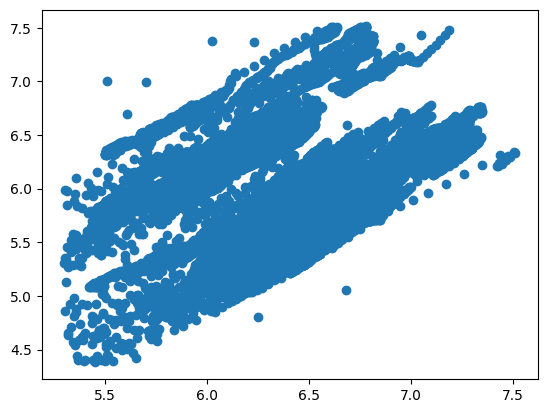

In [32]:
# observation of dt2 vs dt1
plt.scatter(fe.df["dt1"], fe.df["dt2"])

In [187]:
fe.df = fe.df[(fe.df.loc[:, "dt2"] > 4.5) & (fe.df.loc[:, "P2"] > 0.3)]
# fe11.df = fe11.df[(fe11.df.loc[:, "dt2"] > 4.5) & (fe11.df.loc[:, "P2"] > 0.3)]
# fe12.df = fe12.df[(fe12.df.loc[:, "dt2"] > 4.5) & (fe12.df.loc[:, "P2"] > 0.3)]

In [33]:
fe.columns_categorizing(
    columns=["CTF1", "CTF2", "CTF3"],
    value=50,
    i=1,
    e=0,
    operator="gt"
)

CTF1  CTF2  CTF3        P2        Q2      T1aHE  \
Timestamp                                                              
2020-10-12 23:00:00     0     0     0  0.403619  646.0100  36.846820   
2020-10-12 23:10:00     0     0     0  0.402855  646.4900  37.900775   
2020-10-12 23:20:00     0     0     0  0.402255  646.8425  38.859150   
2020-10-12 23:30:00     0     1     0  0.401680  646.9700  39.721037   
2020-10-12 23:40:00     0     1     0  0.401205  647.2200  40.456226   
...                   ...   ...   ...       ...       ...        ...   
2023-04-14 08:20:00     0     1     0  0.480000  653.3625  40.693871   
2023-04-14 08:30:00     0     1     0  0.480000  653.3200  40.617309   
2023-04-14 08:40:00     0     1     0  0.480000  653.2500  40.539244   
2023-04-14 08:50:00     0     1     0  0.480000  653.1425  40.459244   
2023-04-14 09:00:00     0     1     0  0.480000  653.1050  40.386098   

                         T1bHE      T2aHE     T2aHE1     T2aHE2  ...  \
Timestamp                                                        ...   
2020-10-12 23:00:00  42.165683  29.242241  29.770974  29.537056  ...   
2020-10-12 23:10:00  43.313046  30.164779  30.697474  30.451111  ...   
2020-10-12 23:20:00  44.372977  30.984493  31.524661  31.262837  ...   
2020-10-12 23:30:00  45.351364  31.676084  32.227899  31.947664  ...   
2020-10-12 23:40:00  46.209394  32.204798  32.776016  32.474811  ...   
...                        ...        ...        ...        ...  ...   
2023-04-14 08:20:00  47.013086  29.354231  29.247863  29.126280  ...   
2023-04-14 08:30:00  46.939538  29.261005  29.153992  29.032107  ...   
2023-04-14 08:40:00  46.865021  29.162880  29.055867  28.935057  ...   
2023-04-14 08:50:00  46.791796  29.063364  28.958379  28.837507  ...   
2023-04-14 09:00:00  46.721796  28.968848  28.865456  28.746176  ...   

                      Treactor         p21         p22         p23        p24  \
Timestamp                                                                       
2020-10-12 23:00:00  40.927372    0.882346  146.740750   87.252033  94.629622   
2020-10-12 23:10:00  42.005321    0.905374  146.641138   87.237471  94.592476   
2020-10-12 23:20:00  42.995834    0.865469  146.563890   87.290970  94.599077   
2020-10-12 23:30:00  43.901023    0.753975  146.478917   87.339171  94.598105   
2020-10-12 23:40:00  44.680124    0.753230  146.354262   87.364411  94.592608   
...                        ...         ...         ...         ...        ...   
2023-04-14 08:20:00  42.181408  143.836907  138.485194  139.700230   1.688534   
2023-04-14 08:30:00  42.109357  143.749941  138.392543  139.714897   1.902118   
2023-04-14 08:40:00  42.042921  143.704441  138.346457  139.719659   1.841627   
2023-04-14 08:50:00  41.984203  143.688264  138.327720  139.728124   1.961349   
2023-04-14 09:00:00  41.918406  143.691856  138.325682  139.734595   2.034873   

                     pumps2       dt1       dt2  dt_circuits_coef  \
Timestamp                                                           
2020-10-12 23:00:00     234  5.318863  5.273176          1.759171   
2020-10-12 23:10:00     234  5.412272  5.406276          1.749421   
2020-10-12 23:20:00     234  5.513827  5.544991          1.744255   
2020-10-12 23:30:00     234  5.630327  5.703317          1.746112   
2020-10-12 23:40:00     234  5.753167  5.879198          1.755303   
...                     ...       ...       ...               ...   
2023-04-14 08:20:00     123  6.319215  5.906856          2.005047   
2023-04-14 08:30:00     123  6.322229  5.909759          2.010151   
2023-04-14 08:40:00     123  6.325777  5.912279          2.015648   
2023-04-14 08:50:00     123  6.332552  5.915036          2.021390   
2023-04-14 09:00:00     123  6.335697  5.915358          2.026669   

                     dt_circuits_coef_delta  
Timestamp                                    
2020-10-12 23:00:00               18.196618  
2020-10-12 23:10:00               18.554544  
2020-10-12 

In [34]:
fe.columns_categorizing(
    columns=["p21", "p22", "p23", "p24"],
    value=40,
    i=0,
    e=None,
    operator="lt"
)

CTF1  CTF2  CTF3        P2        Q2      T1aHE  \
Timestamp                                                              
2020-10-12 23:00:00     0     0     0  0.403619  646.0100  36.846820   
2020-10-12 23:10:00     0     0     0  0.402855  646.4900  37.900775   
2020-10-12 23:20:00     0     0     0  0.402255  646.8425  38.859150   
2020-10-12 23:30:00     0     1     0  0.401680  646.9700  39.721037   
2020-10-12 23:40:00     0     1     0  0.401205  647.2200  40.456226   
...                   ...   ...   ...       ...       ...        ...   
2023-04-14 08:20:00     0     1     0  0.480000  653.3625  40.693871   
2023-04-14 08:30:00     0     1     0  0.480000  653.3200  40.617309   
2023-04-14 08:40:00     0     1     0  0.480000  653.2500  40.539244   
2023-04-14 08:50:00     0     1     0  0.480000  653.1425  40.459244   
2023-04-14 09:00:00     0     1     0  0.480000  653.1050  40.386098   

                         T1bHE      T2aHE     T2aHE1     T2aHE2  ...  \
Timestamp                                                        ...   
2020-10-12 23:00:00  42.165683  29.242241  29.770974  29.537056  ...   
2020-10-12 23:10:00  43.313046  30.164779  30.697474  30.451111  ...   
2020-10-12 23:20:00  44.372977  30.984493  31.524661  31.262837  ...   
2020-10-12 23:30:00  45.351364  31.676084  32.227899  31.947664  ...   
2020-10-12 23:40:00  46.209394  32.204798  32.776016  32.474811  ...   
...                        ...        ...        ...        ...  ...   
2023-04-14 08:20:00  47.013086  29.354231  29.247863  29.126280  ...   
2023-04-14 08:30:00  46.939538  29.261005  29.153992  29.032107  ...   
2023-04-14 08:40:00  46.865021  29.162880  29.055867  28.935057  ...   
2023-04-14 08:50:00  46.791796  29.063364  28.958379  28.837507  ...   
2023-04-14 09:00:00  46.721796  28.968848  28.865456  28.746176  ...   

                      Treactor         p21         p22         p23        p24  \
Timestamp                                                                       
2020-10-12 23:00:00  40.927372    0.000000  146.740750   87.252033  94.629622   
2020-10-12 23:10:00  42.005321    0.000000  146.641138   87.237471  94.592476   
2020-10-12 23:20:00  42.995834    0.000000  146.563890   87.290970  94.599077   
2020-10-12 23:30:00  43.901023    0.000000  146.478917   87.339171  94.598105   
2020-10-12 23:40:00  44.680124    0.000000  146.354262   87.364411  94.592608   
...                        ...         ...         ...         ...        ...   
2023-04-14 08:20:00  42.181408  143.836907  138.485194  139.700230   0.000000   
2023-04-14 08:30:00  42.109357  143.749941  138.392543  139.714897   0.000000   
2023-04-14 08:40:00  42.042921  143.704441  138.346457  139.719659   0.000000   
2023-04-14 08:50:00  41.984203  143.688264  138.327720  139.728124   0.000000   
2023-04-14 09:00:00  41.918406  143.691856  138.325682  139.734595   0.000000   

                     pumps2       dt1       dt2  dt_circuits_coef  \
Timestamp                                                           
2020-10-12 23:00:00     234  5.318863  5.273176          1.759171   
2020-10-12 23:10:00     234  5.412272  5.406276          1.749421   
2020-10-12 23:20:00     234  5.513827  5.544991          1.744255   
2020-10-12 23:30:00     234  5.630327  5.703317          1.746112   
2020-10-12 23:40:00     234  5.753167  5.879198          1.755303   
...                     ...       ...       ...               ...   
2023-04-14 08:20:00     123  6.319215  5.906856          2.005047   
2023-04-14 08:30:00     123  6.322229  5.909759          2.010151   
2023-04-14 08:40:00     123  6.325777  5.912279          2.015648   
2023-04-14 08:50:00     123  6.332552  5.915036          2.021390   
2023-04-14 09:00:00     123  6.335697  5.915358          2.026669   

                     dt_circuits_coef_delta  
Timestamp                                    
2020-10-12 23:00:00               18.196618  
2020-10-12 23:10:00               18.554544  
2020-10-12 

In [35]:
fe.df

CTF1  CTF2  CTF3        P2        Q2      T1aHE  \
Timestamp                                                              
2020-10-12 23:00:00     0     0     0  0.403619  646.0100  36.846820   
2020-10-12 23:10:00     0     0     0  0.402855  646.4900  37.900775   
2020-10-12 23:20:00     0     0     0  0.402255  646.8425  38.859150   
2020-10-12 23:30:00     0     1     0  0.401680  646.9700  39.721037   
2020-10-12 23:40:00     0     1     0  0.401205  647.2200  40.456226   
...                   ...   ...   ...       ...       ...        ...   
2023-04-14 08:20:00     0     1     0  0.480000  653.3625  40.693871   
2023-04-14 08:30:00     0     1     0  0.480000  653.3200  40.617309   
2023-04-14 08:40:00     0     1     0  0.480000  653.2500  40.539244   
2023-04-14 08:50:00     0     1     0  0.480000  653.1425  40.459244   
2023-04-14 09:00:00     0     1     0  0.480000  653.1050  40.386098   

                         T1bHE      T2aHE     T2aHE1     T2aHE2  ...  \
Timestamp                                                        ...   
2020-10-12 23:00:00  42.165683  29.242241  29.770974  29.537056  ...   
2020-10-12 23:10:00  43.313046  30.164779  30.697474  30.451111  ...   
2020-10-12 23:20:00  44.372977  30.984493  31.524661  31.262837  ...   
2020-10-12 23:30:00  45.351364  31.676084  32.227899  31.947664  ...   
2020-10-12 23:40:00  46.209394  32.204798  32.776016  32.474811  ...   
...                        ...        ...        ...        ...  ...   
2023-04-14 08:20:00  47.013086  29.354231  29.247863  29.126280  ...   
2023-04-14 08:30:00  46.939538  29.261005  29.153992  29.032107  ...   
2023-04-14 08:40:00  46.865021  29.162880  29.055867  28.935057  ...   
2023-04-14 08:50:00  46.791796  29.063364  28.958379  28.837507  ...   
2023-04-14 09:00:00  46.721796  28.968848  28.865456  28.746176  ...   

                      Treactor         p21         p22         p23        p24  \
Timestamp                                                                       
2020-10-12 23:00:00  40.927372    0.000000  146.740750   87.252033  94.629622   
2020-10-12 23:10:00  42.005321    0.000000  146.641138   87.237471  94.592476   
2020-10-12 23:20:00  42.995834    0.000000  146.563890   87.290970  94.599077   
2020-10-12 23:30:00  43.901023    0.000000  146.478917   87.339171  94.598105   
2020-10-12 23:40:00  44.680124    0.000000  146.354262   87.364411  94.592608   
...                        ...         ...         ...         ...        ...   
2023-04-14 08:20:00  42.181408  143.836907  138.485194  139.700230   0.000000   
2023-04-14 08:30:00  42.109357  143.749941  138.392543  139.714897   0.000000   
2023-04-14 08:40:00  42.042921  143.704441  138.346457  139.719659   0.000000   
2023-04-14 08:50:00  41.984203  143.688264  138.327720  139.728124   0.000000   
2023-04-14 09:00:00  41.918406  143.691856  138.325682  139.734595   0.000000   

                     pumps2       dt1       dt2  dt_circuits_coef  \
Timestamp                                                           
2020-10-12 23:00:00     234  5.318863  5.273176          1.759171   
2020-10-12 23:10:00     234  5.412272  5.406276          1.749421   
2020-10-12 23:20:00     234  5.513827  5.544991          1.744255   
2020-10-12 23:30:00     234  5.630327  5.703317          1.746112   
2020-10-12 23:40:00     234  5.753167  5.879198          1.755303   
...                     ...       ...       ...               ...   
2023-04-14 08:20:00     123  6.319215  5.906856          2.005047   
2023-04-14 08:30:00     123  6.322229  5.909759          2.010151   
2023-04-14 08:40:00     123  6.325777  5.912279          2.015648   
2023-04-14 08:50:00     123  6.332552  5.915036          2.021390   
2023-04-14 09:00:00     123  6.335697  5.915358          2.026669   

                     dt_circuits_coef_delta  
Timestamp                                    
2020-10-12 23:00:00               18.196618  
2020-10-12 23:10:00               18.554544  
2020-10-12 

In [36]:
# makes new feature from passed columns
# if omitbelow is given excludes column from averaging
fe.columns_averaging(columns=["p21", "p22", "p23", "p24"], omitbelow=100, feature_name="I2mean")
# fe11.columns_averaging(columns=["p21", "p22", "p23", "p24"], omitbelow=100, feature_name="I2mean")
# fe12.columns_averaging(columns=["p21", "p22", "p23", "p24"], omitbelow=80, feature_name="I2mean")

['p21', 'p22', 'p23', 'p24']


CTF1  CTF2  CTF3        P2        Q2      T1aHE  \
Timestamp                                                              
2020-10-12 23:00:00     0     0     0  0.403619  646.0100  36.846820   
2020-10-12 23:10:00     0     0     0  0.402855  646.4900  37.900775   
2020-10-12 23:20:00     0     0     0  0.402255  646.8425  38.859150   
2020-10-12 23:30:00     0     1     0  0.401680  646.9700  39.721037   
2020-10-12 23:40:00     0     1     0  0.401205  647.2200  40.456226   
...                   ...   ...   ...       ...       ...        ...   
2023-04-14 08:20:00     0     1     0  0.480000  653.3625  40.693871   
2023-04-14 08:30:00     0     1     0  0.480000  653.3200  40.617309   
2023-04-14 08:40:00     0     1     0  0.480000  653.2500  40.539244   
2023-04-14 08:50:00     0     1     0  0.480000  653.1425  40.459244   
2023-04-14 09:00:00     0     1     0  0.480000  653.1050  40.386098   

                         T1bHE      T2aHE     T2aHE1     T2aHE2  ...  \
Timestamp                                                        ...   
2020-10-12 23:00:00  42.165683  29.242241  29.770974  29.537056  ...   
2020-10-12 23:10:00  43.313046  30.164779  30.697474  30.451111  ...   
2020-10-12 23:20:00  44.372977  30.984493  31.524661  31.262837  ...   
2020-10-12 23:30:00  45.351364  31.676084  32.227899  31.947664  ...   
2020-10-12 23:40:00  46.209394  32.204798  32.776016  32.474811  ...   
...                        ...        ...        ...        ...  ...   
2023-04-14 08:20:00  47.013086  29.354231  29.247863  29.126280  ...   
2023-04-14 08:30:00  46.939538  29.261005  29.153992  29.032107  ...   
2023-04-14 08:40:00  46.865021  29.162880  29.055867  28.935057  ...   
2023-04-14 08:50:00  46.791796  29.063364  28.958379  28.837507  ...   
2023-04-14 09:00:00  46.721796  28.968848  28.865456  28.746176  ...   

                            p21         p22         p23        p24  pumps2  \
Timestamp                                                                    
2020-10-12 23:00:00    0.000000  146.740750   87.252033  94.629622     234   
2020-10-12 23:10:00    0.000000  146.641138   87.237471  94.592476     234   
2020-10-12 23:20:00    0.000000  146.563890   87.290970  94.599077     234   
2020-10-12 23:30:00    0.000000  146.478917   87.339171  94.598105     234   
2020-10-12 23:40:00    0.000000  146.354262   87.364411  94.592608     234   
...                         ...         ...         ...        ...     ...   
2023-04-14 08:20:00  143.836907  138.485194  139.700230   0.000000     123   
2023-04-14 08:30:00  143.749941  138.392543  139.714897   0.000000     123   
2023-04-14 08:40:00  143.704441  138.346457  139.719659   0.000000     123   
2023-04-14 08:50:00  143.688264  138.327720  139.728124   0.000000     123   
2023-04-14 09:00:00  143.691856  138.325682  139.734595   0.000000     123   

                          dt1       dt2  dt_circuits_coef  \
Timestamp                                                   
2020-10-12 23:00:00  5.318863  5.273176          1.759171   
2020-10-12 23:10:00  5.412272  5.406276          1.749421   
2020-10-12 23:20:00  5.513827  5.544991          1.744255   
2020-10-12 23:30:00  5.630327  5.703317          1.746112   
2020-10-12 23:40:00  5.753167  5.879198          1.755303   
...                       ...       ...               ...   
2023-04-14 08:20:00  6.319215  5.906856          2.005047   
2023-04-14 08:30:00  6.322229  5.909759          2.010151   
2023-04-14 08:40:00  6.325777  5.912279          2.015648   
2023-04-14 08:50:00  6.332552  5.915036          2.021390   
2023-04-14 09:00:00  6.335697  5.915358          2.026669   

                     dt_circuits_coef_delta      I2mean  
Timestamp                                                
2020-10-12 23:00:00               18.196618  146.740750  
2020-10-12 23:10:00               18.554544  146.641138  
2020-10-12 23:20:00               18.933474  146.563890  
2020-10-12 23:30:00               19.378596  146

In [37]:
fe.pumps_normalizer("Q2")
# fe11.pumps_normalizer("Q2")
# fe12.pumps_normalizer("Q2")

CTF1  CTF2  CTF3        P2        Q2      T1aHE  \
Timestamp                                                              
2020-10-12 23:00:00     0     0     0  0.403619  646.0100  36.846820   
2020-10-12 23:10:00     0     0     0  0.402855  646.4900  37.900775   
2020-10-12 23:20:00     0     0     0  0.402255  646.8425  38.859150   
2020-10-12 23:30:00     0     1     0  0.401680  646.9700  39.721037   
2020-10-12 23:40:00     0     1     0  0.401205  647.2200  40.456226   
...                   ...   ...   ...       ...       ...        ...   
2023-04-14 08:20:00     0     1     0  0.480000  653.3625  40.693871   
2023-04-14 08:30:00     0     1     0  0.480000  653.3200  40.617309   
2023-04-14 08:40:00     0     1     0  0.480000  653.2500  40.539244   
2023-04-14 08:50:00     0     1     0  0.480000  653.1425  40.459244   
2023-04-14 09:00:00     0     1     0  0.480000  653.1050  40.386098   

                         T1bHE      T2aHE     T2aHE1     T2aHE2  ...  \
Timestamp                                                        ...   
2020-10-12 23:00:00  42.165683  29.242241  29.770974  29.537056  ...   
2020-10-12 23:10:00  43.313046  30.164779  30.697474  30.451111  ...   
2020-10-12 23:20:00  44.372977  30.984493  31.524661  31.262837  ...   
2020-10-12 23:30:00  45.351364  31.676084  32.227899  31.947664  ...   
2020-10-12 23:40:00  46.209394  32.204798  32.776016  32.474811  ...   
...                        ...        ...        ...        ...  ...   
2023-04-14 08:20:00  47.013086  29.354231  29.247863  29.126280  ...   
2023-04-14 08:30:00  46.939538  29.261005  29.153992  29.032107  ...   
2023-04-14 08:40:00  46.865021  29.162880  29.055867  28.935057  ...   
2023-04-14 08:50:00  46.791796  29.063364  28.958379  28.837507  ...   
2023-04-14 09:00:00  46.721796  28.968848  28.865456  28.746176  ...   

                            p21         p22         p23        p24  pumps2  \
Timestamp                                                                    
2020-10-12 23:00:00    0.000000  146.740750   87.252033  94.629622     234   
2020-10-12 23:10:00    0.000000  146.641138   87.237471  94.592476     234   
2020-10-12 23:20:00    0.000000  146.563890   87.290970  94.599077     234   
2020-10-12 23:30:00    0.000000  146.478917   87.339171  94.598105     234   
2020-10-12 23:40:00    0.000000  146.354262   87.364411  94.592608     234   
...                         ...         ...         ...        ...     ...   
2023-04-14 08:20:00  143.836907  138.485194  139.700230   0.000000     123   
2023-04-14 08:30:00  143.749941  138.392543  139.714897   0.000000     123   
2023-04-14 08:40:00  143.704441  138.346457  139.719659   0.000000     123   
2023-04-14 08:50:00  143.688264  138.327720  139.728124   0.000000     123   
2023-04-14 09:00:00  143.691856  138.325682  139.734595   0.000000     123   

                          dt1       dt2  dt_circuits_coef  \
Timestamp                                                   
2020-10-12 23:00:00  5.318863  5.273176          1.759171   
2020-10-12 23:10:00  5.412272  5.406276          1.749421   
2020-10-12 23:20:00  5.513827  5.544991          1.744255   
2020-10-12 23:30:00  5.630327  5.703317          1.746112   
2020-10-12 23:40:00  5.753167  5.879198          1.755303   
...                       ...       ...               ...   
2023-04-14 08:20:00  6.319215  5.906856          2.005047   
2023-04-14 08:30:00  6.322229  5.909759          2.010151   
2023-04-14 08:40:00  6.325777  5.912279          2.015648   
2023-04-14 08:50:00  6.332552  5.915036          2.021390   
2023-04-14 09:00:00  6.335697  5.915358          2.026669   

                     dt_circuits_coef_delta      I2mean  
Timestamp                                                
2020-10-12 23:00:00               18.196618  146.740750  
2020-10-12 23:10:00               18.554544  146.641138  
2020-10-12 23:20:00               18.933474  146.563890  
2020-10-12 23:30:00               19.378596  146

In [38]:
fe.make_QbyIP()
# fe11.make_QbyIP()
# fe12.make_QbyIP()

CTF1  CTF2  CTF3        P2        Q2      T1aHE  \
Timestamp                                                              
2020-10-12 23:00:00     0     0     0  0.403619  646.0100  36.846820   
2020-10-12 23:10:00     0     0     0  0.402855  646.4900  37.900775   
2020-10-12 23:20:00     0     0     0  0.402255  646.8425  38.859150   
2020-10-12 23:30:00     0     1     0  0.401680  646.9700  39.721037   
2020-10-12 23:40:00     0     1     0  0.401205  647.2200  40.456226   
...                   ...   ...   ...       ...       ...        ...   
2023-04-14 08:20:00     0     1     0  0.480000  653.3625  40.693871   
2023-04-14 08:30:00     0     1     0  0.480000  653.3200  40.617309   
2023-04-14 08:40:00     0     1     0  0.480000  653.2500  40.539244   
2023-04-14 08:50:00     0     1     0  0.480000  653.1425  40.459244   
2023-04-14 09:00:00     0     1     0  0.480000  653.1050  40.386098   

                         T1bHE      T2aHE     T2aHE1     T2aHE2  ...  \
Timestamp                                                        ...   
2020-10-12 23:00:00  42.165683  29.242241  29.770974  29.537056  ...   
2020-10-12 23:10:00  43.313046  30.164779  30.697474  30.451111  ...   
2020-10-12 23:20:00  44.372977  30.984493  31.524661  31.262837  ...   
2020-10-12 23:30:00  45.351364  31.676084  32.227899  31.947664  ...   
2020-10-12 23:40:00  46.209394  32.204798  32.776016  32.474811  ...   
...                        ...        ...        ...        ...  ...   
2023-04-14 08:20:00  47.013086  29.354231  29.247863  29.126280  ...   
2023-04-14 08:30:00  46.939538  29.261005  29.153992  29.032107  ...   
2023-04-14 08:40:00  46.865021  29.162880  29.055867  28.935057  ...   
2023-04-14 08:50:00  46.791796  29.063364  28.958379  28.837507  ...   
2023-04-14 09:00:00  46.721796  28.968848  28.865456  28.746176  ...   

                            p22         p23        p24  pumps2       dt1  \
Timestamp                                                                  
2020-10-12 23:00:00  146.740750   87.252033  94.629622     234  5.318863   
2020-10-12 23:10:00  146.641138   87.237471  94.592476     234  5.412272   
2020-10-12 23:20:00  146.563890   87.290970  94.599077     234  5.513827   
2020-10-12 23:30:00  146.478917   87.339171  94.598105     234  5.630327   
2020-10-12 23:40:00  146.354262   87.364411  94.592608     234  5.753167   
...                         ...         ...        ...     ...       ...   
2023-04-14 08:20:00  138.485194  139.700230   0.000000     123  6.319215   
2023-04-14 08:30:00  138.392543  139.714897   0.000000     123  6.322229   
2023-04-14 08:40:00  138.346457  139.719659   0.000000     123  6.325777   
2023-04-14 08:50:00  138.327720  139.728124   0.000000     123  6.332552   
2023-04-14 09:00:00  138.325682  139.734595   0.000000     123  6.335697   

                          dt2  dt_circuits_coef  dt_circuits_coef_delta  \
Timestamp                                                                 
2020-10-12 23:00:00  5.273176          1.759171               18.196618   
2020-10-12 23:10:00  5.406276          1.749421               18.554544   
2020-10-12 23:20:00  5.544991          1.744255               18.933474   
2020-10-12 23:30:00  5.703317          1.746112               19.378596   
2020-10-12 23:40:00  5.879198          1.755303               19.883793   
...                       ...               ...                     ...   
2023-04-14 08:20:00  5.906856          2.005047               23.565711   
2023-04-14 08:30:00  5.909759          2.010151               23.588292   
2023-04-14 08:40:00  5.912279          2.015648               23.614420   
2023-04-14 08:50:00  5.915036          2.021390               23.643467   
2023-04-14 09:00:00  5.915358          2.026669               23.668306   

                         I2mean      QbyIP  
Timestamp                                   
2020-10-12 23:00:00  146.740750  10.907304  
2020-10-12 23:10:00  146.641138  10.943515  
20

In [39]:
fe.make_dts_on_HEs()
# fe11.make_dts_on_HEs()
# fe12.make_dts_on_HEs()

CTF1  CTF2  CTF3        P2        Q2      T1aHE  \
Timestamp                                                              
2020-10-12 23:00:00     0     0     0  0.403619  646.0100  36.846820   
2020-10-12 23:10:00     0     0     0  0.402855  646.4900  37.900775   
2020-10-12 23:20:00     0     0     0  0.402255  646.8425  38.859150   
2020-10-12 23:30:00     0     1     0  0.401680  646.9700  39.721037   
2020-10-12 23:40:00     0     1     0  0.401205  647.2200  40.456226   
...                   ...   ...   ...       ...       ...        ...   
2023-04-14 08:20:00     0     1     0  0.480000  653.3625  40.693871   
2023-04-14 08:30:00     0     1     0  0.480000  653.3200  40.617309   
2023-04-14 08:40:00     0     1     0  0.480000  653.2500  40.539244   
2023-04-14 08:50:00     0     1     0  0.480000  653.1425  40.459244   
2023-04-14 09:00:00     0     1     0  0.480000  653.1050  40.386098   

                         T1bHE      T2aHE    T2aHE1    T2aHE2  ...  \
Timestamp                                                      ...   
2020-10-12 23:00:00  42.165683  29.242241  0.318845  0.305990  ...   
2020-10-12 23:10:00  43.313046  30.164779  0.320082  0.306804  ...   
2020-10-12 23:20:00  44.372977  30.984493  0.321397  0.307568  ...   
2020-10-12 23:30:00  45.351364  31.676084  0.322786  0.308325  ...   
2020-10-12 23:40:00  46.209394  32.204798  0.324406  0.309257  ...   
...                        ...        ...       ...       ...  ...   
2023-04-14 08:20:00  47.013086  29.354231  0.246141  0.240982  ...   
2023-04-14 08:30:00  46.939538  29.261005  0.246001  0.240834  ...   
2023-04-14 08:40:00  46.865021  29.162880  0.245836  0.240720  ...   
2023-04-14 08:50:00  46.791796  29.063364  0.245736  0.240624  ...   
2023-04-14 09:00:00  46.721796  28.968848  0.245559  0.240519  ...   

                            p22         p23        p24  pumps2       dt1  \
Timestamp                                                                  
2020-10-12 23:00:00  146.740750   87.252033  94.629622     234  5.318863   
2020-10-12 23:10:00  146.641138   87.237471  94.592476     234  5.412272   
2020-10-12 23:20:00  146.563890   87.290970  94.599077     234  5.513827   
2020-10-12 23:30:00  146.478917   87.339171  94.598105     234  5.630327   
2020-10-12 23:40:00  146.354262   87.364411  94.592608     234  5.753167   
...                         ...         ...        ...     ...       ...   
2023-04-14 08:20:00  138.485194  139.700230   0.000000     123  6.319215   
2023-04-14 08:30:00  138.392543  139.714897   0.000000     123  6.322229   
2023-04-14 08:40:00  138.346457  139.719659   0.000000     123  6.325777   
2023-04-14 08:50:00  138.327720  139.728124   0.000000     123  6.332552   
2023-04-14 09:00:00  138.325682  139.734595   0.000000     123  6.335697   

                          dt2  dt_circuits_coef  dt_circuits_coef_delta  \
Timestamp                                                                 
2020-10-12 23:00:00  5.273176          1.759171               18.196618   
2020-10-12 23:10:00  5.406276          1.749421               18.554544   
2020-10-12 23:20:00  5.544991          1.744255               18.933474   
2020-10-12 23:30:00  5.703317          1.746112               19.378596   
2020-10-12 23:40:00  5.879198          1.755303               19.883793   
...                       ...               ...                     ...   
2023-04-14 08:20:00  5.906856          2.005047               23.565711   
2023-04-14 08:30:00  5.909759          2.010151               23.588292   
2023-04-14 08:40:00  5.912279          2.015648               23.614420   
2023-04-14 08:50:00  5.915036          2.021390               23.643467   
2023-04-14 09:00:00  5.915358          2.026669               23.668306   

                         I2mean      QbyIP  
Timestamp                                   
2020-10-12 23:00:00  146.740750  10.907304  
2020-10-12 23:10:00  146.641138  10.943515  
2020-10-12 23:20:00  146.563

Text(0, 0.5, 'QbyIP')

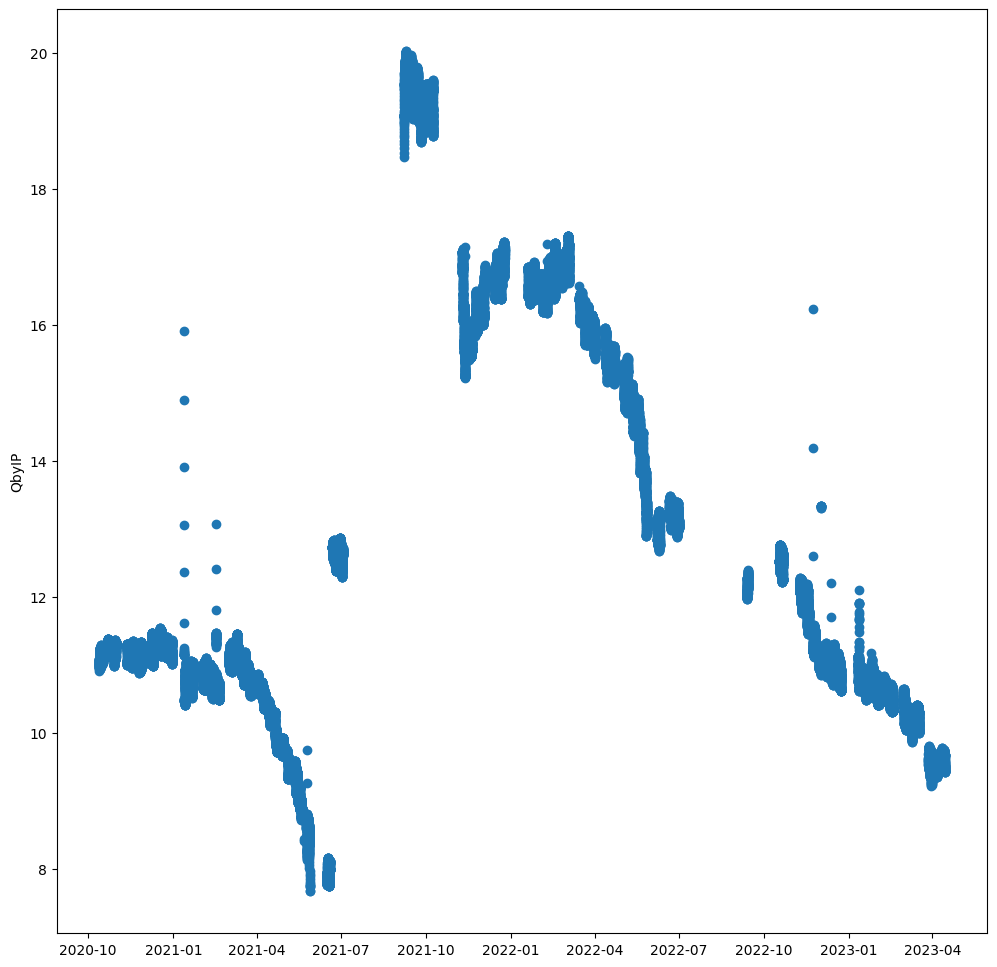

In [40]:
# fitst week on plot refers to fuel cycle #125
# There are no normalizations on 
# dt between hot water of 1st circuit
#* and cold water of 2nd circuit
plt.figure(figsize=(12,12))
# plt.scatter(fe12.df.index, fe12.df["QbyIP"])
# plt.scatter(fe11.df.index, fe11.df["QbyIP"])
plt.scatter(fe.df.index, fe.df["QbyIP"])
plt.ylabel("QbyIP")


In [41]:

fe.make_heat_dissipation(feature_name="Ndis_def", dt_norm=False)
fe.make_heat_dissipation(feature_name="Ndis")
fe.make_heat_dissipation(feature_name="Ndis_by_delta", dt_norm=False)
# fe11.make_heat_dissipation()
# fe12.make_heat_dissipation()

CTF1  CTF2  CTF3        P2        Q2      T1aHE  \
Timestamp                                                              
2020-10-12 23:00:00     0     0     0  0.403619  646.0100  36.846820   
2020-10-12 23:10:00     0     0     0  0.402855  646.4900  37.900775   
2020-10-12 23:20:00     0     0     0  0.402255  646.8425  38.859150   
2020-10-12 23:30:00     0     1     0  0.401680  646.9700  39.721037   
2020-10-12 23:40:00     0     1     0  0.401205  647.2200  40.456226   
...                   ...   ...   ...       ...       ...        ...   
2023-04-14 08:20:00     0     1     0  0.480000  653.3625  40.693871   
2023-04-14 08:30:00     0     1     0  0.480000  653.3200  40.617309   
2023-04-14 08:40:00     0     1     0  0.480000  653.2500  40.539244   
2023-04-14 08:50:00     0     1     0  0.480000  653.1425  40.459244   
2023-04-14 09:00:00     0     1     0  0.480000  653.1050  40.386098   

                         T1bHE      T2aHE    T2aHE1    T2aHE2  ...  pumps2  \
Timestamp                                                      ...           
2020-10-12 23:00:00  42.165683  29.242241  0.318845  0.305990  ...     234   
2020-10-12 23:10:00  43.313046  30.164779  0.320082  0.306804  ...     234   
2020-10-12 23:20:00  44.372977  30.984493  0.321397  0.307568  ...     234   
2020-10-12 23:30:00  45.351364  31.676084  0.322786  0.308325  ...     234   
2020-10-12 23:40:00  46.209394  32.204798  0.324406  0.309257  ...     234   
...                        ...        ...       ...       ...  ...     ...   
2023-04-14 08:20:00  47.013086  29.354231  0.246141  0.240982  ...     123   
2023-04-14 08:30:00  46.939538  29.261005  0.246001  0.240834  ...     123   
2023-04-14 08:40:00  46.865021  29.162880  0.245836  0.240720  ...     123   
2023-04-14 08:50:00  46.791796  29.063364  0.245736  0.240624  ...     123   
2023-04-14 09:00:00  46.721796  28.968848  0.245559  0.240519  ...     123   

                          dt1       dt2  dt_circuits_coef  \
Timestamp                                                   
2020-10-12 23:00:00  5.318863  5.273176          1.759171   
2020-10-12 23:10:00  5.412272  5.406276          1.749421   
2020-10-12 23:20:00  5.513827  5.544991          1.744255   
2020-10-12 23:30:00  5.630327  5.703317          1.746112   
2020-10-12 23:40:00  5.753167  5.879198          1.755303   
...                       ...       ...               ...   
2023-04-14 08:20:00  6.319215  5.906856          2.005047   
2023-04-14 08:30:00  6.322229  5.909759          2.010151   
2023-04-14 08:40:00  6.325777  5.912279          2.015648   
2023-04-14 08:50:00  6.332552  5.915036          2.021390   
2023-04-14 09:00:00  6.335697  5.915358          2.026669   

                     dt_circuits_coef_delta      I2mean      QbyIP   Ndis_def  \
Timestamp                                                                       
2020-10-12 23:00:00               18.196618  146.740750  10.907304  57.516135   
2020-10-12 23:10:00               18.554544  146.641138  10.943515  59.163668   
2020-10-12 23:20:00               18.933474  146.563890  10.971594  60.837385   
2020-10-12 23:30:00               19.378596  146.478917  10.995840  62.712760   
2020-10-12 23:40:00               19.883793  146.354262  11.022493  64.803415   
...                                     ...         ...        ...        ...   
2023-04-14 08:20:00               23.565711  140.674110   9.676066  57.155125   
2023-04-14 08:30:00               23.588292  140.619127   9.679219  57.201854   
2023-04-14 08:40:00               23.614420  140.590186   9.680175  57.231893   
2023-04-14 08:50:00               23.643467  140.581370   9.679188  57.252745   
2023-04-14 09:00:00               23.668306  140.584044   9.678449  57.251491   

                          Ndis  Ndis_by_delta  
Timestamp                                      
2020-10-12 23:00:00  32.695023      57.516135  
2020-10-12 23:10:00  33.818998      59.163668  
2020-10-12 23:20:00  34.87872

In [42]:
fe.df["Ndis_by_delta"] = fe.df["Ndis_by_delta"] / fe.df["dt_circuits_coef_delta"] 

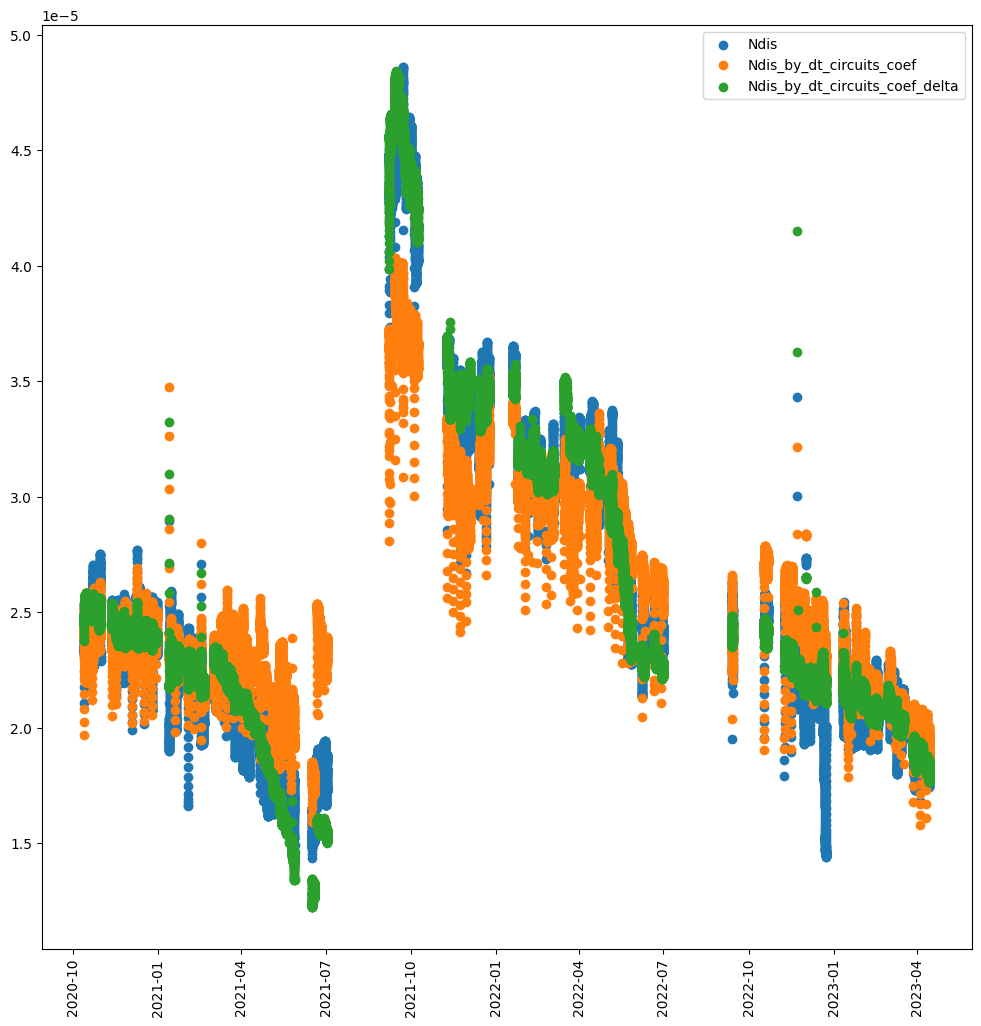

In [43]:
plt.figure(figsize=(12,12))
# plt.scatter(fe12.df.index, fe12.df["Ndis"])
# plt.scatter(fe11.df.index, fe11.df["Ndis"])
plt.scatter(
    fe.df.index, 
    fe.df["Ndis"]/fe.df["Ndis"].sum(),
    label="Ndis"
)
plt.scatter(
    fe.df.index, 
    fe.df["Ndis_def"]/fe.df["Ndis_def"].sum(),
    label="Ndis_by_dt_circuits_coef"
)
plt.scatter(
    fe.df.index, 
    fe.df["Ndis_by_delta"]/fe.df["Ndis_by_delta"].sum(),
    label="Ndis_by_dt_circuits_coef_delta"
)
plt.xticks(rotation=90)
plt.legend()

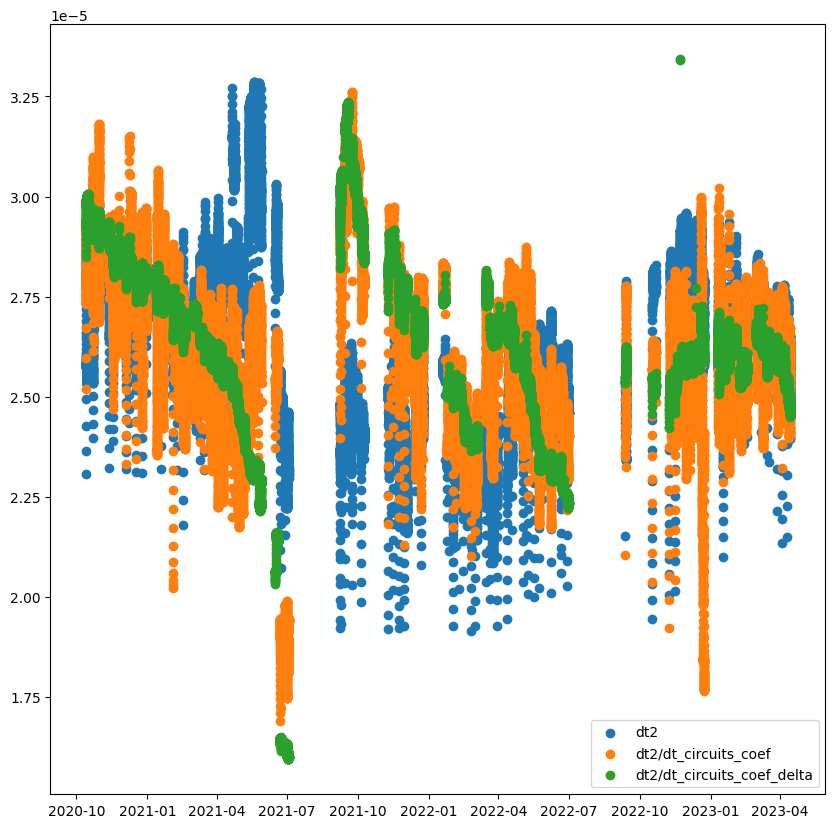

In [45]:
# damn, normalizing by delta coefficient makes it so smooth

plt.figure(figsize=(10,10))
plt.scatter(
    fe.df.index, 
    fe.df["dt2"]/fe.df["dt2"].sum(),
    label="dt2"
)

dt_norm = fe.df["dt2"]/fe.df["dt_circuits_coef"]

plt.scatter(
    fe.df.index, 
    dt_norm/dt_norm.sum(),
    label="dt2/dt_circuits_coef"
)

dt_norm2 = fe.df["dt2"]/fe.df["dt_circuits_coef_delta"]

plt.scatter(
    fe.df.index, 
    dt_norm2/dt_norm2.sum(),
    label="dt2/dt_circuits_coef_delta"
)


plt.legend()

# The data above are in range of 14.10.2020-14.04.2023
## Annually few or all HE's were under fouling remove services to increase cooling system efficiency
## Reactor onpower dates are
### [ (2019-08-22, 2020-06-29), (2020-10-12, 2021-07-02), (2021-09-06, 2022-07-01), (2022-09-05, 2023-04-14) ]
## The dates of HE's onpower cycles are
### HE1 [ ( 2019-08-22, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ), ( 2022-09-05, 2023-04-14 ) ]
### HE2 [ ( 2019-08-22, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ), ( 2022-09-05, 2023-04-14 ) ]
### HE3 [ ( 2020-10-12, 2021-06-01 ), ( 2022-03-14, 2023-04-14 ) ]
### HE4 [ ( 2019-10-14, 2021-06-01 ), ( 2021-06-21, 2022-03-14 ), (2022-09-05, 2023-04-14) ]
### HE5 [ ( 2020-06-08, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ) ]

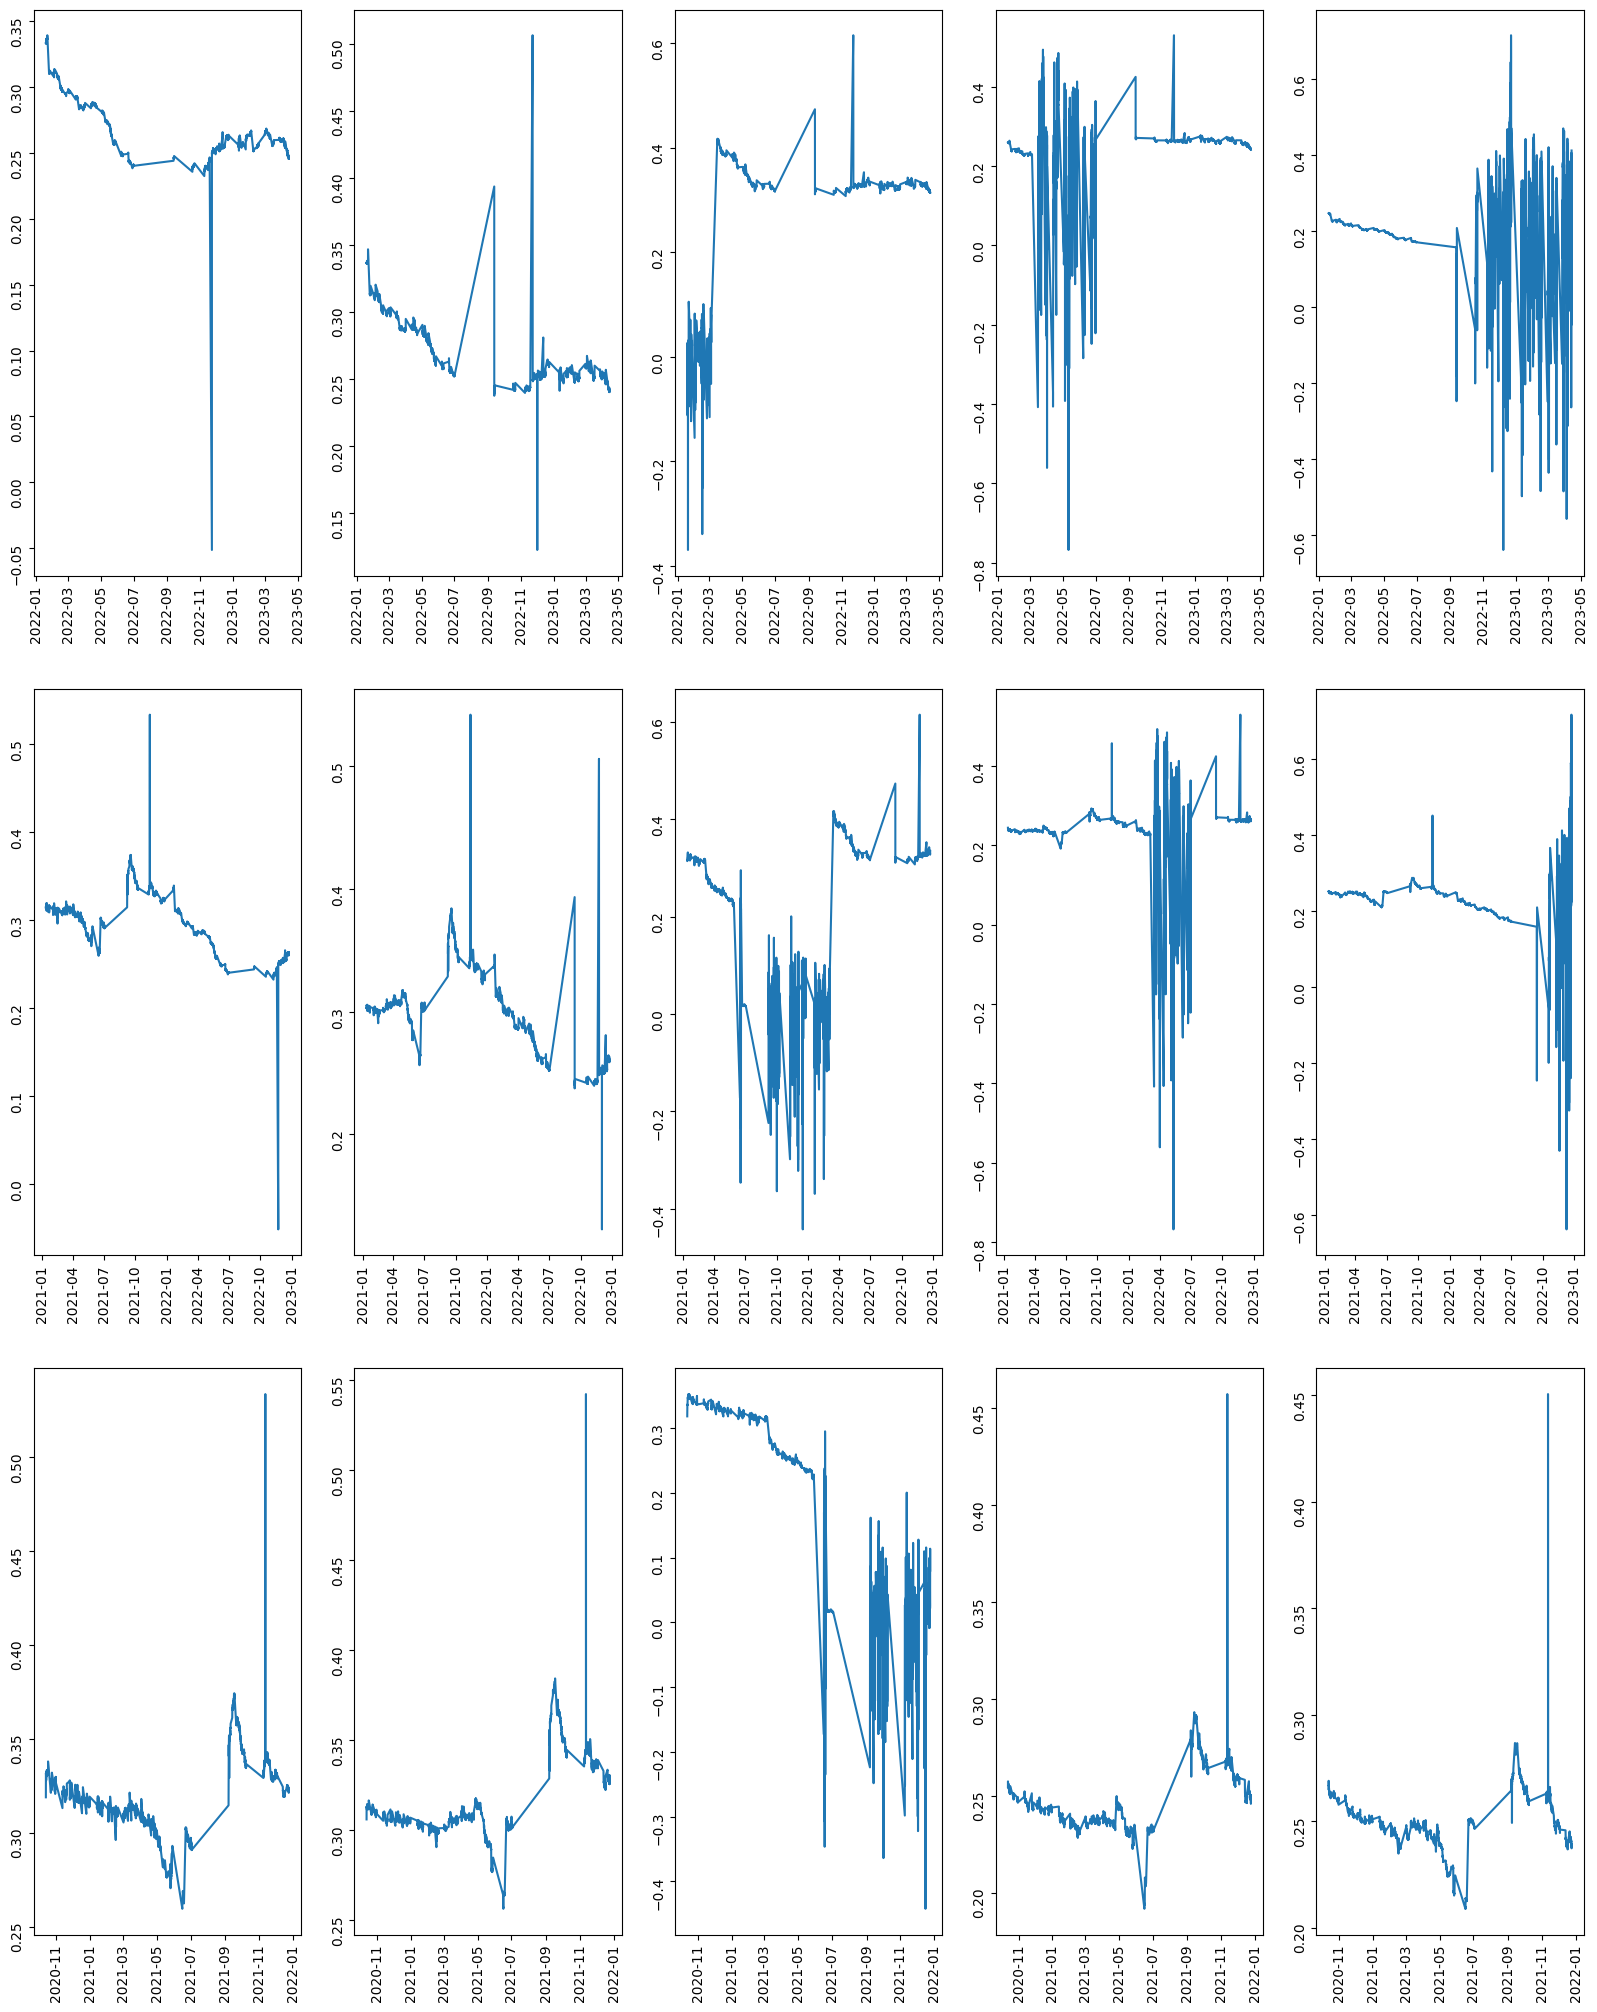

In [46]:
fig, axs = plt.subplots(3,5, figsize=(20,25))

axs[0][0].plot(fe.df.loc["2022":"2023", "T2aHE1"])
axs[0][1].plot(fe.df.loc["2022":"2023", "T2aHE2"])
axs[0][2].plot(fe.df.loc["2022":"2023", "T2aHE3"])
axs[0][3].plot(fe.df.loc["2022":"2023", "T2aHE4"])
axs[0][4].plot(fe.df.loc["2022":"2023", "T2aHE5"])

axs[1][0].plot(fe.df.loc["2021":"2022", "T2aHE1"])
axs[1][1].plot(fe.df.loc["2021":"2022", "T2aHE2"])
axs[1][2].plot(fe.df.loc["2021":"2022", "T2aHE3"])
axs[1][3].plot(fe.df.loc["2021":"2022", "T2aHE4"])
axs[1][4].plot(fe.df.loc["2021":"2022", "T2aHE5"])

axs[2][0].plot(fe.df.loc["2020":"2021", "T2aHE1"])
axs[2][1].plot(fe.df.loc["2020":"2021", "T2aHE2"])
axs[2][2].plot(fe.df.loc["2020":"2021", "T2aHE3"])
axs[2][3].plot(fe.df.loc["2020":"2021", "T2aHE4"])
axs[2][4].plot(fe.df.loc["2020":"2021", "T2aHE5"])

for i in range(3):
    for j in range(5):
        axs[i][j].tick_params(rotation=90)

In [47]:

he1 = [("2019-08-22", "2021-07-02"), ("2021-09-06", "2022-07-01"), ("2022-09-05", "2023-04-14")]
he2 = [("2019-08-22", "2021-07-02"), ("2021-09-06", "2022-07-01"), ("2022-09-05", "2023-04-14")]
he3 = [("2020-10-12", "2021-06-01"), ("2022-03-14", "2023-04-14")]
he4 = [("2019-10-14", "2021-06-01"), ("2021-06-21", "2022-03-14" ), ("2022-09-05", "2023-04-14")]
he5 = [("2020-06-08", "2021-07-02"), ("2021-09-06", "2022-07-01")]

# there is a bug when start argument is higher than 1000
fe.make_time_onpower_feature(time_periods=he1, feature_name="HE1_TOP")
fe.df.loc["2019-08-22": "2021-07-02", "HE1_TOP"] = fe.df.loc["2019-08-22": "2021-07-02"]+ 2915

fe.make_time_onpower_feature(time_periods=he2, feature_name="HE2_TOP")
fe.df.loc["2019-08-22": "2021-07-02", "HE2_TOP"] = fe.df.loc["2019-08-22": "2021-07-02"]+ 2915

fe.make_time_onpower_feature(time_periods=he3, feature_name="HE3_TOP")


fe.make_time_onpower_feature(time_periods=he4, feature_name="HE4_TOP")

fe.make_time_onpower_feature(time_periods=he5, feature_name="HE5_TOP")


CTF1  CTF2  CTF3        P2        Q2      T1aHE  \
Timestamp                                                              
2020-10-12 23:00:00     0     0     0  0.403619  646.0100  36.846820   
2020-10-12 23:10:00     0     0     0  0.402855  646.4900  37.900775   
2020-10-12 23:20:00     0     0     0  0.402255  646.8425  38.859150   
2020-10-12 23:30:00     0     1     0  0.401680  646.9700  39.721037   
2020-10-12 23:40:00     0     1     0  0.401205  647.2200  40.456226   
...                   ...   ...   ...       ...       ...        ...   
2023-04-14 08:20:00     0     1     0  0.480000  653.3625  40.693871   
2023-04-14 08:30:00     0     1     0  0.480000  653.3200  40.617309   
2023-04-14 08:40:00     0     1     0  0.480000  653.2500  40.539244   
2023-04-14 08:50:00     0     1     0  0.480000  653.1425  40.459244   
2023-04-14 09:00:00     0     1     0  0.480000  653.1050  40.386098   

                         T1bHE      T2aHE    T2aHE1    T2aHE2  ...  \
Timestamp                                                      ...   
2020-10-12 23:00:00  42.165683  29.242241  0.318845  0.305990  ...   
2020-10-12 23:10:00  43.313046  30.164779  0.320082  0.306804  ...   
2020-10-12 23:20:00  44.372977  30.984493  0.321397  0.307568  ...   
2020-10-12 23:30:00  45.351364  31.676084  0.322786  0.308325  ...   
2020-10-12 23:40:00  46.209394  32.204798  0.324406  0.309257  ...   
...                        ...        ...       ...       ...  ...   
2023-04-14 08:20:00  47.013086  29.354231  0.246141  0.240982  ...   
2023-04-14 08:30:00  46.939538  29.261005  0.246001  0.240834  ...   
2023-04-14 08:40:00  46.865021  29.162880  0.245836  0.240720  ...   
2023-04-14 08:50:00  46.791796  29.063364  0.245736  0.240624  ...   
2023-04-14 09:00:00  46.721796  28.968848  0.245559  0.240519  ...   

                         I2mean      QbyIP   Ndis_def       Ndis  \
Timestamp                                                          
2020-10-12 23:00:00  146.740750  10.907304  57.516135  32.695023   
2020-10-12 23:10:00  146.641138  10.943515  59.163668  33.818998   
2020-10-12 23:20:00  146.563890  10.971594  60.837385  34.878724   
2020-10-12 23:30:00  146.478917  10.995840  62.712760  35.915655   
2020-10-12 23:40:00  146.354262  11.022493  64.803415  36.918658   
...                         ...        ...        ...        ...   
2023-04-14 08:20:00  140.674110   9.676066  57.155125  28.505630   
2023-04-14 08:30:00  140.619127   9.679219  57.201854  28.456492   
2023-04-14 08:40:00  140.590186   9.680175  57.231893  28.393797   
2023-04-14 08:50:00  140.581370   9.679188  57.252745  28.323455   
2023-04-14 09:00:00  140.584044   9.678449  57.251491  28.249056   

                     Ndis_by_delta      HE1_TOP      HE2_TOP      HE3_TOP  \
Timestamp                                                                   
2020-10-12 23:00:00       3.160815  2915.453193  2915.453193     0.443976   
2020-10-12 23:10:00       3.188635  2915.906386  2915.906386     0.887951   
2020-10-12 23:20:00       3.213218  2916.359579  2916.359579     1.331927   
2020-10-12 23:30:00       3.236187  2916.812772  2916.812772     1.775902   
2020-10-12 23:40:00       3.259107  2917.265965  2917.265965     2.219878   
...                            ...          ...          ...          ...   
2023-04-14 08:20:00       2.425351  5125.429709  5125.429709  9471.347089   
2023-04-14 08:30:00       2.425010  5125.988948  5125.988948  9471.968650   
2023-04-14 08:40:00       2.423599  5126.548188  5126.548188  9472.590211   
2023-04-14 08:50:00       2.421504  5127.107427  5127.107427  9473.211772   
2023-04-14 09:00:00       2.418909  5127.666667  5127.666667  9473.833333   

                         HE4_TOP   HE5_TOP  
Timestamp                                   
2020-10-12 23:00:00     0.443976  0.453193  
2020-10-12 23:10:00     0.887951  0.906386  
2020-10-12 23:20:00     1.331927  1.359579  
2020-10-12 23:30:00     1.775902  1.812772  
2020-10-12 23:40

In [48]:
# Important step must be added to package/module

fe.df["HE1_status"] = np.zeros(len(fe.df))
fe.df["HE2_status"] = np.zeros(len(fe.df))
fe.df["HE3_status"] = np.zeros(len(fe.df))
fe.df["HE4_status"] = np.zeros(len(fe.df))
fe.df["HE5_status"] = np.zeros(len(fe.df))

fe.df.loc[:, "HE1_status"][fe.df.loc[:, "HE1_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE1"][fe.df.loc[:, "HE1_TOP"] == 0] = 0

fe.df.loc[:, "HE2_status"][fe.df.loc[:, "HE2_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE2"][fe.df.loc[:, "HE2_TOP"] == 0] = 0

fe.df.loc[:, "HE3_status"][fe.df.loc[:, "HE3_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE3"][fe.df.loc[:, "HE3_TOP"] == 0] = 0

fe.df.loc[:, "HE4_status"][fe.df.loc[:, "HE4_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE4"][fe.df.loc[:, "HE4_TOP"] == 0] = 0

fe.df.loc[:, "HE5_status"][fe.df.loc[:, "HE5_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE5"][fe.df.loc[:, "HE5_TOP"] == 0] = 0


/tmp/ipykernel_2883/2441187994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "HE1_status"][fe.df.loc[:, "HE1_TOP"] != 0] = 1
/tmp/ipykernel_2883/2441187994.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "T2aHE1"][fe.df.loc[:, "HE1_TOP"] == 0] = 0
/tmp/ipykernel_2883/2441187994.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "HE2_status"][fe.df.loc[:, "HE2_TOP"] != 0] = 1
/tmp/ipyk

In [49]:
fe.df.loc[:, ["T2aHE5", "HE5_status"]]

T2aHE5  HE5_status
Timestamp                                
2020-10-12 23:00:00  0.264988         1.0
2020-10-12 23:10:00  0.265687         1.0
2020-10-12 23:20:00  0.266304         1.0
2020-10-12 23:30:00  0.266851         1.0
2020-10-12 23:40:00  0.267412         1.0
...                       ...         ...
2023-04-14 08:20:00  0.000000         0.0
2023-04-14 08:30:00  0.000000         0.0
2023-04-14 08:40:00  0.000000         0.0
2023-04-14 08:50:00  0.000000         0.0
2023-04-14 09:00:00  0.000000         0.0

[38348 rows x 2 columns]

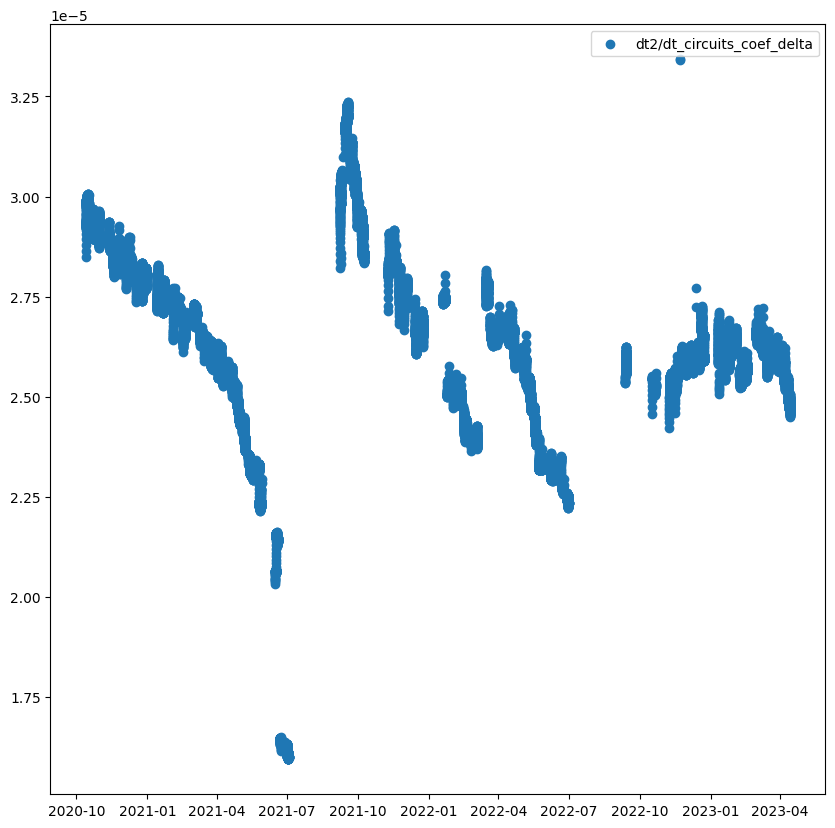

In [50]:
# damn, normalizing by delta coefficient makes it so smooth

plt.figure(figsize=(10,10))

dt_norm2 = fe.df["dt2"]/fe.df["dt_circuits_coef_delta"]

plt.scatter(
    fe.df.index, 
    dt_norm2/dt_norm2.sum(),
    label="dt2/dt_circuits_coef_delta"
)


plt.legend()

# dt2 data is skewed on 2021-07 because of HE3. Back than HE3 was not under operation but second loop valve was opened for a long time. 
# As a result cold water went through HE and cooled up the rest of water

# Correct data for dt2 may be obtained by averaging HEs data
# The plots below show t

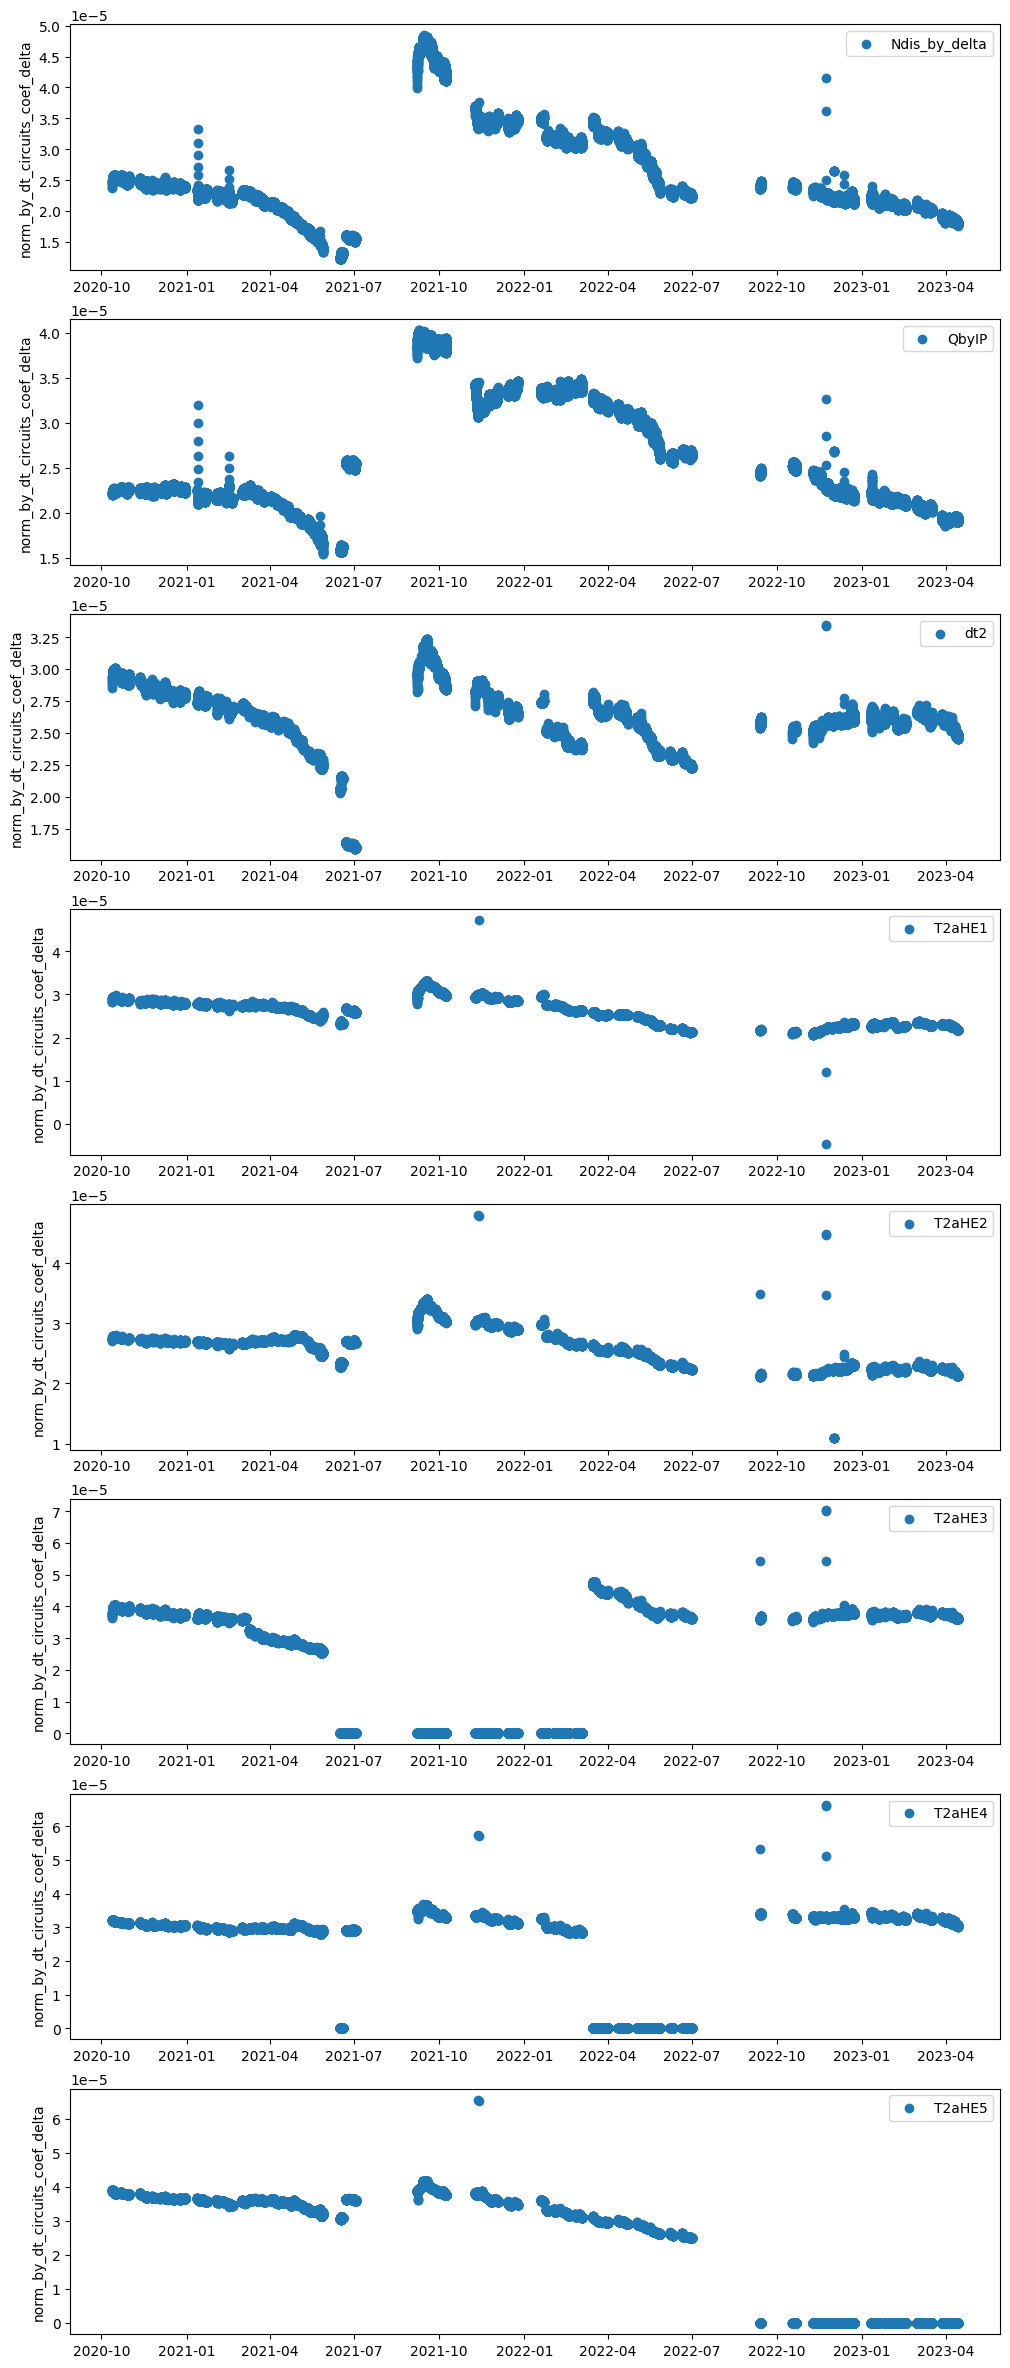

In [51]:

# plt.figure(figsize=(8,8))
itr = ["Ndis_by_delta", "QbyIP", "dt2", "T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]

fig, axs = plt.subplots(len(itr),1, figsize=(12,30))

for i in range(len(itr)):
    
    if itr[i] == "dt2":
        axs[i].scatter(fe.df.index,
                       (fe.df[itr[i]]/fe.df["dt_circuits_coef_delta"])
                       /(fe.df[itr[i]]/fe.df["dt_circuits_coef_delta"]).sum(),
                       label=itr[i])
    else:
        axs[i].scatter(fe.df.index, fe.df[itr[i]]/fe.df[itr[i]].sum(), label=itr[i])
    axs[i].set_ylabel("norm_by_dt_circuits_coef_delta")
    axs[i].legend()


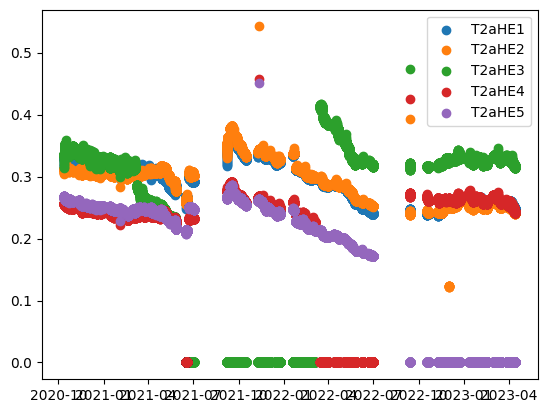

In [206]:
itr = ["T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]

# fig, axs = plt.subplots(len(itr),1, figsize=(12,30))

for i in range(len(itr)):
    plt.scatter(fe.df.index, fe.df[itr[i]], label=itr[i])
    
    plt.legend()

In [237]:
fe.df["dt2_by_HEs"] = fe.df.loc[:, ["T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]][
    fe.df.loc[:, ["T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]] > 0].mean(axis=1)

/tmp/ipykernel_32456/2895436024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df["dt2_by_HEs"] = fe.df.loc[:, ["T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]][


Text(0, 0.5, 'dt2/dt_circuit_coef_delta/number_of_HEs, rel.u')

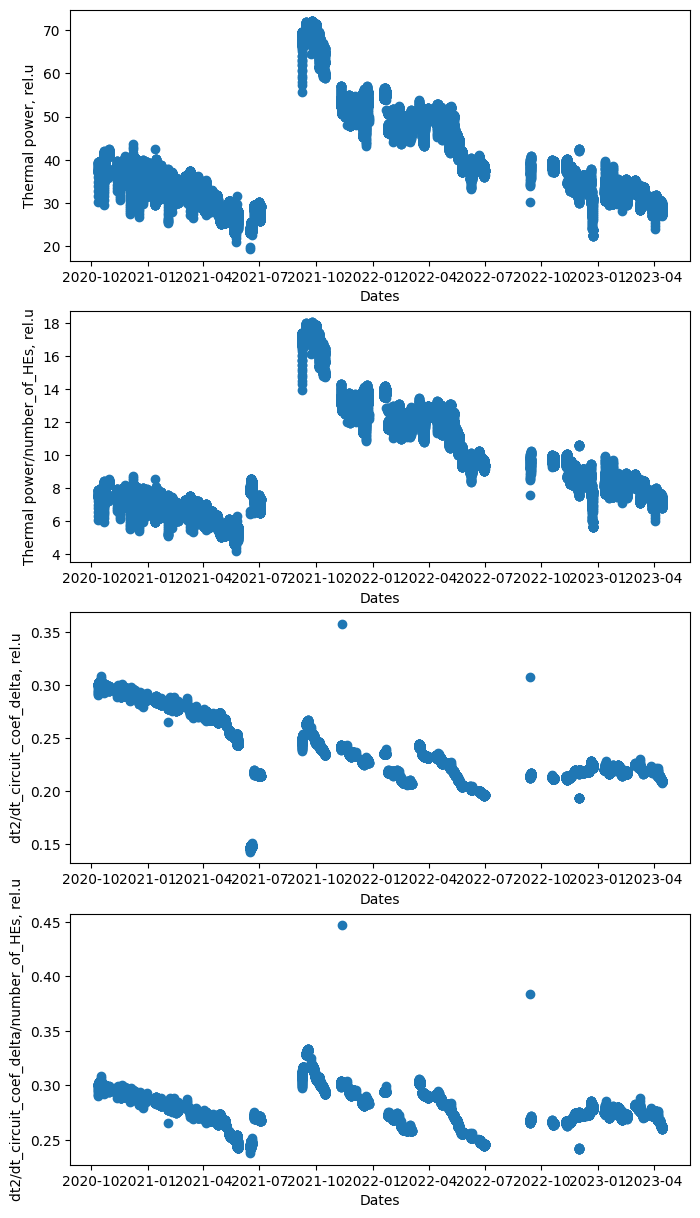

In [238]:
fig, axs = plt.subplots(4,1, figsize=(8,15))



axs[0].scatter(fe.df.index, fe.df["Ndis"])
axs[0].set_xlabel("Dates")
axs[0].set_ylabel("Thermal power, rel.u")

axs[1].scatter(
    fe.df.index, 
    fe.df["Ndis"]
    / fe.df.loc[
       :, ["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]
    ].sum(axis=1)
)
axs[1].set_xlabel("Dates")
axs[1].set_ylabel("Thermal power/number_of_HEs, rel.u")


axs[2].scatter(
    fe.df.index, 
    fe.df.loc[
       :, 
       ["T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]
    ].mean(axis=1)
)
axs[2].set_xlabel("Dates")
axs[2].set_ylabel("dt2/dt_circuit_coef_delta, rel.u")

axs[3].scatter(
    fe.df.index, 
    fe.df.loc[
       :, ["T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"]
    ].sum(axis=1)\
    / fe.df.loc[
       :, ["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]
    ].sum(axis=1)
)
# the dt almost the same if we take into account df_circuit_coef and number of HE under operation
# meanwhile, the number of HEs makes sense and huge difference on dt
axs[3].set_xlabel("Dates")
axs[3].set_ylabel("dt2/dt_circuit_coef_delta/number_of_HEs, rel.u")


In [239]:
# lets define coef of fouiling
# 1 - "2020-10-12","2020-10-16"
# 2 - "2021-09-06","2022-06-28"
# 3 - "2022-09-12","2022-09-13"
first = ("2020-10-12","2020-10-16")
second = ("2021-09-06","2021-09-10")
third = ("2022-09-12","2022-09-13")

first_cycle = ("2020-10-12", "2021-07-02")
second_cycle = ("2021-09-06", "2022-06-28")
third_cycle = ("2022-09-12", "2023-04-14")

# so there are 3 cycles -> 3 starting points for fouling assessment
ff1_0 = fe.df.loc[first[0]: first[1], "Ndis"].max()
ff2_0 = fe.df.loc[second[0]: second[1], "Ndis"].max()
ff3_0 = fe.df.loc[third[0]: third[1], "Ndis"].max()

fe.df["ff"] = np.zeros(len(fe.df),)

# fe.df.loc[first_cycle[0]: first_cycle[1], "ff"] = 1/fe.df.loc[first_cycle[0]: first_cycle[1], "Ndis"] -  1/ff1_0
# fe.df.loc[second_cycle[0]: second_cycle[1], "ff"] = 1/fe.df.loc[second_cycle[0]: second_cycle[1], "Ndis"] -  1/ff2_0
# fe.df.loc[third_cycle[0]: third_cycle[1], "ff"] = 1/fe.df.loc[third_cycle[0]: third_cycle[1], "Ndis"] -  1/ff3_0

fe.df.loc[first_cycle[0]: first_cycle[1], "ff"] = fe.df.loc[first_cycle[0]: first_cycle[1], "Ndis"] / ff1_0
fe.df.loc[second_cycle[0]: second_cycle[1], "ff"] = fe.df.loc[second_cycle[0]: second_cycle[1], "Ndis"] / ff2_0
fe.df.loc[third_cycle[0]: third_cycle[1], "ff"] = fe.df.loc[third_cycle[0]: third_cycle[1], "Ndis"] / ff3_0

/tmp/ipykernel_32456/397737349.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df["ff"] = np.zeros(len(fe.df),)


In [240]:
fe.df.loc[:, "dt"]

CTF1  CTF2  CTF3        P2        Q2      T1aHE  \
Timestamp                                                              
2020-10-12 22:40:00     0     0     0  0.405208  645.1025  34.476987   
2020-10-12 22:50:00     0     0     0  0.404329  645.4850  35.700320   
2020-10-12 23:00:00     0     0     0  0.403619  646.0100  36.846820   
2020-10-12 23:10:00     0     0     0  0.402855  646.4900  37.900775   
2020-10-12 23:20:00     0     0     0  0.402255  646.8425  38.859150   
...                   ...   ...   ...       ...       ...        ...   
2023-04-14 08:20:00     0     1     0  0.480000  653.3625  40.693871   
2023-04-14 08:30:00     0     1     0  0.480000  653.3200  40.617309   
2023-04-14 08:40:00     0     1     0  0.480000  653.2500  40.539244   
2023-04-14 08:50:00     0     1     0  0.480000  653.1425  40.459244   
2023-04-14 09:00:00     0     1     0  0.480000  653.1050  40.386098   

                         T1bHE      T2aHE    T2aHE1    T2aHE2  ...  \
Timestamp                                                      ...   
2020-10-12 22:40:00  39.622063  27.084679  0.316280  0.304247  ...   
2020-10-12 22:50:00  40.926536  28.216991  0.317612  0.305136  ...   
2020-10-12 23:00:00  42.165683  29.242241  0.318845  0.305990  ...   
2020-10-12 23:10:00  43.313046  30.164779  0.320082  0.306804  ...   
2020-10-12 23:20:00  44.372977  30.984493  0.321397  0.307568  ...   
...                        ...        ...       ...       ...  ...   
2023-04-14 08:20:00  47.013086  29.354231  0.246141  0.240982  ...   
2023-04-14 08:30:00  46.939538  29.261005  0.246001  0.240834  ...   
2023-04-14 08:40:00  46.865021  29.162880  0.245836  0.240720  ...   
2023-04-14 08:50:00  46.791796  29.063364  0.245736  0.240624  ...   
2023-04-14 09:00:00  46.721796  28.968848  0.245559  0.240519  ...   

                     HE1_status  HE2_status  HE3_status  HE4_status  \
Timestamp                                                             
2020-10-12 22:40:00         1.0         1.0         1.0         1.0   
2020-10-12 22:50:00         1.0         1.0         1.0         1.0   
2020-10-12 23:00:00         1.0         1.0         1.0         1.0   
2020-10-12 23:10:00         1.0         1.0         1.0         1.0   
2020-10-12 23:20:00         1.0         1.0         1.0         1.0   
...                         ...         ...         ...         ...   
2023-04-14 08:20:00         1.0         1.0         1.0         1.0   
2023-04-14 08:30:00         1.0         1.0         1.0         1.0   
2023-04-14 08:40:00         1.0         1.0         1.0         1.0   
2023-04-14 08:50:00         1.0         1.0         1.0         1.0   
2023-04-14 09:00:00         1.0         1.0         1.0         1.0   

                     HE5_status        ff  dt2_norm1  dt1_norm1  HEs_status  \
Timestamp                                                                     
2020-10-12 22:40:00         1.0  0.765114   2.797362   2.864630         5.0   
2020-10-12 22:50:00         1.0  0.795375   2.899761   2.946436         5.0   
2020-10-12 23:00:00         1.0  0.824705   2.997535   3.023505         5.0   
2020-10-12 23:10:00         1.0  0.853056   3.090323   3.093750         5.0   
2020-10-12 23:20:00         1.0  0.879787   3.179002   3.161136         5.0   
...                         ...       ...        ...        ...         ...   
2023-04-14 08:20:00         0.0  0.698261   2.945994   3.151654         4.0   
2023-04-14 08:30:00         0.0  0.697058   2.939957   3.145151         4.0   
2023-04-14 08:40:00         0.0  0.695522   2.933191   3.138335         4.0   
2023-04-14 08:50:00         0.0  0.693799   2.926222   3.132771         4.0   
2023-04-14 09:00:00         0.0  0.691976   2.918759   3.126163         4.0   

                     dt2_by_HEs  
Timestamp                        
2020-10-12 22:40:00    0.290126  
2020-10-12 22:50:00    0.291395  
2020-10-12 23:00:00    0.292556  
2020-10-12 23:10:00    0.293662  
2020-10-12 23:20:

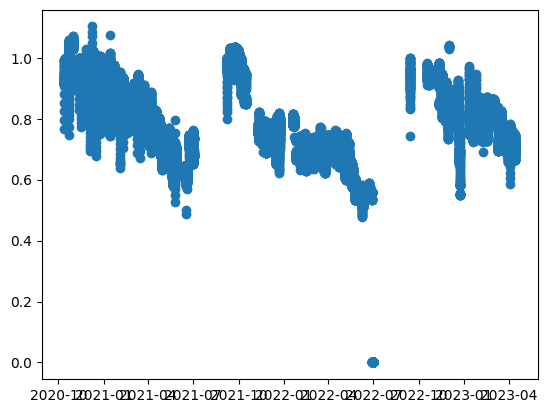

In [241]:
plt.scatter(fe.df.index, fe.df["ff"])

In [242]:
# add some new features
fe.df["dt2_norm1"] = fe.df["dt2"]/fe.df["dt_circuits_coef"]
# fe.df["dt2_norm2"] = fe.df["dt2"]/fe.df["dt_circuits_coef"]\
#                     /fe.df.loc[:, ["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]].sum(axis=1)
fe.df["dt1_norm1"] = fe.df["dt1"]/fe.df["dt_circuits_coef"]

fe.df["HEs_status"] = fe.df.loc[:, ["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]].sum(axis=1)
# fe.df["dt1_norm2"] = fe.df["dt1"]/fe.df["dt_circuits_coef"]\
#                     /fe.df.loc[:, ["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]].sum(axis=1)
# fe.df["dt2_norm3"] = fe.df["dt2"]/fe.df["dt_circuits_coef"]\
#                     /fe.df.loc[:, ["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]].sum(axis=1)\
#                     /fe.df.loc[:, ["CTF1", "CTF2", "CTF3"]].sum(axis=1)

# fe.df = fe.df.drop(["dt1_norm2", "dt2_norm2"], axis=1)


/tmp/ipykernel_32456/1977905269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df["dt2_norm1"] = fe.df["dt2"]/fe.df["dt_circuits_coef"]
/tmp/ipykernel_32456/1977905269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df["dt1_norm1"] = fe.df["dt1"]/fe.df["dt_circuits_coef"]
/tmp/ipykernel_32456/1977905269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [283]:
df_cleaned = fe.df.copy().drop(
    [
        "P2", "Q2", "T1aHE", "T1bHE", "T2aHE", 
        "T2bHE", "p21", "p22", "p23", "p24", 
        "I2mean",
        "HE1_status","HE2_status", "HE3_status", 
        "HE4_status","HE5_status"
    ],
    axis=1,
    errors="ignore"
)

In [284]:
# df_cleaned["dt2"] = df_cleaned["dt2"]/df_cleaned["dt_circuits_coef"]/df_cleaned.loc[:, ["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]].sum(axis=1)

<AxesSubplot: >

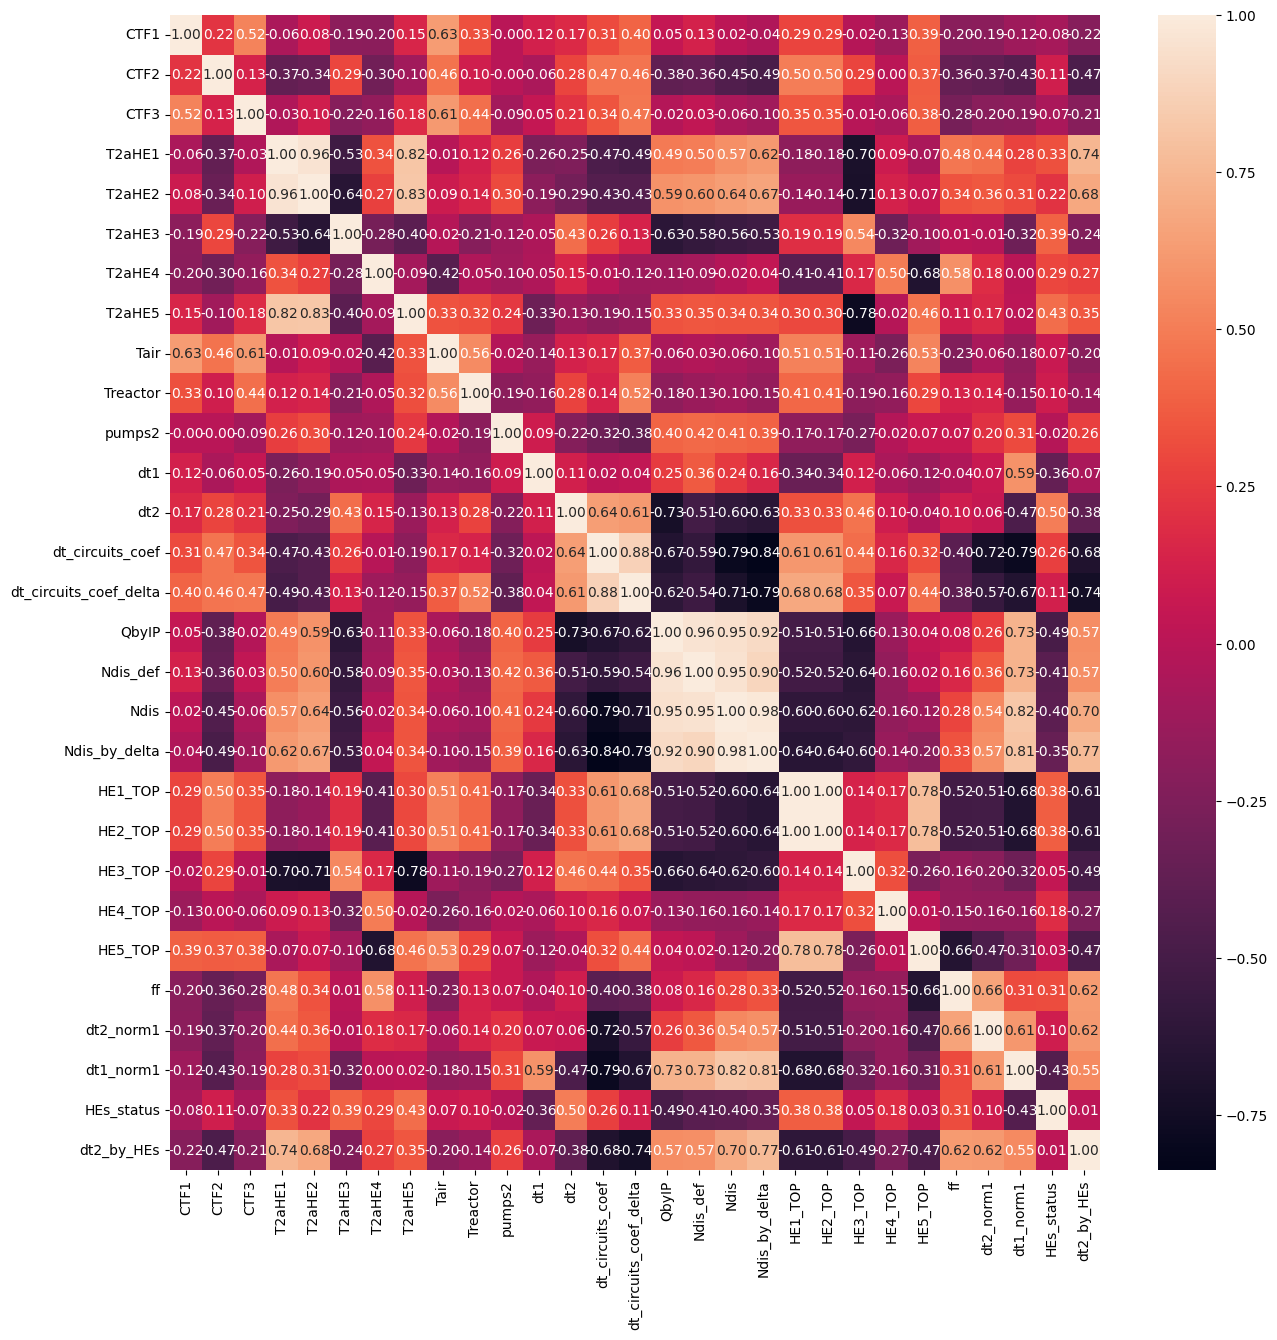

In [285]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f")

In [286]:
df_cleaned["HE_TOP_mean"] = df_cleaned.loc[:, ["HE1_TOP", "HE2_TOP", "HE3_TOP", "HE4_TOP", "HE5_TOP"]].mean(axis=1)
df_cleaned["CTF_sum"] = df_cleaned.loc[:, ["CTF1", "CTF2", "CTF3"]].sum(axis=1)
df_cleaned = df_cleaned.drop(
    [
        "HE1_TOP", "HE2_TOP", "HE3_TOP", "HE4_TOP", 
        "HE5_TOP", "CTF1", "CTF2", "CTF3", "T2aHE1",
        "T2aHE2", "T2aHE3", "T2aHE4", "T2aHE5"
    ], 
    axis=1
)
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler(feature_range=(1,1.5))
df_cleaned["CTF_coef"] = mm_scaler.fit_transform(df_cleaned["CTF_sum"].to_numpy().reshape(-1,1))


df_cleaned["dt2_norm2"] = df_cleaned["dt2"]/df_cleaned["dt_circuits_coef_delta"]
df_cleaned["dt1_norm2"] = df_cleaned["dt1"]/df_cleaned["dt_circuits_coef_delta"]

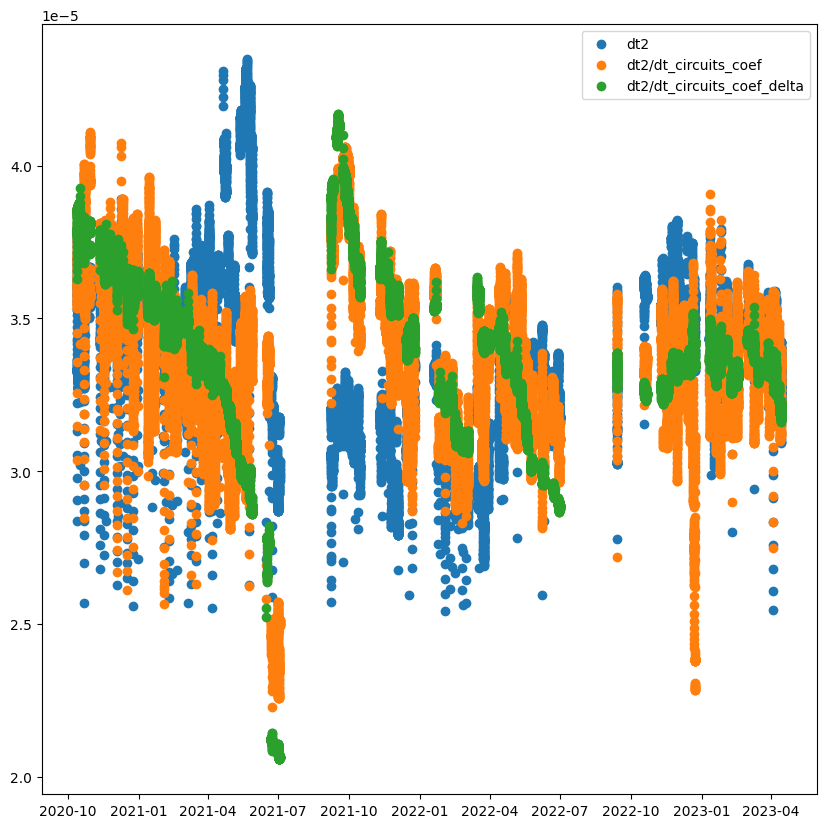

In [287]:
# damn, normalizing by delta coefficient makes it so smooth

plt.figure(figsize=(10,10))
plt.scatter(
    df_cleaned.index, 
    df_cleaned["dt2"]/df_cleaned["dt2"].sum(),
    label="dt2"
)

dt_norm = df_cleaned["dt2"]/df_cleaned["dt_circuits_coef"]

plt.scatter(
    df_cleaned.index, 
    dt_norm/dt_norm.sum(),
    label="dt2/dt_circuits_coef"
)

dt_norm2 = df_cleaned["dt2"]/df_cleaned["dt_circuits_coef_delta"]

plt.scatter(
    df_cleaned.index, 
    dt_norm2/dt_norm2.sum(),
    label="dt2/dt_circuits_coef_delta"
)

# dt_norm3 = df_cleaned["dt2"]/df_cleaned["dt_circuits_coef_delta"]/df_cleaned["QbyIP"]

# plt.scatter(
#     df_cleaned.index, 
#     dt_norm3/dt_norm3.sum(),
#     label="dt2/dt_circuits_coef_delta/Treactor"
# )


plt.legend()

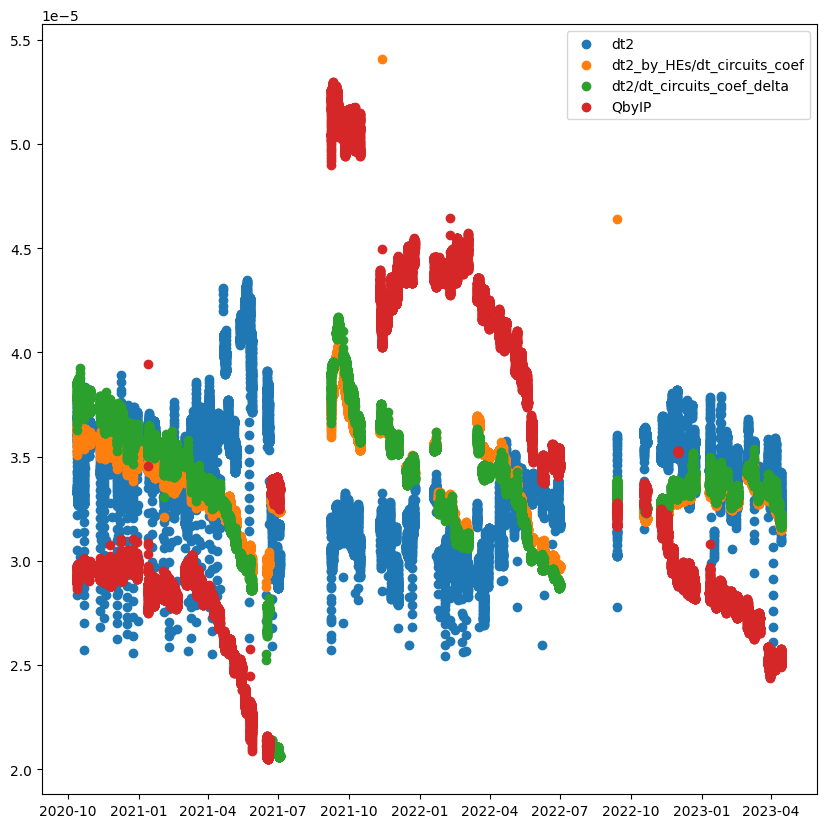

In [288]:
# do comparison of dt2/dt_circuits_coef_delta and 

plt.figure(figsize=(10,10))
plt.scatter(
    df_cleaned.index, 
    df_cleaned["dt2"]/df_cleaned["dt2"].sum(),
    label="dt2"
)

dt = df_cleaned["dt2_by_HEs"]

plt.scatter(
    df_cleaned.index, 
    dt/dt.sum(),
    label="dt2_by_HEs/dt_circuits_coef"
)

dt_norm2 = df_cleaned["dt2"]/df_cleaned["dt_circuits_coef_delta"]

plt.scatter(
    df_cleaned.index, 
    dt_norm2/dt_norm2.sum(),
    label="dt2/dt_circuits_coef_delta"
)

plt.scatter(
    df_cleaned.index, 
    df_cleaned["QbyIP"]/df_cleaned["QbyIP"].sum(),
    label="QbyIP"
)

plt.legend()

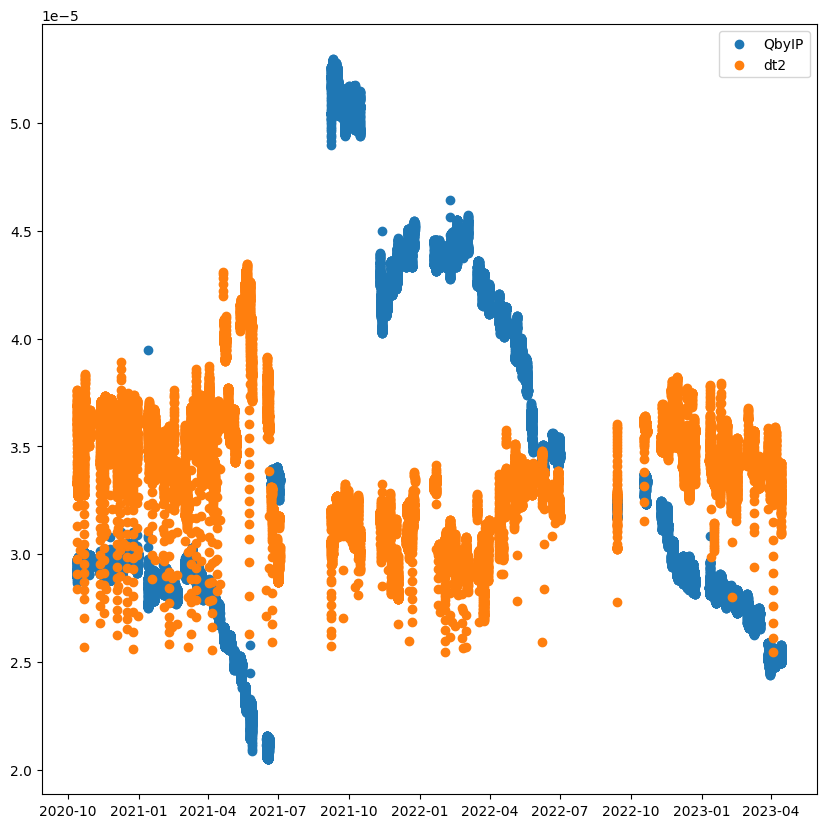

In [289]:
# damn, normalizing by delta coefficient makes it so smooth

plt.figure(figsize=(10,10))
plt.scatter(
    df_cleaned.index, 
    df_cleaned["QbyIP"]/df_cleaned["QbyIP"].sum(),
    label="QbyIP"
)

plt.scatter(
    df_cleaned.index, 
    df_cleaned["dt2"]/df_cleaned["dt2"].sum(),
    label="dt2"
)

plt.legend()

<AxesSubplot: >

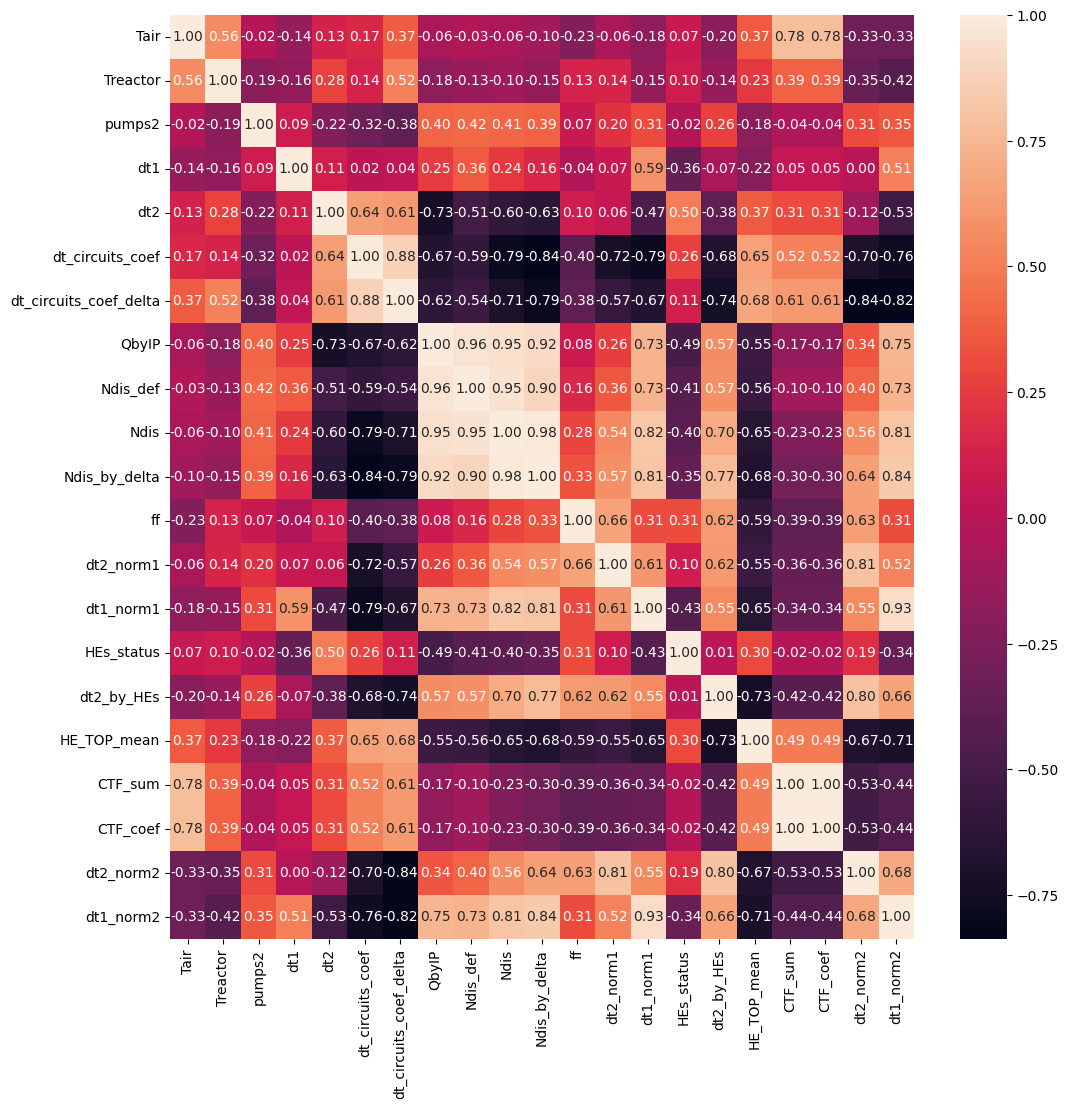

In [290]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f")

# Lets observe what are the relationships between
## 1 - Q and dt
## 2 - CTF operation freq and dt or Q
# And make some statistics tests on data

In [96]:
from scipy.stats import norm, kstest, shapiro

from scipy.optimize import curve_fit

In [65]:
df_oper = fe.df.copy()

In [66]:
nbins = 40
# to visualize first task lets group data by Q bins
df_oper["dt2_bins"], bins = pd.cut(df_oper["dt2"], bins=nbins, retbins=True, labels=False)
df_oper["dt2_norm_bins"], bins_norm = pd.cut(df_oper["dt2"]/df_oper["dt_circuits_coef"], bins=nbins, retbins=True, labels=False)
df_oper["dt1/dt2"], bins_dt1_dt2 = pd.cut(df_oper["dt1"]/df_oper["dt2"], bins=nbins, retbins=True, labels=False)

# df_oper["Q2_bins"] = pd.cut(df_oper["Q2"], bins=100, labels=False)
bins = np.array(list(map(lambda x: "{:.2f}".format(x), bins)))
bins_norm = np.array(list(map(lambda x: "{:.2f}".format(x), bins_norm)))
bins_dt1_dt2 = np.array(list(map(lambda x: "{:.2f}".format(x), bins_dt1_dt2)))

In [67]:
df_oper

CTF1  CTF2  CTF3        P2        Q2      T1aHE  \
Timestamp                                                              
2020-10-12 22:40:00     0     0     0  0.405208  645.1025  34.476987   
2020-10-12 22:50:00     0     0     0  0.404329  645.4850  35.700320   
2020-10-12 23:00:00     0     0     0  0.403619  646.0100  36.846820   
2020-10-12 23:10:00     0     0     0  0.402855  646.4900  37.900775   
2020-10-12 23:20:00     0     0     0  0.402255  646.8425  38.859150   
...                   ...   ...   ...       ...       ...        ...   
2023-04-14 08:20:00     0     1     0  0.480000  653.3625  40.693871   
2023-04-14 08:30:00     0     1     0  0.480000  653.3200  40.617309   
2023-04-14 08:40:00     0     1     0  0.480000  653.2500  40.539244   
2023-04-14 08:50:00     0     1     0  0.480000  653.1425  40.459244   
2023-04-14 09:00:00     0     1     0  0.480000  653.1050  40.386098   

                         T1bHE      T2aHE    T2aHE1    T2aHE2  ...  \
Timestamp                                                      ...   
2020-10-12 22:40:00  39.622063  27.084679  3.092530  2.974867  ...   
2020-10-12 22:50:00  40.926536  28.216991  3.196812  3.071243  ...   
2020-10-12 23:00:00  42.165683  29.242241  3.298093  3.165122  ...   
2020-10-12 23:10:00  43.313046  30.164779  3.394821  3.253996  ...   
2020-10-12 23:20:00  44.372977  30.984493  3.488687  3.338580  ...   
...                        ...        ...       ...       ...  ...   
2023-04-14 08:20:00  47.013086  29.354231  2.892944  2.832305  ...   
2023-04-14 08:30:00  46.939538  29.261005  2.886721  2.826086  ...   
2023-04-14 08:40:00  46.865021  29.162880  2.880099  2.820164  ...   
2023-04-14 08:50:00  46.791796  29.063364  2.874285  2.814489  ...   
2023-04-14 09:00:00  46.721796  28.968848  2.867743  2.808888  ...   

                     HE3_status  HE4_status  HE5_status        ff  dt2_norm1  \
Timestamp                                                                      
2020-10-12 22:40:00         1.0         1.0         1.0  0.739283   2.797362   
2020-10-12 22:50:00         1.0         1.0         1.0  0.758968   2.899761   
2020-10-12 23:00:00         1.0         1.0         1.0  0.780491   2.997535   
2020-10-12 23:10:00         1.0         1.0         1.0  0.802848   3.090323   
2020-10-12 23:20:00         1.0         1.0         1.0  0.825560   3.179002   
...                         ...         ...         ...       ...        ...   
2023-04-14 08:20:00         1.0         1.0         0.0  0.734259   2.945994   
2023-04-14 08:30:00         1.0         1.0         0.0  0.734860   2.939957   
2023-04-14 08:40:00         1.0         1.0         0.0  0.735246   2.933191   
2023-04-14 08:50:00         1.0         1.0         0.0  0.735513   2.926222   
2023-04-14 09:00:00         1.0         1.0         0.0  0.735497   2.918759   

                     dt1_norm1  HEs_status  dt2_bins  dt2_norm_bins  dt1/dt2  
Timestamp                                                                     
2020-10-12 22:40:00   2.864630         5.0         6             17       10  
2020-10-12 22:50:00   2.946436         5.0         8             19       10  
2020-10-12 23:00:00   3.023505         5.0         9             21        9  
2020-10-12 23:10:00   3.093750         5.0        11             23        9  
2020-10-12 23:20:00   3.161136         5.0        13             26        9  
...                        ...         ...       ...            ...      ...  
2023-04-14 08:20:00   3.151654         4.0        17             20       12  
2023-04-14 08:30:00   3.145151         4.0        17             20       12  
2023-04-14 08:40:00   3.138335         4.0        17             20       12  
2023-04-14 08:50:00   3.132771         4.0        17             20       12  
2023-04-14 09:00:00   3.126163         4.0        17             20       12  

[29570 rows x 44 columns]

In [68]:
df_oper_dt2gr = df_oper.groupby(["dt2_bins"]).mean()
df_oper_dt2_normgr = df_oper.groupby(["dt2_norm_bins"]).mean()
df_oper_dt1_dt2_mean = df_oper.groupby(["dt1/dt2"]).mean()


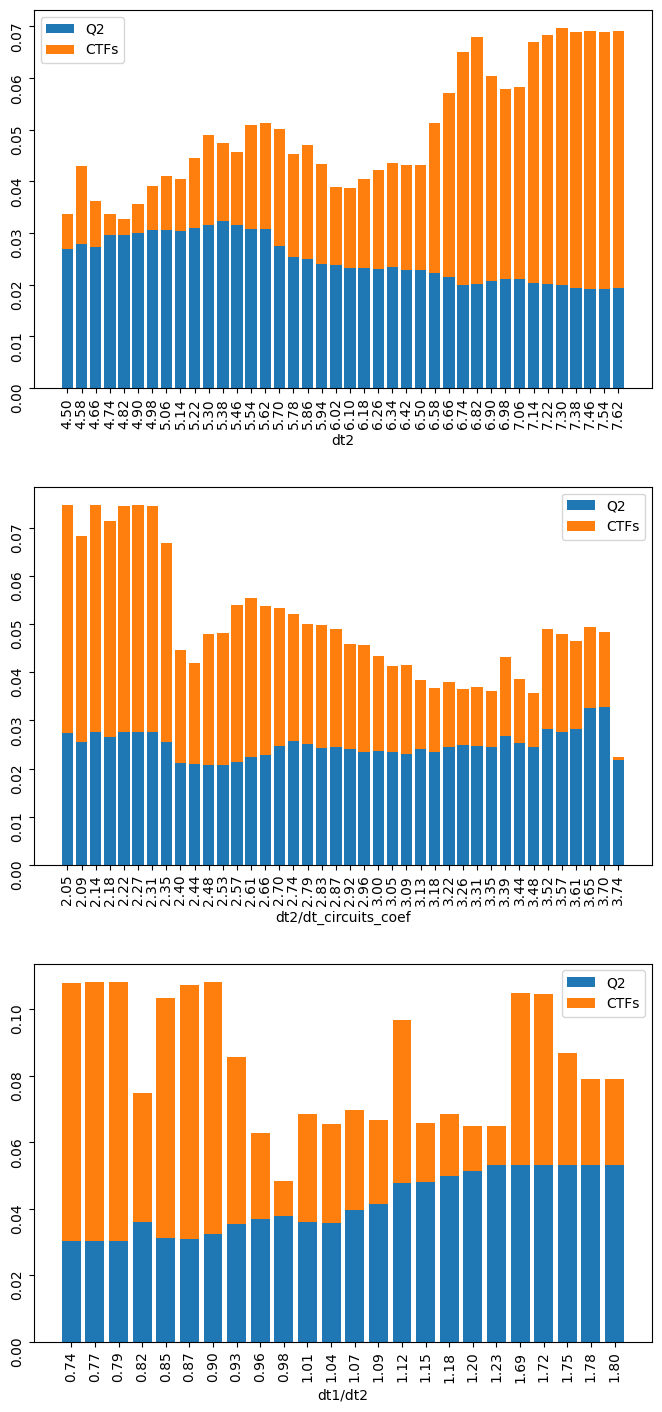

In [69]:
fig, axs = plt.subplots(3,1, figsize=(8,15))
fig.tight_layout(pad=5.0)

# relationship between raw dt2 and WFR and raw dt2 and CTFs on mean group data
qbyip_mean = df_oper_dt2gr["Q2"]/df_oper_dt2gr["Q2"].sum()
axs[0].bar(df_oper_dt2gr.index, qbyip_mean, label="Q2")
# axs[1].bar(df_oper_Qgr.index, df_oper_Qgr["CTF1"])
ctfs = df_oper_dt2gr.loc[:, ["CTF1", "CTF2", "CTF3"]].sum(axis=1)
# print(ctfs)
axs[0].bar(bins[df_oper_dt2gr.index], ctfs
           /ctfs.sum(),
           bottom=df_oper_dt2gr["Q2"]/df_oper_dt2gr["Q2"].sum(),
           label="CTFs"
)
axs[0].tick_params(labelrotation=90)
axs[0].set_xlabel("dt2")
axs[0].legend()

# relationship between dt2_norm and WFR and dt2_norm and CTFs on mean group data
# normalized data cant show real relationships between data
axs[1].bar(df_oper_dt2_normgr.index,
           df_oper_dt2_normgr["Q2"]/df_oper_dt2_normgr["Q2"].sum(), 
           label="Q2"
)

ctfs_norm = df_oper_dt2_normgr.loc[:, ["CTF1", "CTF2", "CTF3"]].sum(axis=1)
axs[1].bar(bins_norm[df_oper_dt2_normgr.index], ctfs_norm
           /ctfs_norm.sum(),
           bottom=df_oper_dt2_normgr["Q2"]/df_oper_dt2_normgr["Q2"].sum(),
           label="CTFs"
)
axs[1].tick_params(labelrotation=90)
axs[1].set_xlabel("dt2/dt_circuits_coef")
axs[1].legend()


ctfs_dt1_dt2_m = df_oper_dt1_dt2_mean.loc[:, ["CTF1", "CTF2", "CTF3"]].sum(axis=1)

# Q2 and QbyIP have the same trends for dt1/dt2 data
axs[2].bar(
    bins_dt1_dt2[df_oper_dt1_dt2_mean.index], 
    df_oper_dt1_dt2_mean["Q2"]/df_oper_dt1_dt2_mean["Q2"].sum(),
    label="Q2"
)
axs[2].bar(
    bins_dt1_dt2[df_oper_dt1_dt2_mean.index], 
    ctfs_dt1_dt2_m/ctfs_dt1_dt2_m.sum(),
    bottom=df_oper_dt1_dt2_mean["Q2"]/df_oper_dt1_dt2_mean["Q2"].sum(),
    label="CTFs"
)
axs[2].tick_params(labelrotation=90)
axs[2].set_xlabel("dt1/dt2")
axs[2].legend()


In [70]:

df_oper_dt2gr_sum = df_oper.groupby(["dt2_bins"]).sum()
df_oper_dt2gr_count = df_oper.groupby(["dt2_bins"]).count()
df_oper_dt2_normgr_sum = df_oper.groupby(["dt2_norm_bins"]).sum()
df_oper_dt2_normgr_count = df_oper.groupby(["dt2_norm_bins"]).count()


df_oper_dt1_dt2_counts = df_oper.groupby(["dt1/dt2"]).count()
df_oper_dt1_dt2_sum = df_oper.groupby(["dt1/dt2"]).sum()

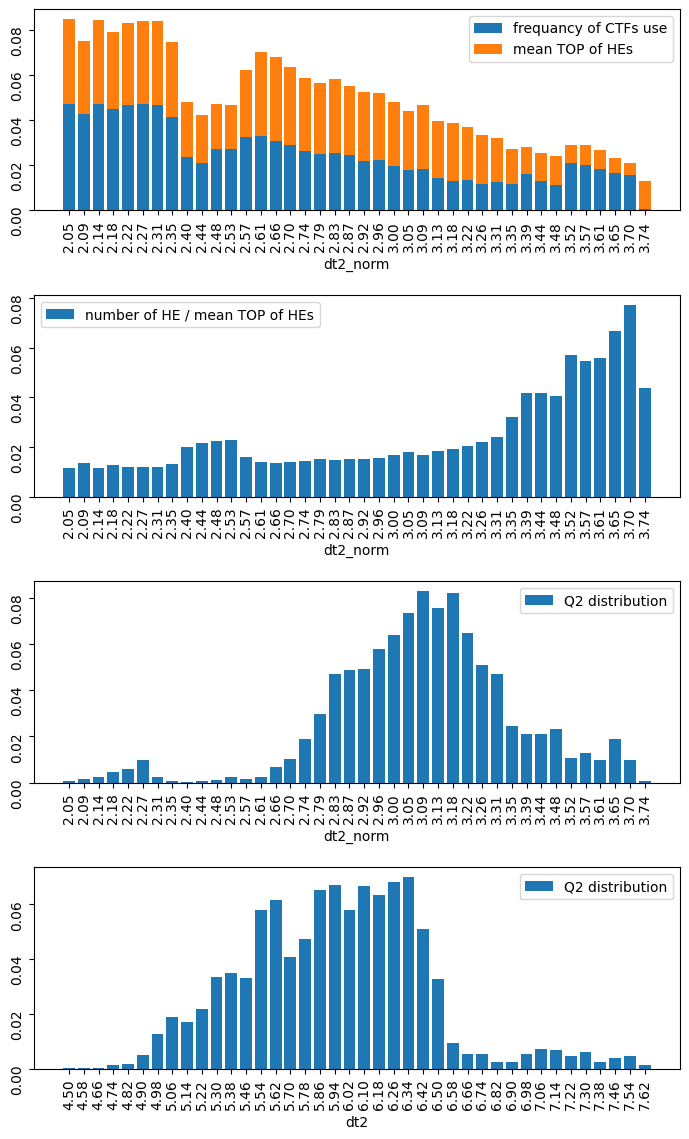

In [71]:
fig, axs = plt.subplots(4,1, figsize=(8,12))
fig.tight_layout(pad=4.0)

ctfs_norm_sum = df_oper_dt2_normgr.loc[:, ["CTF1", "CTF2", "CTF3"]].sum(axis=1)
he_top = df_oper_dt2_normgr.loc[:, ["HE1_TOP", "HE2_TOP", "HE3_TOP", "HE4_TOP", "HE5_TOP"]].mean(axis=1)

# relationship between dt2_norm and CTFs and dt2_norm and HE_TOP on sum group data
axs[0].bar(
    bins_norm[df_oper_dt2_normgr.index], 
    ctfs_norm_sum/ctfs_norm_sum.sum(),
    label="frequancy of CTFs use"
)
axs[0].bar(
    bins_norm[df_oper_dt2_normgr.index], 
    he_top/he_top.sum(),  
    bottom=ctfs_norm_sum/ctfs_norm_sum.sum(),
    label="mean TOP of HEs"
)
axs[0].tick_params(labelrotation=90)
axs[0].set_xlabel("dt2_norm")
axs[0].legend()


he_status = df_oper_dt2_normgr_sum.loc[
   :, 
   ["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]].sum(axis=1)\
    / df_oper_dt2_normgr_sum.loc[:, ["HE1_TOP", "HE2_TOP", "HE3_TOP", "HE4_TOP", "HE5_TOP"]].mean(axis=1)
axs[1].bar(
    bins_norm[df_oper_dt2_normgr_sum.index], 
    he_status/he_status.sum(),
    label="number of HE / mean TOP of HEs"
)
axs[1].tick_params(labelrotation=90)
axs[1].set_xlabel("dt2_norm")
axs[1].legend()


qbyip_norm_counts = df_oper_dt2_normgr_count["Q2"]/df_oper_dt2_normgr_count["Q2"].sum()
# relationship between dt2_norm and WFR counts
axs[2].bar(
    bins_norm[df_oper_dt2_normgr_count.index], 
    qbyip_norm_counts,
    label="Q2 distribution"
    
)
axs[2].tick_params(labelrotation=90)
axs[2].set_xlabel("dt2_norm")
axs[2].legend()

axs[3].bar(
    bins[df_oper_dt2gr_count.index],
    df_oper_dt2gr_count["Q2"]/df_oper_dt2gr_count["Q2"].sum(),
    label="Q2 distribution"
)
axs[3].tick_params(labelrotation=90)
axs[3].set_xlabel("dt2")
axs[3].legend()

# DO some statistics on cleaned data
# More consistent approach is used

In [416]:
df_oper_cleaned = df_cleaned.copy()

In [516]:
nbins2 = 50
df_oper_cleaned["HE_TOP_mean_bins"], bins_cleaned = pd.cut(df_oper_cleaned["HE_TOP_mean"], bins=nbins2, labels=False, retbins=True)
df_oper_cleaned["ff_bins"], bins_cleaned2 = pd.cut(
    df_oper_cleaned["ff"], 
    bins = np.arange(0.5,1,0.01), 
    labels=False, 
    retbins=True
)
df_oper_cleaned["dt2_bins"], bins_cleaned3 = pd.cut(df_oper_cleaned["dt2"], bins=nbins2, labels=False, retbins=True)

df_oper_cleaned["dt2_by_HEs_bins"], bins_cleaned4 = pd.cut(df_oper_cleaned["dt2_by_HEs"], bins=40, labels=False, retbins=True)

bins_cleaned2 = np.array(list(map(lambda x: "{:.2f}".format(x), bins_cleaned2)))
bins_cleaned4 = np.array(list(map(lambda x: "{:.2f}".format(x), bins_cleaned4)))

In [517]:
df_oper_cleaned_HE_TOP_mean_gr_count = df_oper_cleaned.groupby("HE_TOP_mean_bins").count()
df_oper_cleaned_HE_TOP_mean_gr_mean = df_oper_cleaned.groupby("HE_TOP_mean_bins").mean()

df_oper_cleaned_ff_count = df_oper_cleaned.groupby("ff_bins").count()
# filter by number of observations
df_oper_cleaned_ff_count = df_oper_cleaned_ff_count[df_oper_cleaned_ff_count > 70].dropna().reset_index()
df_oper_cleaned_ff_mean = df_oper_cleaned.groupby("ff_bins").mean().reset_index()

df_oper_cleaned_dt2_count = df_oper_cleaned.groupby("dt2_bins").count().reset_index()
df_oper_cleaned_dt2_mean = df_oper_cleaned.groupby("dt2_bins").mean().reset_index()

df_oper_cleaned_dt2_by_HEs_count = df_oper_cleaned.groupby("dt2_by_HEs_bins").count()
df_oper_cleaned_dt2_by_HEs_count = df_oper_cleaned_dt2_by_HEs_count[df_oper_cleaned_dt2_by_HEs_count > 70].dropna().reset_index()

df_oper_cleaned_dt2_by_HEs_mean = df_oper_cleaned.groupby("dt2_by_HEs_bins").mean().reset_index()

In [518]:
df_oper_cleaned_dt2_by_HEs_count

dt2_by_HEs_bins    Tair  Treactor  pumps2     dt1     dt2  \
0                 1   800.0     800.0   800.0   800.0   800.0   
1                 2  1122.0    1122.0  1122.0  1122.0  1122.0   
2                 3   758.0     758.0   758.0   758.0   758.0   
3                 4  1261.0    1261.0  1261.0  1261.0  1261.0   
4                 5  2963.0    2963.0  2963.0  2963.0  2963.0   
5                 6  5938.0    5938.0  5938.0  5938.0  5938.0   
6                 7  3191.0    3191.0  3191.0  3191.0  3191.0   
7                 8  3506.0    3506.0  3506.0  3506.0  3506.0   
8                 9  2223.0    2223.0  2223.0  2223.0  2223.0   
9                10  3266.0    3266.0  3266.0  3266.0  3266.0   
10               11  1228.0    1228.0  1228.0  1228.0  1228.0   
11               12  1479.0    1479.0  1479.0  1479.0  1479.0   
12               13   465.0     465.0   465.0   465.0   465.0   
13               14   537.0     537.0   537.0   537.0   537.0   
14               17   375.0     375.0   375.0   375.0   375.0   

    dt_circuits_coef  dt_circuits_coef_delta   QbyIP  Ndis_def  ...  \
0              800.0                   800.0   800.0     800.0  ...   
1             1122.0                  1122.0  1122.0    1122.0  ...   
2              758.0                   758.0   758.0     758.0  ...   
3             1261.0                  1261.0  1261.0    1261.0  ...   
4             2963.0                  2963.0  2963.0    2963.0  ...   
5             5938.0                  5938.0  5938.0    5938.0  ...   
6             3191.0                  3191.0  3191.0    3191.0  ...   
7             3506.0                  3506.0  3506.0    3506.0  ...   
8             2223.0                  2223.0  2222.0    2222.0  ...   
9             3266.0                  3266.0  3266.0    3266.0  ...   
10            1228.0                  1228.0  1228.0    1228.0  ...   
11            1479.0                  1479.0  1479.0    1479.0  ...   
12             465.0                   465.0   465.0     465.0  ...   
13             537.0                   537.0   537.0     537.0  ...   
14             375.0                   375.0   375.0     375.0  ...   

    HEs_status  dt2_by_HEs  HE_TOP_mean  CTF_sum  CTF_coef  dt2_norm2  \
0        800.0       800.0        800.0    800.0     800.0      800.0   
1       1122.0      1122.0       1122.0   1122.0    1122.0     1122.0   
2        758.0       758.0        758.0    758.0     758.0      758.0   
3       1261.0      1261.0       1261.0   1261.0    1261.0     1261.0   
4       2963.0      2963.0       2963.0   2963.0    2963.0     2963.0   
5       5938.0      5938.0       5938.0   5938.0    5938.0     5938.0   
6       3191.0      3191.0       3191.0   3191.0    3191.0     3191.0   
7       3506.0      3506.0       3506.0   3506.0    3506.0     3506.0   
8       2223.0      2223.0       2223.0   2223.0    2223.0     2223.0   
9       3266.0      3266.0       3266.0   3266.0    3266.0     3266.0   
10      1228.0      1228.0       1228.0   1228.0    1228.0     1228.0   
11      1479.0      1479.0       1479.0   1479.0    1479.0     1479.0   
12       465.0       465.0        465.0    465.0     465.0      465.0   
13       537.0       537.0        537.0    537.0     537.0      537.0   
14       375.0       375.0        375.0    375.0     375.0      375.0   

    dt1_norm2  HE_TOP_mean_bins  ff_bins  dt2_bins  
0       800.0             800.0    619.0     800.0  
1      1122.0            1122.0   1112.0    1122.0  
2       758.0             758.0    758.0     758.0  
3      1261.0            1261.0   1261.0    1261.0  
4      2963.0            2963.0   2963.0    2963.0  
5      5938.0            5938.0   5932.0    5938.0  
6      3191.0            3191.0   3191.0    3191.0  
7      3506.0            3506.0   3506.0    3506.0  
8      2223.0            2223.0   2129.0    2223.0  
9      3266.0            3266.0   3064.0    3266.0  
10     1228.0            1228.0    957.0    1228.0  
11     1479.0        

3184.728783068989
ShapiroResult(statistic=0.8596115112304688, pvalue=2.8464046408771537e-05)


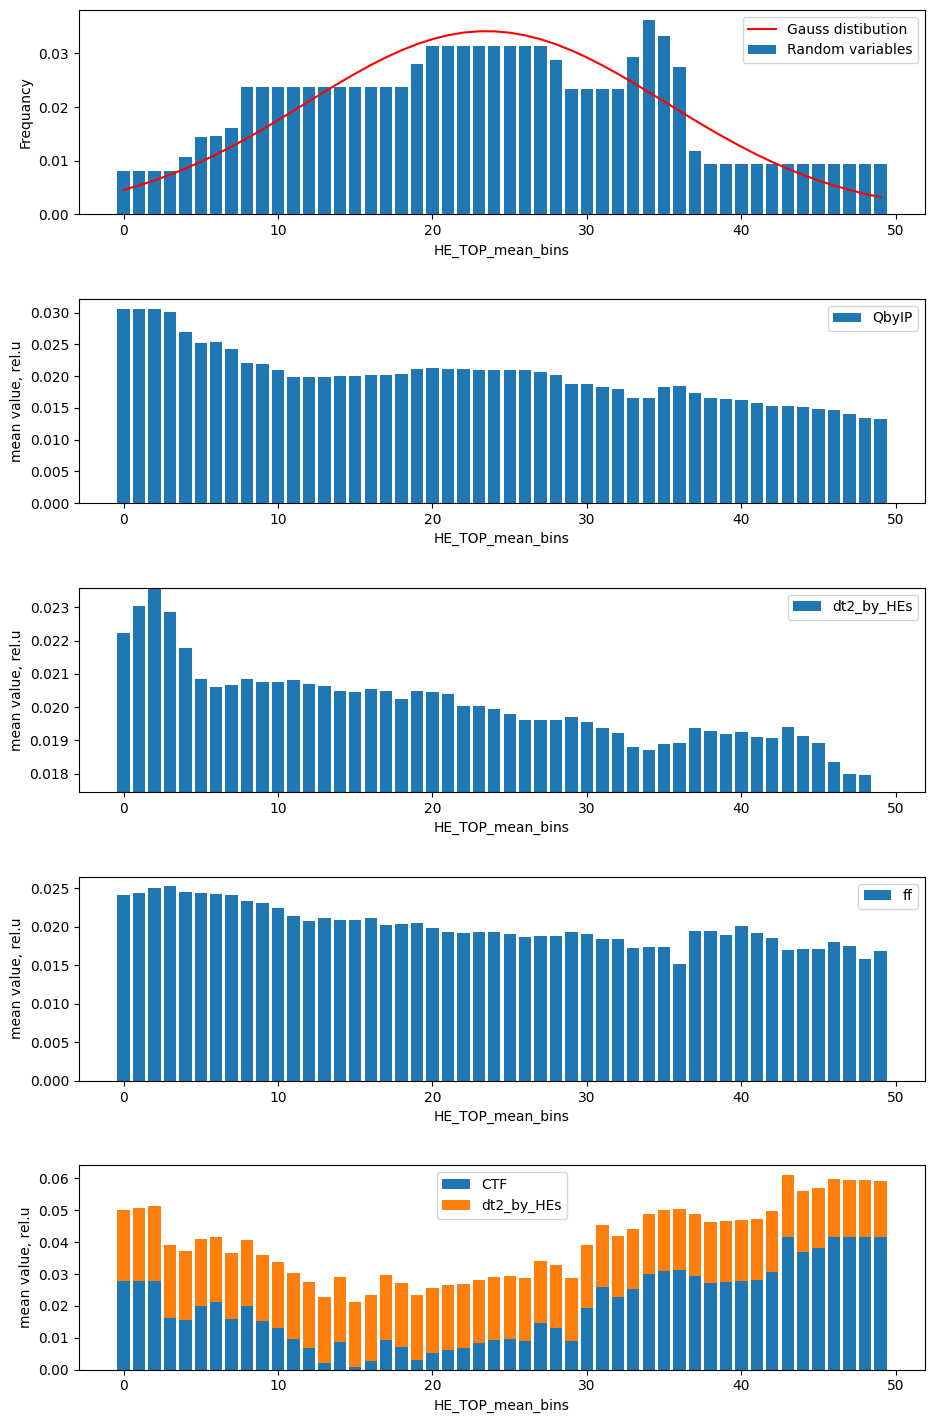

In [519]:
fig, axs = plt.subplots(5,1, figsize=(10,15))
fig.tight_layout(pad=4.0)

x = df_oper_cleaned_HE_TOP_mean_gr_count.index
y = df_oper_cleaned_HE_TOP_mean_gr_count["dt2_norm1"]

axs[0].bar(
    x,
    y/y.sum(),
    label="Random variables"
)


mean = (
    (y/y.sum())
    *x
).sum()
std = np.sqrt(
    (
        (x - np.mean(x)
    )**2\
    *(y/y.sum())).sum()
)

print(bins_cleaned[int(mean)])
pdf = norm(mean, std).pdf(x)

axs[0].plot(
    x,
    pdf,
    color="red",
    label="Gauss distibution"
)
axs[0].set_ylabel("Frequancy")
axs[0].set_xlabel("HE_TOP_mean_bins")
axs[0].legend()

print(shapiro(y/y.sum()))

axs[1].bar(
    df_oper_cleaned_HE_TOP_mean_gr_mean.index,
    df_oper_cleaned_HE_TOP_mean_gr_mean["QbyIP"]/df_oper_cleaned_HE_TOP_mean_gr_mean["QbyIP"].sum(),
    label="QbyIP"
    
)
axs[1].set_xlabel("HE_TOP_mean_bins")
axs[1].set_ylabel("mean value, rel.u")
axs[1].legend()

dt_by_HEs_HE_TOP = df_oper_cleaned_HE_TOP_mean_gr_mean["dt2_by_HEs"]/df_oper_cleaned_HE_TOP_mean_gr_mean["dt2_by_HEs"].sum()
axs[2].bar(
    df_oper_cleaned_HE_TOP_mean_gr_mean.index,
    dt_by_HEs_HE_TOP/dt_by_HEs_HE_TOP.sum(),
    label="dt2_by_HEs"
)
axs[2].set_xlabel("HE_TOP_mean_bins")
axs[2].set_ylabel("mean value, rel.u")
axs[2].set_ylim(
    (dt_by_HEs_HE_TOP/dt_by_HEs_HE_TOP.sum()).min(),
    (dt_by_HEs_HE_TOP/dt_by_HEs_HE_TOP.sum()).max()
    
)
axs[2].legend()

axs[3].bar(
    df_oper_cleaned_HE_TOP_mean_gr_mean.index,
    df_oper_cleaned_HE_TOP_mean_gr_mean["ff"]/df_oper_cleaned_HE_TOP_mean_gr_mean["ff"].sum(),
    label="ff"
)
axs[3].set_xlabel("HE_TOP_mean_bins")
axs[3].set_ylabel("mean value, rel.u")
axs[3].legend()

axs[4].bar(
    df_oper_cleaned_HE_TOP_mean_gr_mean.index,
    df_oper_cleaned_HE_TOP_mean_gr_mean["CTF_sum"]/df_oper_cleaned_HE_TOP_mean_gr_mean["CTF_sum"].sum(),
    label="CTF"
)

axs[4].bar(
    df_oper_cleaned_HE_TOP_mean_gr_mean.index,
    df_oper_cleaned_HE_TOP_mean_gr_mean["dt2_by_HEs"]/df_oper_cleaned_HE_TOP_mean_gr_mean["dt2_by_HEs"].sum(),
    bottom=df_oper_cleaned_HE_TOP_mean_gr_mean["CTF_sum"]/df_oper_cleaned_HE_TOP_mean_gr_mean["CTF_sum"].sum(),
    label="dt2_by_HEs"
)
axs[4].set_xlabel("HE_TOP_mean_bins")
axs[4].set_ylabel("mean value, rel.u")
axs[4].legend()


0.7549999999999999 0.13275918047351754
0.75 10.967404511120908
ShapiroResult(statistic=0.9639006853103638, pvalue=0.1624457687139511)


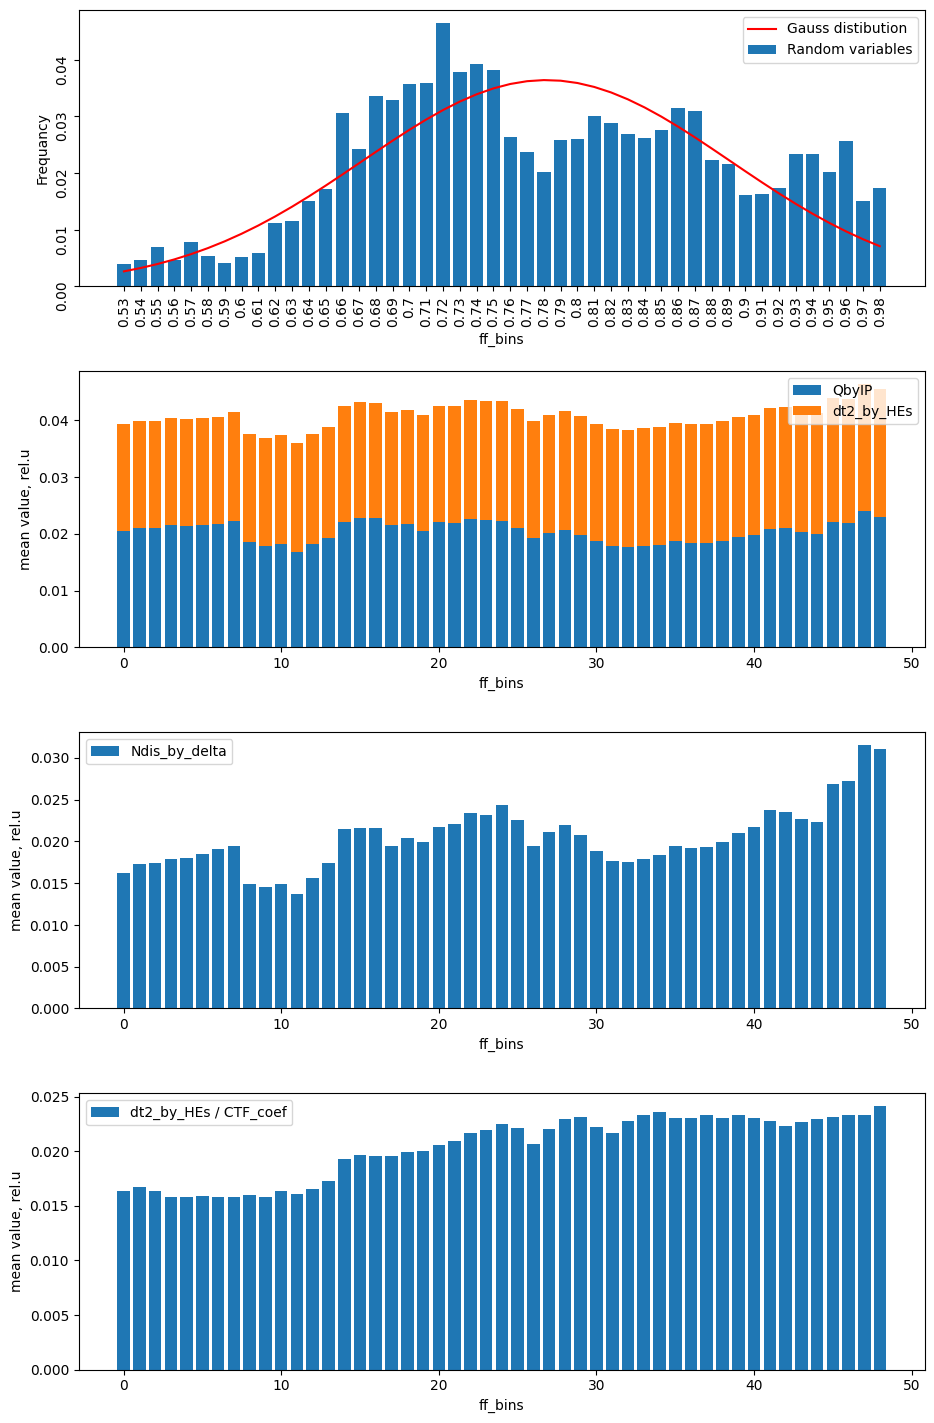

In [520]:
fig, axs = plt.subplots(4,1, figsize=(10,15))
fig.tight_layout(pad=4.0)

x = df_oper_cleaned_ff_count.index
y = df_oper_cleaned_ff_count["dt2_norm1"]

true_x_fltrd_ff = list(
    map(
        lambda x: float(x),
        bins_cleaned2[df_oper_cleaned_ff_count["ff_bins"].astype("int32")]
    )
)


print(np.mean(true_x_fltrd_ff), np.std(true_x_fltrd_ff))

axs[0].bar(
    x,
    y/y.sum(),
    label="Random variables"
    
)

mean = (
    (y/y.sum())
    *x
).sum()
std = np.sqrt(
    (
        (x - np.mean(x)
    )**2\
    *(y/y.sum())).sum()
)

print(bins_cleaned2[int(mean)], std)
pdf = norm(mean, std).pdf(x)

axs[0].plot(
    x,
    pdf,
    color="red",
    label="Gauss distibution"
)
axs[0].set_ylabel("Frequancy")
axs[0].set_xlabel("ff_bins")
axs[0].legend()
axs[0].set_xticks(
    x,
    true_x_fltrd_ff
)
axs[0].tick_params(labelrotation=90)

print(shapiro(y/y.sum()))

# axs[1].boxplot(true_x_fltrd)

axs[1].bar(
    df_oper_cleaned_ff_mean.index,
    df_oper_cleaned_ff_mean["QbyIP"]/df_oper_cleaned_ff_mean["QbyIP"].sum(),
    label="QbyIP"
)

axs[1].bar(
    df_oper_cleaned_ff_mean.index,
    df_oper_cleaned_ff_mean["dt2_by_HEs"]/df_oper_cleaned_ff_mean["dt2_by_HEs"].sum(),
    bottom=df_oper_cleaned_ff_mean["QbyIP"]/df_oper_cleaned_ff_mean["QbyIP"].sum(),
    label="dt2_by_HEs"
)

axs[1].set_ylabel("mean value, rel.u")
axs[1].set_xlabel("ff_bins")
axs[1].legend()

axs[2].bar(
    df_oper_cleaned_ff_mean.index,
    df_oper_cleaned_ff_mean["Ndis_by_delta"]/df_oper_cleaned_ff_mean["Ndis_by_delta"].sum(),
    label="Ndis_by_delta"
)
axs[2].set_ylabel("mean value, rel.u")
axs[2].set_xlabel("ff_bins")
axs[2].legend()


axs[3].bar(
    df_oper_cleaned_ff_mean.index,
    (df_oper_cleaned_ff_mean["dt2_by_HEs"]/df_oper_cleaned_ff_mean["CTF_coef"])
    /(df_oper_cleaned_ff_mean["dt2_by_HEs"]/df_oper_cleaned_ff_mean["CTF_coef"]).sum(),
    label="dt2_by_HEs / CTF_coef"
)
axs[3].set_ylabel("mean value, rel.u")
axs[3].set_xlabel("ff_bins")
axs[3].legend()

0.28 0.02529822128134703
0.27 3.054821824826543
ShapiroResult(statistic=0.8597429990768433, pvalue=0.023927882313728333)


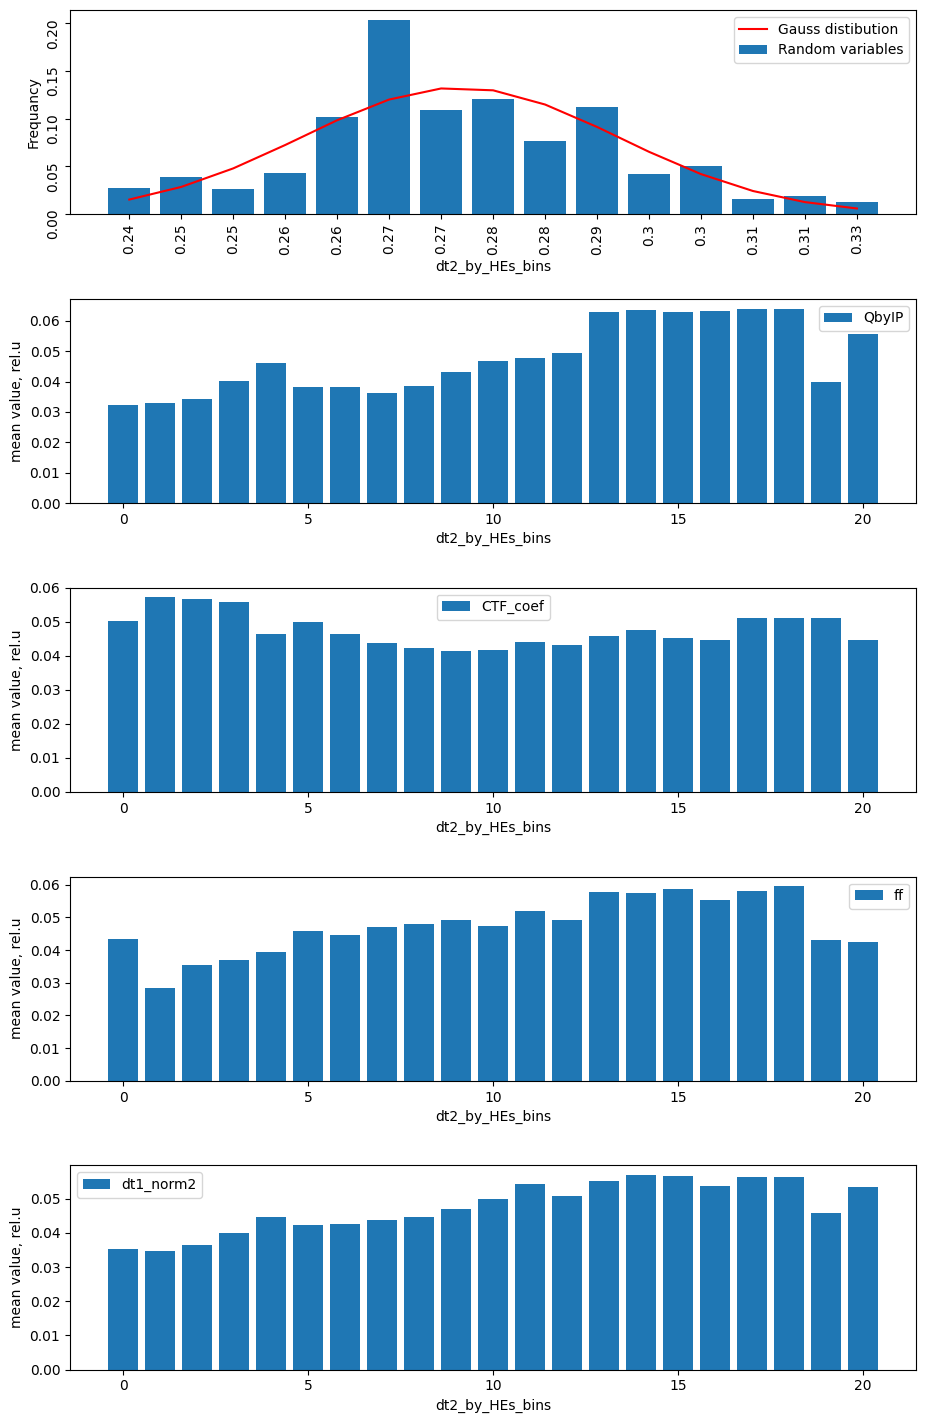

In [529]:
fig, axs = plt.subplots(5,1, figsize=(10,15))
fig.tight_layout(pad=4)

x = df_oper_cleaned_dt2_by_HEs_count.index
y = df_oper_cleaned_dt2_by_HEs_count["QbyIP"]

true_x_fltrd_dt2_by_HEs = list(
    map(
        lambda x: float(x),
        bins_cleaned4[df_oper_cleaned_dt2_by_HEs_count["dt2_by_HEs_bins"].astype("int32")]
    )
)


print(np.mean(true_x_fltrd_dt2_by_HEs), np.std(true_x_fltrd_dt2_by_HEs))

# x = true_x_fltrd_dt2_by_HEs

axs[0].bar(
    x,
    y/y.sum(),
    label="Random variables"
    
)


mean = (
    (y/y.sum())
    *x
).sum()
std = np.sqrt(
    (
        (x - np.mean(x)
    )**2\
    *(y/y.sum())).sum()
)

print(bins_cleaned4[int(mean)], std)
pdf = norm(mean, std).pdf(x)

axs[0].plot(
    x,
    pdf/pdf.sum(),
    color="red",
    label="Gauss distibution"
)
axs[0].set_ylabel("Frequancy")
axs[0].set_xlabel("dt2_by_HEs_bins")
axs[0].legend()
axs[0].set_xticks(
    x,
    true_x_fltrd_dt2_by_HEs
)
axs[0].tick_params(labelrotation=90)

print(shapiro(y/y.sum()))


axs[1].bar(
    df_oper_cleaned_dt2_by_HEs_mean.index,
    df_oper_cleaned_dt2_by_HEs_mean["QbyIP"]/df_oper_cleaned_dt2_by_HEs_mean["QbyIP"].sum(),
    label="QbyIP"
)
axs[1].set_ylabel("mean value, rel.u")
axs[1].set_xlabel("dt2_by_HEs_bins")
axs[1].legend()

axs[2].bar(
    df_oper_cleaned_dt2_by_HEs_mean.index,
    df_oper_cleaned_dt2_by_HEs_mean["CTF_coef"]/df_oper_cleaned_dt2_by_HEs_mean["CTF_coef"].sum(),
    label="CTF_coef"
)
axs[2].set_ylabel("mean value, rel.u")
axs[2].set_xlabel("dt2_by_HEs_bins")
axs[2].legend()

axs[3].bar(
    df_oper_cleaned_dt2_by_HEs_mean.index,
    df_oper_cleaned_dt2_by_HEs_mean["ff"]/df_oper_cleaned_dt2_by_HEs_mean["ff"].sum(),
    label="ff"
)
axs[3].set_ylabel("mean value, rel.u")
axs[3].set_xlabel("dt2_by_HEs_bins")
axs[3].legend()

axs[4].bar(
    df_oper_cleaned_dt2_by_HEs_mean.index,
    df_oper_cleaned_dt2_by_HEs_mean["dt1_norm2"]/df_oper_cleaned_dt2_by_HEs_mean["dt1_norm2"].sum(),
    label="dt1_norm2"
)
axs[4].set_ylabel("mean value, rel.u")
axs[4].set_xlabel("dt2_by_HEs_bins")
axs[4].legend()

# axs[4].bar(
#     df_oper_cleaned_dt2_mean.index,
#     df_oper_cleaned_dt2_mean["CTF_coef"]/df_oper_cleaned_dt2_mean["CTF_coef"].sum(),
#     bottom=df_oper_cleaned_dt2_mean["dt2_by_HEs"]/df_oper_cleaned_dt2_mean["dt2_by_HEs"].sum()
# )


5.90811988869866
ShapiroResult(statistic=0.8264995813369751, pvalue=3.7882552987866802e-06)


<BarContainer object of 50 artists>

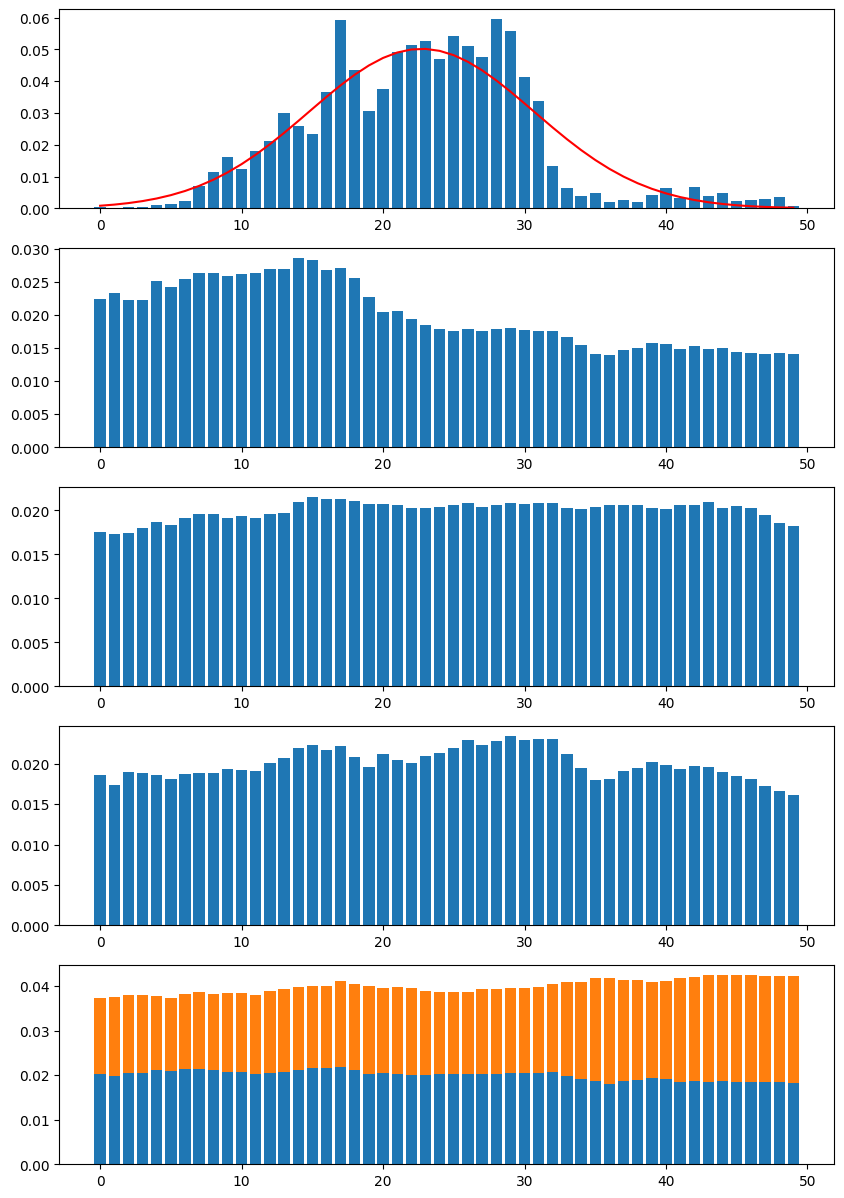

In [522]:
fig, axs = plt.subplots(5,1, figsize=(10,15))


x = df_oper_cleaned_dt2_count.index
y = df_oper_cleaned_dt2_count["dt2_norm1"]

axs[0].bar(
    x,
    y/y.sum()
)

mean = (
    (y/y.sum())
    *x
).sum()
std = np.sqrt(
    (
        (x - np.mean(x)
    )**2\
    *(y/y.sum())).sum()
)

print(bins_cleaned3[int(mean)])
pdf = norm(mean, std).pdf(x)

axs[0].plot(
    x,
    pdf,
    color="red"
)

print(shapiro(y/y.sum()))

axs[1].bar(
    df_oper_cleaned_dt2_mean.index,
    df_oper_cleaned_dt2_mean["QbyIP"]/df_oper_cleaned_dt2_mean["QbyIP"].sum()
)

axs[2].bar(
    df_oper_cleaned_dt2_mean.index,
    df_oper_cleaned_dt2_mean["dt2_norm1"]/df_oper_cleaned_dt2_mean["dt2_norm1"].sum()
)

axs[3].bar(
    df_oper_cleaned_dt2_mean.index,
    df_oper_cleaned_dt2_mean["ff"]/df_oper_cleaned_dt2_mean["ff"].sum()
)

axs[4].bar(
    df_oper_cleaned_dt2_mean.index,
    df_oper_cleaned_dt2_mean["dt2_by_HEs"]/df_oper_cleaned_dt2_mean["dt2_by_HEs"].sum(),
)

axs[4].bar(
    df_oper_cleaned_dt2_mean.index,
    df_oper_cleaned_dt2_mean["CTF_coef"]/df_oper_cleaned_dt2_mean["CTF_coef"].sum(),
    bottom=df_oper_cleaned_dt2_mean["dt2_by_HEs"]/df_oper_cleaned_dt2_mean["dt2_by_HEs"].sum()
)


In [548]:
leng = int(len(ctf1_gr)/2)
ctf1_gr1 = ctf1_gr.iloc[:leng]
ctf1_gr2 = ctf1_gr.iloc[leng:]

In [142]:
from scipy.stats import mannwhitneyu

res = mannwhitneyu(ctf1_gr1["CTF1"], ctf1_gr2["CTF1"])
res.pvalue, res.statistic

(0.42063492063492064, 8.0)

In [ ]:
from scipy.stats import mannwhitneyu


In [131]:
ctfs = ctfs[ctfs == 1]

In [67]:
ctfs

Series([], dtype: int64)

In [43]:
merged_df["FE"] = 1/merged_df.loc[:, "QbyIP_dt_norm"] - 1/merged_df.loc[:, "QbyIP_dt_norm"].iloc[0]

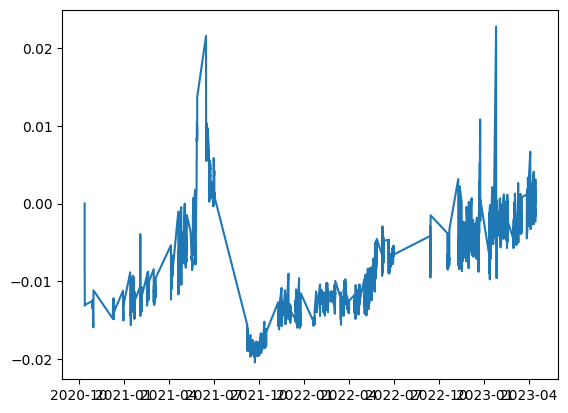

In [44]:
plt.plot(merged_df["FE"])

In [1080]:
from preprocessing import DataPreprocess

In [1081]:
df_raw = pd.concat(periods_ftrd.values())

In [1082]:
def season_mapping(month: int):
    if month in [12,1,2]:
        return 0
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 1

In [1083]:
def day_period_mapping(hour: int):
    if hour in [21,22,23,0,1,2,3,4,5,6,7,8]:
        return 0
    elif hour in [9,10,11,12,13,14,15,16,17,18,19,20]:
        return 1
#     if hour in [0,1,2,3,4,5]:
#         return 0
#     elif hour in [6,7,8,9,10,11]:
#         return 1
#     elif hour in [12,13,14,15,16,17]:
#         return 2
#     elif hour in [18,19,20,21,22, 23]:
#         return 3

In [1084]:
def sin_transformer(val, period):
    return np.sin(val / period * 2 * np.pi)


def cos_transformer(val, period):
    return np.cos(val / period * 2 * np.pi)

In [1085]:
dp = DataPreprocess()
# timestamp = df_raw.index
df_raw = df_raw.reset_index()
df_raw["season"] = pd.Series(
        list(map(season_mapping, dp.retrieve_datatime(df_raw["Timestamp"], "month")))
    )


# df_raw["hour"] = dp.retrieve_datatime(df_raw["Timestamp"], "hour")

# super low correletaions

# df_raw["day_period"] = pd.Series(
#         list(map(day_period_mapping, dp.retrieve_datatime(df_raw["Timestamp"], "hour")))
#     )
# no correletion with sin/cos transormed labels
# df_raw["hour_sin"] = sin_transformer(h, 24)
# df_raw["hour_cos"] = cos_transformer(h, 24)

In [1086]:
df_raw["FF"] = 1/df_raw["Ndis"] - 1/df_raw["Ndis"].max()

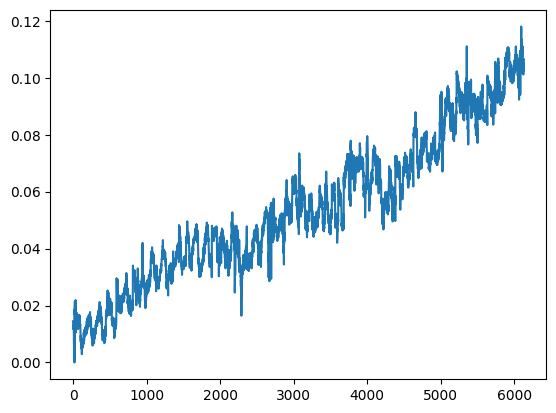

In [1151]:
plt.plot(df_raw["FF"])

In [1087]:
try:
    df_raw = df_raw.drop("Timestamp", axis=1)
except KeyError:
    print("Have Been Dropped Already")
df_raw

CTF1  CTF2  CTF3        P2          Q2      T1aHE      T1bHE      T2aHE  \
0        1     0     0  0.454737  759.875000  44.900002  51.200001  35.599998   
1        1     0     0  0.455000  759.375000  44.878789  51.200001  35.606249   
2        1     0     0  0.454706  759.050000  44.799999  51.099998  35.590624   
3        1     0     0  0.454872  758.375000  44.799999  51.099998  35.584374   
4        1     0     0  0.454722  759.375000  44.760000  51.099998  35.587095   
...    ...   ...   ...       ...         ...        ...        ...        ...   
6126     0     1     0  0.480000  652.850000  40.234375  46.564515  28.816128   
6127     0     1     0  0.480000  652.325000  40.174194  46.500000  28.718750   
6128     0     1     0  0.480000  652.975000  40.099998  46.441936  28.650001   
6129     0     1     0  0.480000  652.925000  40.074999  46.400002  28.600000   
6130     0     1     0  0.480000  652.444444  40.029032  46.400002  28.616667   

        T2aHE1    T2aHE2  ...      I2mean  pumps2      QbyIP      QbyI  \
0     1.074460  1.098586  ...  138.457926     234  12.068803  5.488129   
1     1.077595  1.099527  ...  138.446326     234  12.054896  5.484978   
2     1.078619  1.103441  ...  138.135273     234  12.084682  5.494976   
3     1.079765  1.102196  ...  137.656657     234  12.111496  5.509178   
4     1.080811  1.102177  ...  137.597632     234  12.136659  5.518809   
...        ...       ...  ...         ...     ...        ...       ...   
6126  1.018889  1.041704  ...  140.960531     123   9.938295  4.770381   
6127  1.017186  1.037593  ...  141.080820     123   9.921836  4.762481   
6128  1.015385  1.037886  ...  141.133821     123   9.927993  4.765436   
6129  1.016137  1.035406  ...  141.096080     123   9.929888  4.766346   
6130  1.011459  1.036935  ...  140.676861     123   9.952149  4.777031   

           dt2       dt1 time_on_power      Ndis  season        FF  
0     5.632352  6.299999      8.292181  3.201517       1  0.014481  
1     5.641733  6.321212      8.611111  3.202682       1  0.014368  
2     5.616430  6.299999      9.886831  3.212790       1  0.013385  
3     5.613406  6.299999     10.205761  3.217693       1  0.012911  
4     5.609953  6.339999     10.524691  3.223337       1  0.012367  
...        ...       ...           ...       ...     ...       ...  
6126  5.916129  6.330140   1522.086907  2.484574       1  0.104613  
6127  5.918750  6.325806   1522.273514  2.477843       1  0.105706  
6128  5.900001  6.341938   1522.460120  2.472367       1  0.106600  
6129  5.903225  6.325003   1522.646727  2.473012       1  0.106494  
6130  5.884524  6.370970   1522.833333  2.474396       1  0.106268  

[6131 rows x 25 columns]

In [1088]:
df_raw = df_raw.dropna(axis=1)

In [1089]:
df_raw = df_raw.drop(
#     Q2
    ["QbyIP", "T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "Treactor", "QbyI", "dt2", "Ndis", "dt1", "T2aHE", "T1aHE"], 
    axis=1,
    errors="ignore"
)

/tmp/ipykernel_1741/795898576.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_raw.corr(), annot=True, fmt=".2f", cmap="YlGnBu")


<AxesSubplot: >

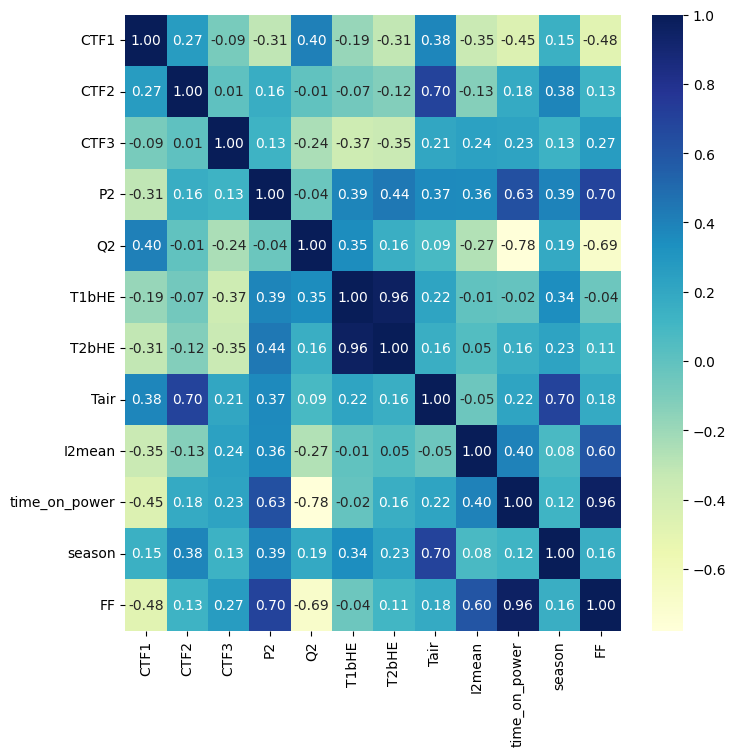

In [1090]:
plt.figure(figsize=(8,8))
sns.heatmap(df_raw.corr(), annot=True, fmt=".2f", cmap="YlGnBu")

# Important note - After 317 (Temperature before HE) was added to other data
## Correletaion between ctf and 317 is observed that means that if 317 rises one of ctf swithces on to stop rising
## 317 has expected correlation with dt2 so it's a good sign
## 317 has expected correlation with season and 327 (Temperature of air)
## 381, 395, 396 has expected correlation with season and dt 

In [1091]:
old_cols = df_raw.columns
new_cols = list(map(lambda x: str(x), old_cols))
dict_new_cols = {}
for n in range(len(old_cols)):
    dict_new_cols[old_cols[n]] = new_cols[n]
    
df_raw = df_raw.rename(columns=dict_new_cols)

In [1092]:
df_raw.columns

Index(['CTF1', 'CTF2', 'CTF3', 'P2', 'Q2', 'T1bHE', 'T2bHE', 'Tair', 'I2mean',
       'pumps2', 'time_on_power', 'season', 'FF'],
      dtype='object')

# Finally only 11 columns left among which are: 
# '317', 327', '381', '395', '396', 'QbyIP', 'dt2', , 'season',
# day_period, "pumps2"
## Aim column is dt2

In [1093]:
df_to_prep = df_raw.copy()
y = df_to_prep["FF"] #.to_numpy().reshape(-1)
X_raw = df_to_prep.drop(["FF"], axis=1)
    
X_raw

CTF1  CTF2  CTF3        P2          Q2      T1bHE      T2bHE      Tair  \
0        1     0     0  0.454737  759.875000  51.200001  29.967647  4.966667   
1        1     0     0  0.455000  759.375000  51.200001  29.964516  4.925000   
2        1     0     0  0.454706  759.050000  51.099998  29.974193  4.975000   
3        1     0     0  0.454872  758.375000  51.099998  29.970968  4.950000   
4        1     0     0  0.454722  759.375000  51.099998  29.977143  4.969444   
...    ...   ...   ...       ...         ...        ...        ...       ...   
6126     0     1     0  0.480000  652.850000  46.564515  22.900000 -5.643590   
6127     0     1     0  0.480000  652.325000  46.500000  22.800000 -5.497368   
6128     0     1     0  0.480000  652.975000  46.441936  22.750000 -5.145946   
6129     0     1     0  0.480000  652.925000  46.400002  22.696775 -5.035897   
6130     0     1     0  0.480000  652.444444  46.400002  22.732143 -4.431429   

          I2mean pumps2  time_on_power  season  
0     138.457926    234       8.292181       1  
1     138.446326    234       8.611111       1  
2     138.135273    234       9.886831       1  
3     137.656657    234      10.205761       1  
4     137.597632    234      10.524691       1  
...          ...    ...            ...     ...  
6126  140.960531    123    1522.086907       1  
6127  141.080820    123    1522.273514       1  
6128  141.133821    123    1522.460120       1  
6129  141.096080    123    1522.646727       1  
6130  140.676861    123    1522.833333       1  

[6131 rows x 12 columns]

In [1094]:
X_raw["pumps2"].value_counts()

234    3458
124    1525
123    1148
Name: pumps2, dtype: int64

In [1095]:
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [1096]:
ct = ColumnTransformer(
    [
        ("numerical", StandardScaler(), ["T1bHE", "T2bHE", "Q2", "time_on_power", "Tair", "P2", "I2mean"]),
        ("categorical", OneHotEncoder(), ["pumps2"])
    ],
    remainder = "passthrough"
)

In [1097]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', StandardScaler(),
                                 ['T1bHE', 'T2bHE', 'Q2', 'time_on_power',
                                  'Tair', 'P2', 'I2mean']),
                                ('categorical', OneHotEncoder(), ['pumps2'])])

In [1098]:
# apply column transormer on X
X = ct.fit_transform(X_raw)

In [1099]:
X.shape, y.shape

((6131, 14), (6131,))

/tmp/ipykernel_1741/792006367.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ctct.corr(),


<AxesSubplot: >

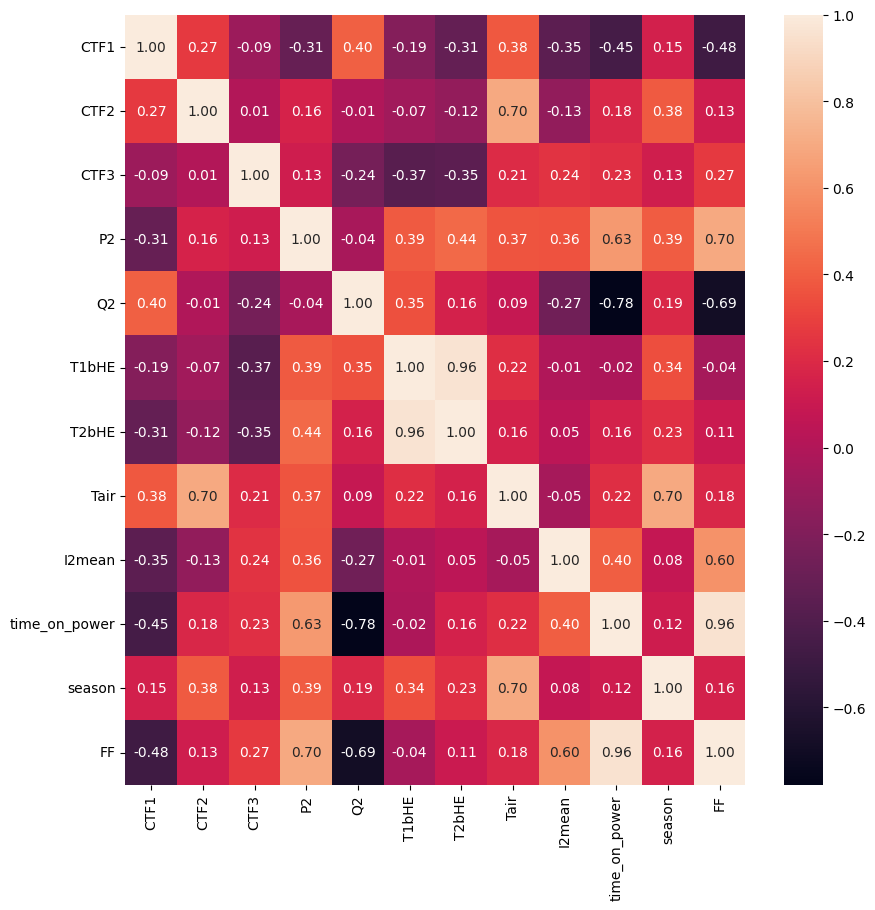

In [1100]:
plt.figure(figsize=(10,10))
ctct = pd.concat(
        [
            X_raw, 
            y
        ], axis=1)
sns.heatmap(
    ctct.corr(),
    annot=True, fmt=".2f")

In [1101]:
y = y.to_numpy()

# Next step is to apply some ML to prepared data

In [1102]:
from sklearn.model_selection import TimeSeriesSplit, ShuffleSplit, KFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.neural_network import MLPRegressor


In [1103]:
def evaluate(model, X, y, cv):
#     print(X)
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

In [1104]:
models_list = ["KNeighbors_distance","GBR", "MLP", "GBR", "SGDR"]
models = [
    KNeighborsRegressor(n_neighbors=8, weights = 'distance'),
    GradientBoostingRegressor(learning_rate=0.5, n_estimators=64, max_depth=4),
    MLPRegressor(batch_size=8, hidden_layer_sizes=16, max_iter=500, random_state=42),
    GradientBoostingRegressor(),
    SGDRegressor(max_iter=1000)
 ]

In [1105]:
from model import TrainModel

In [1106]:
X.shape, y.shape

((6131, 14), (6131,))

In [1107]:
tm = TrainModel(X, y)

In [1108]:
kf = list(KFold(n_splits=4).split(X,y))

In [1109]:
tm.model_comparison(models_list, models, kf)

Evaluating of KNeighbors_distance
Mean Absolute Error:     0.014 +/- 0.007
Root Mean Squared Error: 0.017 +/- 0.008

Evaluating of GBR
Mean Absolute Error:     0.007 +/- 0.003
Root Mean Squared Error: 0.008 +/- 0.003

Evaluating of MLP
Mean Absolute Error:     0.089 +/- 0.046
Root Mean Squared Error: 0.108 +/- 0.051

Evaluating of GBR
Mean Absolute Error:     0.009 +/- 0.004
Root Mean Squared Error: 0.011 +/- 0.005

Evaluating of SGDR
Mean Absolute Error:     0.006 +/- 0.006
Root Mean Squared Error: 0.007 +/- 0.007



In [1130]:
gbr = SGDRegressor()

In [1131]:
gbr_preds = []

for tr, te in kf:
    gbr.fit(X[tr], y[tr])
    gbr_preds.append(gbr.predict(X[te]))
    print(gbr.score(X[te], y[te]))
    

0.9201755511346839
0.701051192970817
0.8836358078210856
-1.9832708120230143


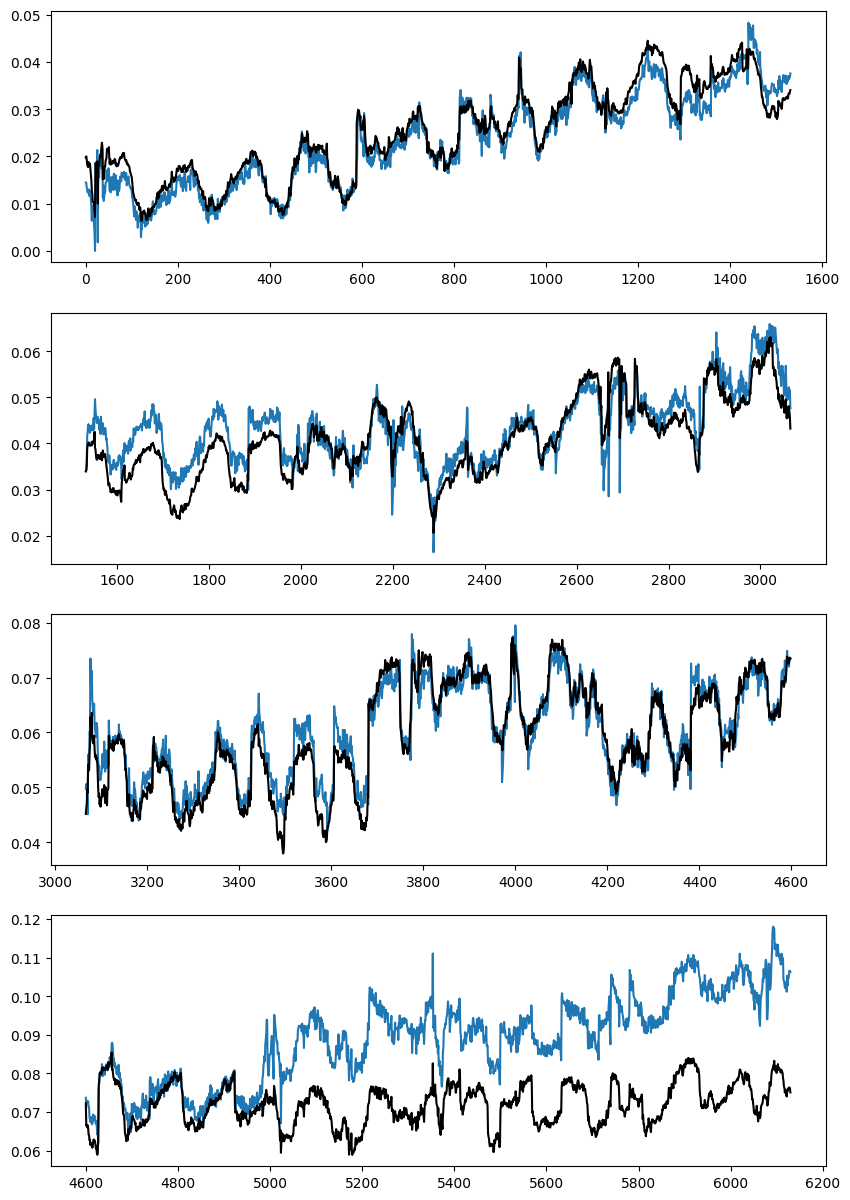

In [1132]:
fig, axs = plt.subplots(len(kf), 1, figsize=(10,15))

for i in range(len(kf)):

    axs[i].plot(kf[i][1], y[kf[i][1]])
    axs[i].plot(kf[i][1], gbr_preds[i], color="black")


# There is high dispersion between to closest point on each step
# SMA teqnique is good approach to add a bit smoothness to a data

In [1133]:
df_raw

CTF1  CTF2  CTF3        P2          Q2      T1bHE      T2bHE      Tair  \
0        1     0     0  0.454737  759.875000  51.200001  29.967647  4.966667   
1        1     0     0  0.455000  759.375000  51.200001  29.964516  4.925000   
2        1     0     0  0.454706  759.050000  51.099998  29.974193  4.975000   
3        1     0     0  0.454872  758.375000  51.099998  29.970968  4.950000   
4        1     0     0  0.454722  759.375000  51.099998  29.977143  4.969444   
...    ...   ...   ...       ...         ...        ...        ...       ...   
6126     0     1     0  0.480000  652.850000  46.564515  22.900000 -5.643590   
6127     0     1     0  0.480000  652.325000  46.500000  22.800000 -5.497368   
6128     0     1     0  0.480000  652.975000  46.441936  22.750000 -5.145946   
6129     0     1     0  0.480000  652.925000  46.400002  22.696775 -5.035897   
6130     0     1     0  0.480000  652.444444  46.400002  22.732143 -4.431429   

          I2mean pumps2  time_on_power  season        FF  
0     138.457926    234       8.292181       1  0.014481  
1     138.446326    234       8.611111       1  0.014368  
2     138.135273    234       9.886831       1  0.013385  
3     137.656657    234      10.205761       1  0.012911  
4     137.597632    234      10.524691       1  0.012367  
...          ...    ...            ...     ...       ...  
6126  140.960531    123    1522.086907       1  0.104613  
6127  141.080820    123    1522.273514       1  0.105706  
6128  141.133821    123    1522.460120       1  0.106600  
6129  141.096080    123    1522.646727       1  0.106494  
6130  140.676861    123    1522.833333       1  0.106268  

[6131 rows x 13 columns]

In [1134]:
df_smooth = df_raw.copy()
# Timestamp can be dropped
# df_smooth = df_smooth.reset_index().drop("Timestamp", axis=1)
ct_col = pd.DataFrame([])
ct_col = df_smooth.loc[:, ["CTF1", "CTF2", "CTF3", "season", "pumps2"]]
df_smooth = df_smooth.drop(["CTF1", "CTF2", "CTF3", "season", "pumps2"], axis=1)

In [1135]:
df_smooth

P2          Q2      T1bHE      T2bHE      Tair      I2mean  \
0     0.454737  759.875000  51.200001  29.967647  4.966667  138.457926   
1     0.455000  759.375000  51.200001  29.964516  4.925000  138.446326   
2     0.454706  759.050000  51.099998  29.974193  4.975000  138.135273   
3     0.454872  758.375000  51.099998  29.970968  4.950000  137.656657   
4     0.454722  759.375000  51.099998  29.977143  4.969444  137.597632   
...        ...         ...        ...        ...       ...         ...   
6126  0.480000  652.850000  46.564515  22.900000 -5.643590  140.960531   
6127  0.480000  652.325000  46.500000  22.800000 -5.497368  141.080820   
6128  0.480000  652.975000  46.441936  22.750000 -5.145946  141.133821   
6129  0.480000  652.925000  46.400002  22.696775 -5.035897  141.096080   
6130  0.480000  652.444444  46.400002  22.732143 -4.431429  140.676861   

      time_on_power        FF  
0          8.292181  0.014481  
1          8.611111  0.014368  
2          9.886831  0.013385  
3         10.205761  0.012911  
4         10.524691  0.012367  
...             ...       ...  
6126    1522.086907  0.104613  
6127    1522.273514  0.105706  
6128    1522.460120  0.106600  
6129    1522.646727  0.106494  
6130    1522.833333  0.106268  

[6131 rows x 8 columns]

In [1136]:
# Simple Moving Average - SMA
# We will take SMA of 10 points

st_ind, fn_ind = 0, 20
arr_smooth = np.array([])

for n in range(len(df_smooth)): # n starts from 0
#     if fn_ind + n == len(df_smooth):
#         break
    arr_smooth = np.append(
        arr_smooth, 
        df_smooth.iloc[st_ind + n: fn_ind + n].mean(axis=0))
    

In [1137]:
arr_smooth = arr_smooth.reshape(len(df_smooth),len(df_smooth.columns))


In [1138]:
df_sma = pd.DataFrame([])
df_sma = pd.concat(
    [
        pd.DataFrame(data=arr_smooth[:-fn_ind], columns=df_smooth.columns),
        ct_col[:-fn_ind]
    ],
    axis=1
)

/tmp/ipykernel_1741/2580512405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sma.corr(), annot=True, fmt=".2f")


<AxesSubplot: >

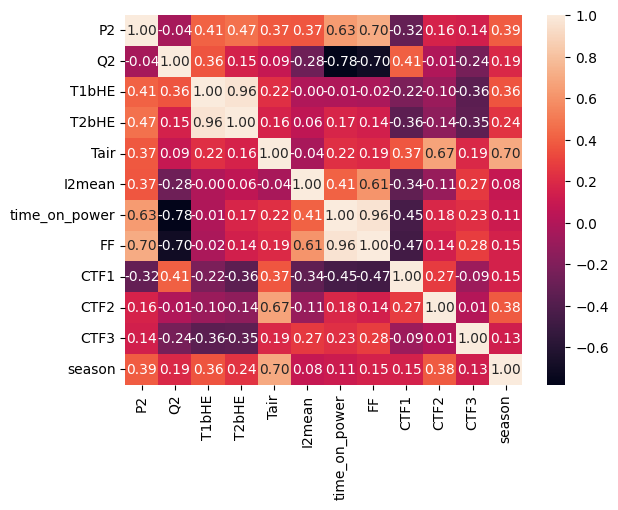

In [1139]:
sns.heatmap(df_sma.corr(), annot=True, fmt=".2f")

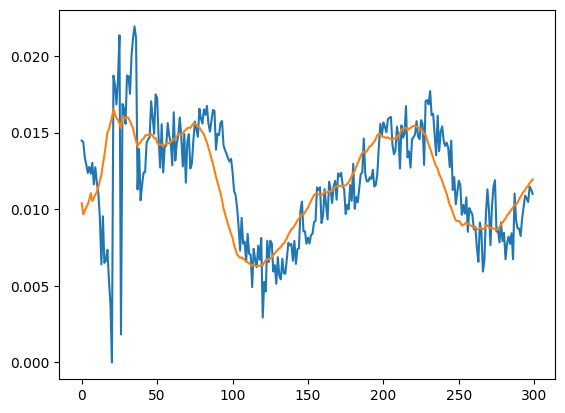

In [1140]:
# comparison before / after SMA 10
plt.plot(np.arange(0,300,1), df_raw["FF"][:300])
plt.plot(np.arange(0,300,1), df_sma["FF"][:300])

# NOW ALL data looks much smooth
## Lets apply preprocessing and try come predictions

In [1126]:
df_to_prep_sma = df_sma.copy()
y_sma = df_sma["FF"] #.to_numpy().reshape(-1)
X_raw_sma = df_sma.drop(["FF"], axis=1)
y_sma, X_raw_sma

(0       0.010394
 1       0.009670
 2       0.009887
 3       0.010124
 4       0.010320
           ...   
 6106    0.106131
 6107    0.105819
 6108    0.105631
 6109    0.105476
 6110    0.105391
 Name: FF, Length: 6111, dtype: float64,
             P2         Q2      T1bHE      T2bHE      Tair      I2mean  \
 0     0.454182  758.02125  51.000616  30.014808  5.845262  136.682364   
 1     0.453991  757.78000  50.985777  30.015854  6.014091  136.457343   
 2     0.454241  757.18000  50.640777  29.634035  6.402713  136.237875   
 3     0.454506  756.62375  50.290777  29.243919  6.767647  136.026873   
 4     0.454717  756.07125  49.930778  28.847188  7.147397  135.830588   
 ...        ...        ...        ...        ...       ...         ...   
 6106  0.480000  653.69250  47.254345  23.814206 -4.683550  142.031828   
 6107  0.480000  653.60875  47.202571  23.735722 -4.814940  141.895088   
 6108  0.480000  653.50750  47.147571  23.655419 -4.923293  141.775612   
 6109  0.480000  653.

In [1127]:
X_sma = ct.transform(X_raw_sma)

In [1128]:
kf_sma = list(KFold(n_splits=4).split(X_sma, y_sma))

In [1129]:
tm.model_comparison(models_list, models, kf_sma)

Evaluating of KNeighbors_distance
Mean Absolute Error:     0.014 +/- 0.007
Root Mean Squared Error: 0.017 +/- 0.008

Evaluating of GBR
Mean Absolute Error:     0.009 +/- 0.004
Root Mean Squared Error: 0.011 +/- 0.004

Evaluating of MLP
Mean Absolute Error:     0.080 +/- 0.040
Root Mean Squared Error: 0.098 +/- 0.046

Evaluating of GBR
Mean Absolute Error:     0.009 +/- 0.004
Root Mean Squared Error: 0.011 +/- 0.005

Evaluating of SGDR
Mean Absolute Error:     0.006 +/- 0.006
Root Mean Squared Error: 0.007 +/- 0.007



In [1141]:
kf = list(KFold(n_splits=4).split(X_sma, y_sma))

In [1142]:
gbr_preds = []

for tr, te in kf:
    gbr.fit(X[tr], y[tr])
    gbr_preds.append(gbr.predict(X[te]))
    print(gbr.score(X[te], y[te]))
    

0.9196815264570622
0.7000569547297815
0.8855739022298427
-1.9727789151559536


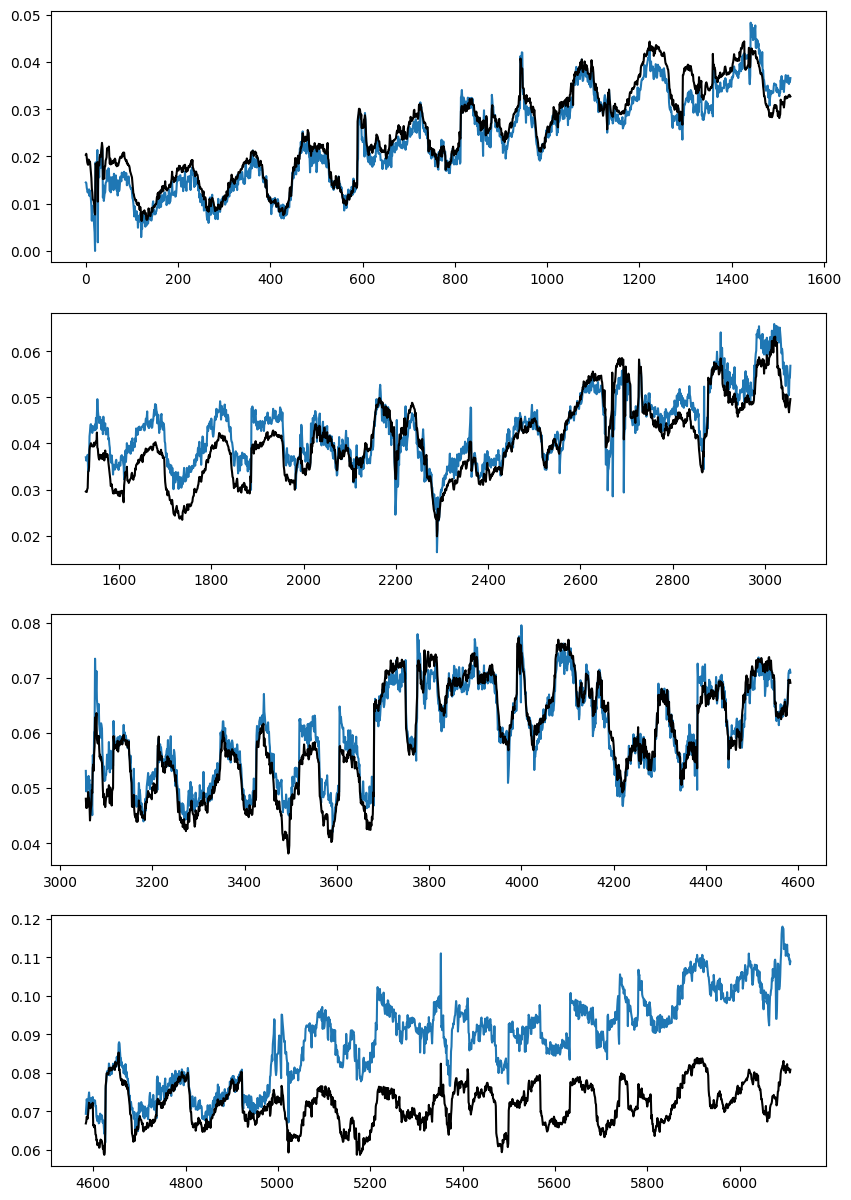

In [1143]:
fig, axs = plt.subplots(len(kf), 1, figsize=(10,15))

for i in range(len(kf)):

    axs[i].plot(kf[i][1], y[kf[i][1]])
    axs[i].plot(kf[i][1], gbr_preds[i], color="black")


# JUST default train_test_split is below
## In this case data shuffles so no time dependensies here

In [1144]:
from sklearn.model_selection import train_test_split

In [1145]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

In [1146]:
y_tr

array([0.04741574, 0.04837139, 0.05141847, ..., 0.09835796, 0.09070363,
       0.02422848])

In [1147]:
gbr2 = GradientBoostingRegressor()
gbr2.fit(X_tr, y_tr)

GradientBoostingRegressor()

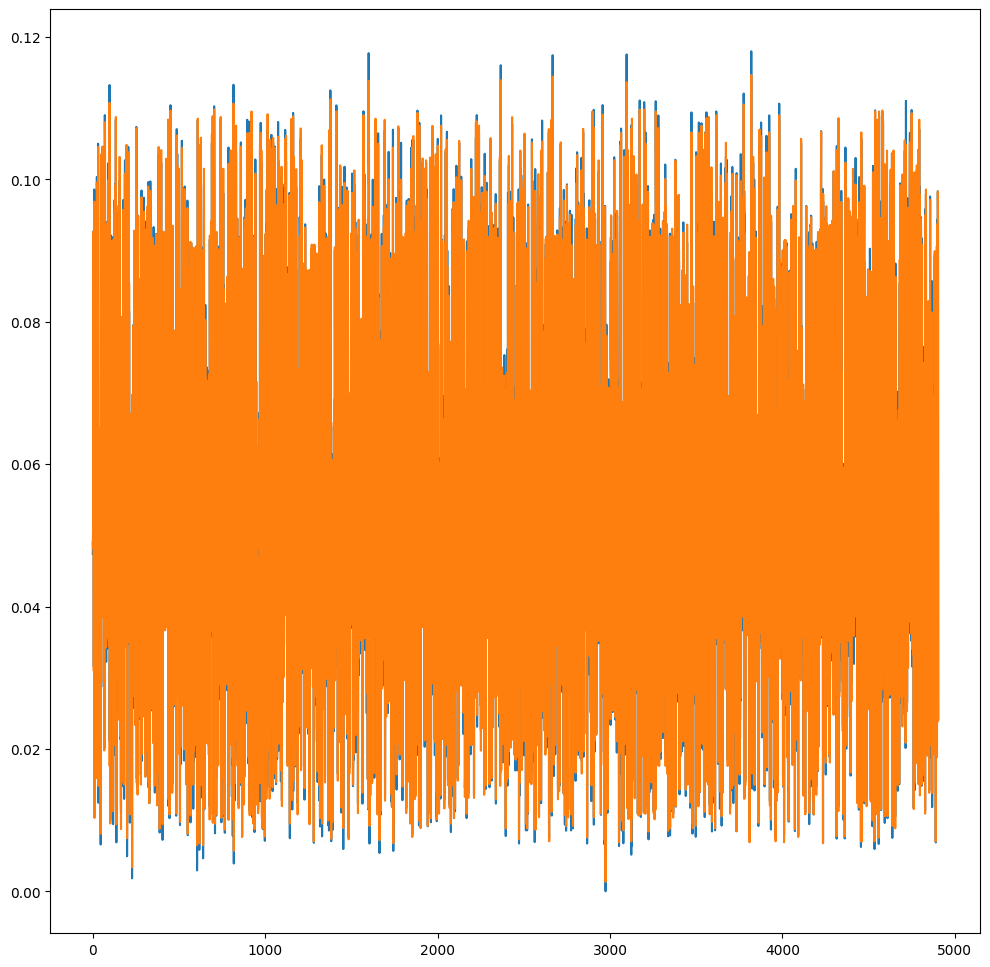

In [1148]:

plt.figure(figsize=(12,12))
plt.plot(y_tr)
plt.plot(gbr2.predict(X_tr))

0.9947796394519224


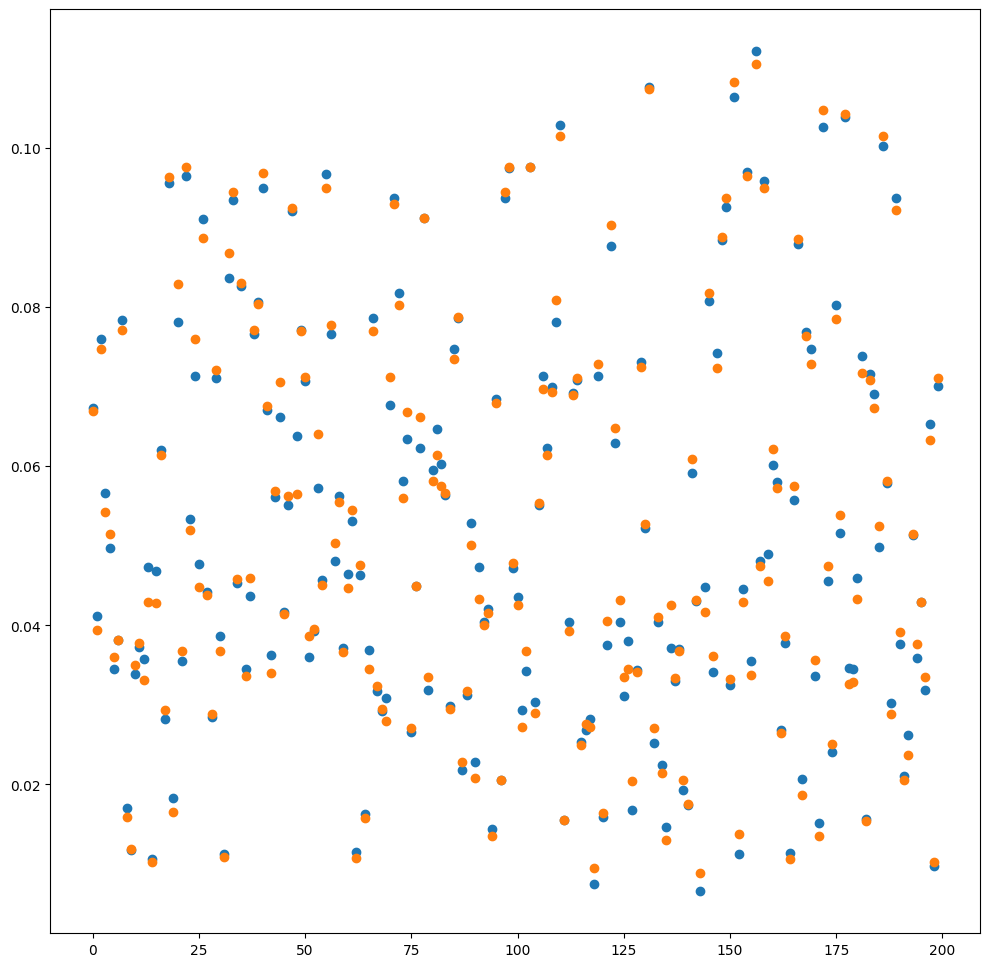

In [1149]:
print(gbr2.score(X_te, y_te))
plt.figure(figsize=(12,12))
xplt = np.arange(0,len(y_te), 1)
plt.scatter(xplt[:200], y_te[:200])
plt.scatter(xplt[:200], gbr2.predict(X_te)[:200])

In [1150]:
df_raw

CTF1  CTF2  CTF3        P2          Q2      T1bHE      T2bHE      Tair  \
0        1     0     0  0.454737  759.875000  51.200001  29.967647  4.966667   
1        1     0     0  0.455000  759.375000  51.200001  29.964516  4.925000   
2        1     0     0  0.454706  759.050000  51.099998  29.974193  4.975000   
3        1     0     0  0.454872  758.375000  51.099998  29.970968  4.950000   
4        1     0     0  0.454722  759.375000  51.099998  29.977143  4.969444   
...    ...   ...   ...       ...         ...        ...        ...       ...   
6126     0     1     0  0.480000  652.850000  46.564515  22.900000 -5.643590   
6127     0     1     0  0.480000  652.325000  46.500000  22.800000 -5.497368   
6128     0     1     0  0.480000  652.975000  46.441936  22.750000 -5.145946   
6129     0     1     0  0.480000  652.925000  46.400002  22.696775 -5.035897   
6130     0     1     0  0.480000  652.444444  46.400002  22.732143 -4.431429   

          I2mean pumps2  time_on_power  season        FF  
0     138.457926    234       8.292181       1  0.014481  
1     138.446326    234       8.611111       1  0.014368  
2     138.135273    234       9.886831       1  0.013385  
3     137.656657    234      10.205761       1  0.012911  
4     137.597632    234      10.524691       1  0.012367  
...          ...    ...            ...     ...       ...  
6126  140.960531    123    1522.086907       1  0.104613  
6127  141.080820    123    1522.273514       1  0.105706  
6128  141.133821    123    1522.460120       1  0.106600  
6129  141.096080    123    1522.646727       1  0.106494  
6130  140.676861    123    1522.833333       1  0.106268  

[6131 rows x 13 columns]

In [1014]:
# lets do manual prediction on trained model

X_manual = pd.DataFrame(
    {
        "P2": 0.48,
        "Q2": 650,
        "I2mean": 140,
        "T2bHE": [20],
        "T1bHE": [46],
        "Tair": [-10],
        "CTF1":[0],
        "CTF2":[0],
        "CTF3":[0],
        "pumps2": ["234"],
        "time_on_power": [1000],
        "season": [1],
    }
)
    
X_manual

P2   Q2  I2mean  T2bHE  T1bHE  Tair  CTF1  CTF2  CTF3 pumps2  \
0  0.48  650     140     20     46   -10     0     0     0    234   

   time_on_power  season  
0           1000       1

In [1015]:
X_manual = ct.transform(X_manual)

In [1016]:
gbr2.predict(X_manual)

array([2.68419396])